# LEAD SCORING CASE STUDY

# Importing libraries and loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
lead_df = pd.read_csv("Leads.csv")

# Understanding data

In [3]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead_df.shape

(9240, 37)

In [5]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data Preperation

# DEALING WITH MISSING VALUES

In [7]:
lead_df.isnull().mean()

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.155628
How did you hear about X Education               0.238853
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine      

In [8]:
median =["Asymmetrique Activity Score", "Asymmetrique Profile Score",]

In [9]:
mode = ["Country", "Specialization","How did you hear about X Education",
         "What is your current occupation",
"What matters most to you in choosing a course", "Tags","Lead Quality", "Lead Profile", "City", "Asymmetrique Activity Index",
"Asymmetrique Profile Index"]

# DROPPING ALL THE COLOUMNS WITH MISSING VALUES LESS THAN 5%

In [10]:
lead_df = lead_df.drop(["Page Views Per Visit"],axis=1)

In [11]:
lead_df = lead_df.drop(["TotalVisits"],axis=1)

In [12]:
lead_df = lead_df.drop(["Last Activity"],axis=1)

# IMPUTING THE MISSING VALUES OF COLUMNS WITH CONTINOUS VARIABLES WITH THEIR RESPECTIVE MEDIAN VALUES

In [13]:
med_1 = lead_df["Asymmetrique Activity Score"].median()
lead_df["Asymmetrique Activity Score"] = lead_df["Asymmetrique Activity Score"].fillna(med_1)

In [14]:
med_2 = lead_df["Asymmetrique Profile Score"].median()
lead_df["Asymmetrique Profile Score"] = lead_df["Asymmetrique Profile Score"].fillna(med_2)

# IMPUTING THE MISSING VALUES OF COLUMNS WITH CONTINOUS VARIABLES WITH THEIR RESPECTIVE MODE VALUES

In [15]:
mod_1 = lead_df["How did you hear about X Education"].mode()
lead_df["How did you hear about X Education"] = lead_df["How did you hear about X Education"].fillna(mod_1)

In [16]:
mod_2 =  lead_df["Country"].mode()
lead_df["Country"] = lead_df["Country"].fillna(mod_2)

In [17]:
mod_3 =  lead_df["Specialization"].mode()
lead_df["Specialization"] = lead_df["Specialization"].fillna(mod_3)

In [18]:
mod_4 =  lead_df["What is your current occupation"].mode()
lead_df["What is your current occupation"] = lead_df["What is your current occupation"].fillna(mod_4)

In [19]:
mod_5 =  lead_df["Tags"].mode()
lead_df["Tags"] = lead_df["Tags"].fillna(mod_5)

In [20]:
mod_6 =  lead_df["Lead Quality"].mode()
lead_df["Lead Quality"] = lead_df["Lead Quality"].fillna(mod_6)

In [21]:
mod_7 =  lead_df["City"].mode()
lead_df["City"] = lead_df["City"].fillna(mod_7)

In [22]:
mod_8 =  lead_df["Asymmetrique Activity Index"].mode()
lead_df["Asymmetrique Activity Index"] = lead_df["Asymmetrique Activity Index"].fillna(mod_8)

In [23]:
mod_9 =  lead_df["Asymmetrique Profile Index"].mode()
lead_df["Asymmetrique Profile Index"] = lead_df["Asymmetrique Profile Index"].fillna(mod_9)

In [24]:
lead_df.isnull().mean()

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
Total Time Spent on Website                      0.000000
Country                                          0.266234
Specialization                                   0.155628
How did you hear about X Education               0.238853
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

# DEALING WITH OUTLIERS 

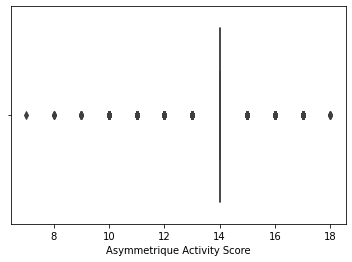

In [25]:
sns.boxplot(lead_df["Asymmetrique Activity Score"])
plt.show()

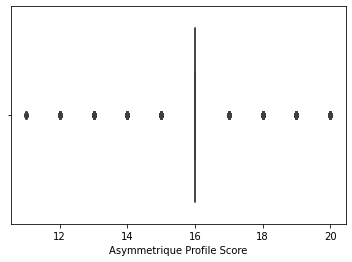

In [26]:

sns.boxplot(lead_df["Asymmetrique Profile Score"])
plt.show()

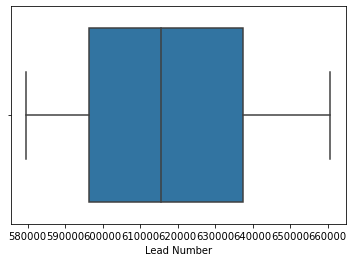

In [27]:
sns.boxplot(lead_df["Lead Number"])
plt.show()

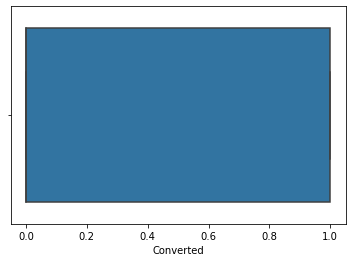

In [28]:

sns.boxplot(lead_df["Converted"])
plt.show()

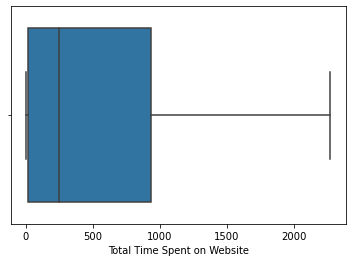

In [29]:
sns.boxplot(lead_df["Total Time Spent on Website"])
plt.show()

# No outliers detected

# UNIVARIATE ANALYSIS

cont_vars = ["Lead Number","Converted","TotalVisits","Total Time Spent on Website","Page Views Per Visit",
             "Asymmetrique Activity Score","Asymmetrique Profile Score"]

cat_vars = ["Lead Origin", "Lead Source" , "Do Not Email" , "Do Not Call" , "Last Activity" ,  "Specialization",
            "How did you hear about X Education", "What is your current occupation","What matters most to you in choosing a course",
            "Tags","Lead Quality", "Lead Profile", "City", "Asymmetrique Activity Index","Asymmetrique Profile Index" ,
            "Search" , "Newspaper Article" , "X Education Forums" , "Newspaper","Digital Advertisement" ,
            "Through Recommendations" , "Update me on Supply Chain Content" , "Get updates on DM Content" ,
            "I agree to pay the amount through cheque" , "A free copy of Mastering The Interview,Last Notable Activity"]  
            
            

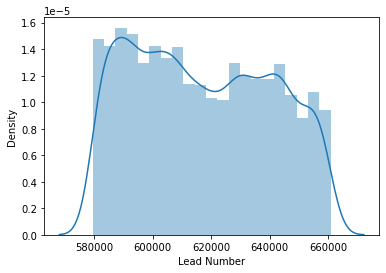

In [30]:
sns.distplot(lead_df["Lead Number"])
plt.show()

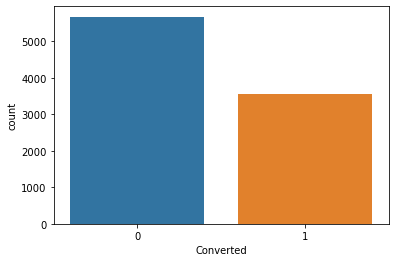

In [31]:
sns.countplot(lead_df["Converted"])
plt.show()

Only 30% of leads are converted

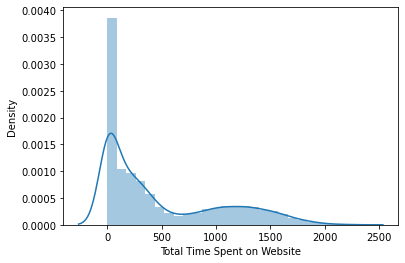

In [32]:
sns.distplot(lead_df["Total Time Spent on Website"])
plt.show()

Most of the lead have spent 1000 - 1500 units on website

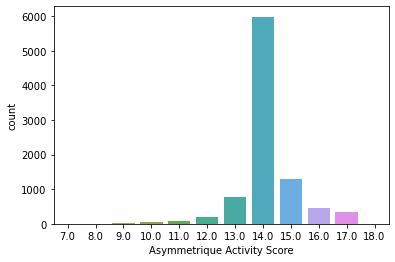

In [33]:
sns.countplot(lead_df["Asymmetrique Activity Score"])
plt.show()

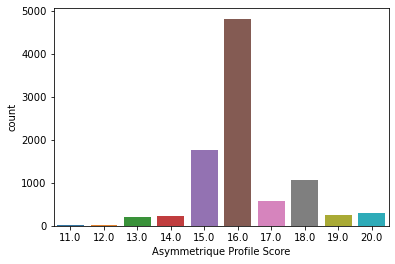

In [34]:
sns.countplot(lead_df["Asymmetrique Profile Score"])
plt.show()

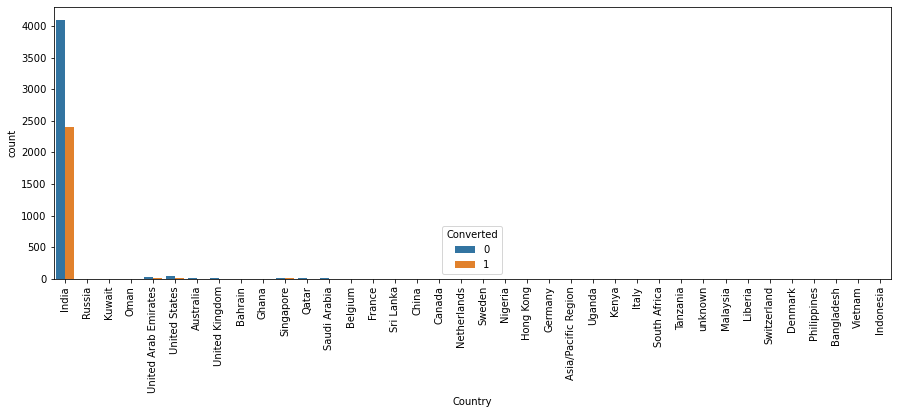

In [35]:
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df.Country, hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Majority of leads are from India

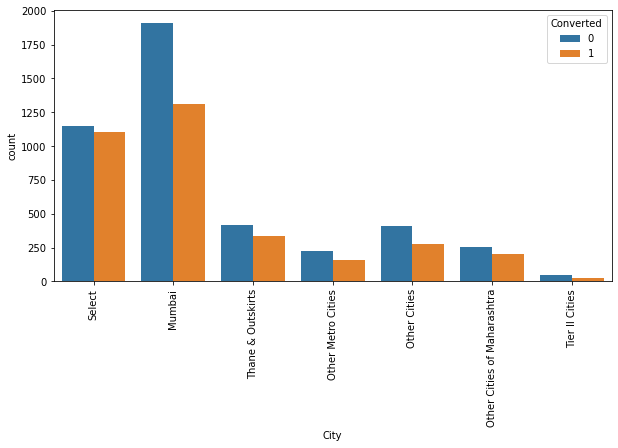

In [36]:
plt.figure(figsize=(10,5))
s1=sns.countplot(lead_df.City, hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Majority of leads are from Mumbai

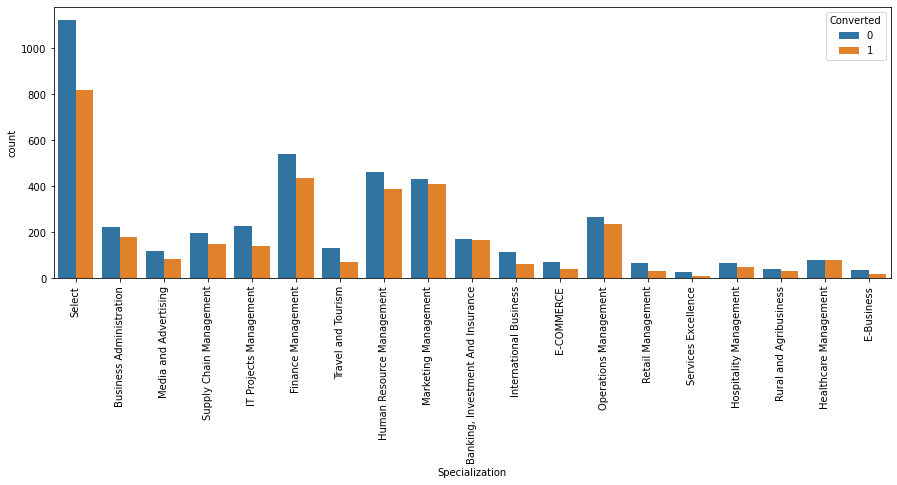

In [37]:

plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df.Specialization, hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Majority of leads are from Finance, Marketing and HR respectively.

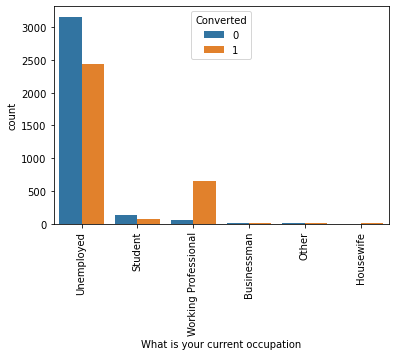

In [38]:
s1=sns.countplot(lead_df['What is your current occupation'], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Majority are unemployed.

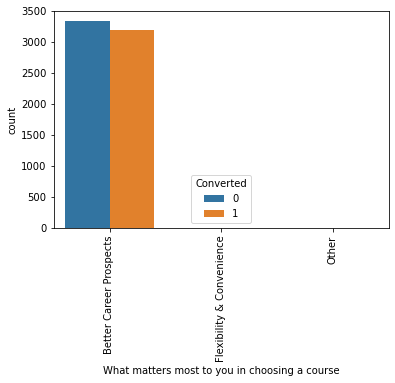

In [39]:
s1=sns.countplot(lead_df['What matters most to you in choosing a course'], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

'Better Career Prospects' is what attracts leads.

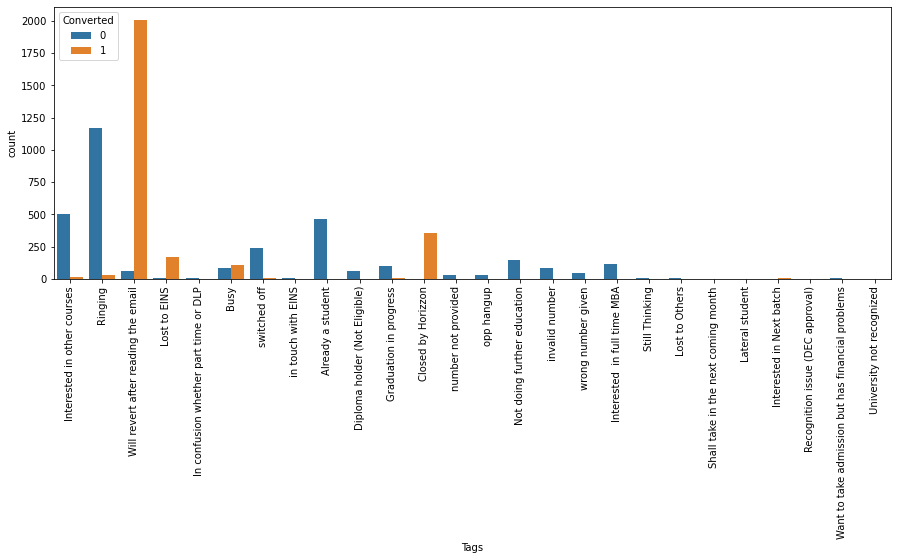

In [40]:
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df['Tags'], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

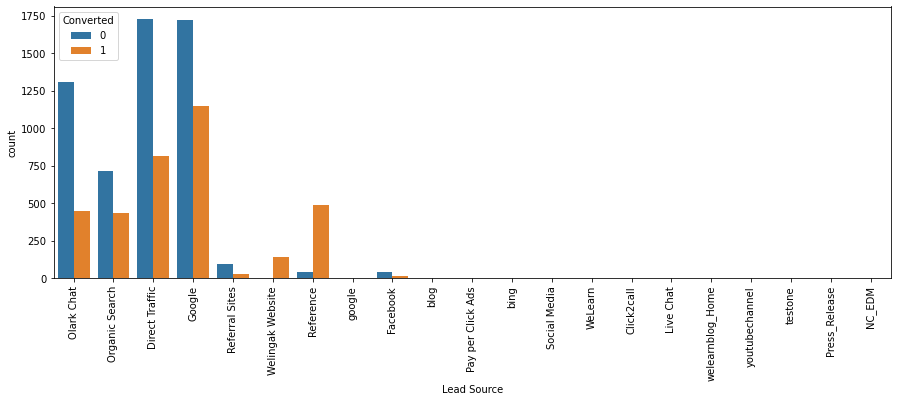

In [41]:
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df['Lead Source'], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Majority of lead are sourced from Google.

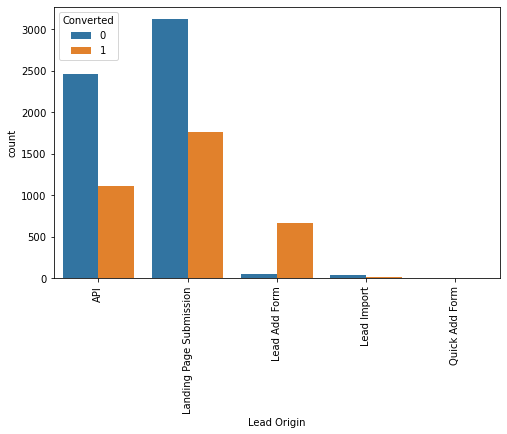

In [42]:
plt.figure(figsize=(8,5))
s1=sns.countplot(lead_df['Lead Origin'], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

# Bivariate Analysis

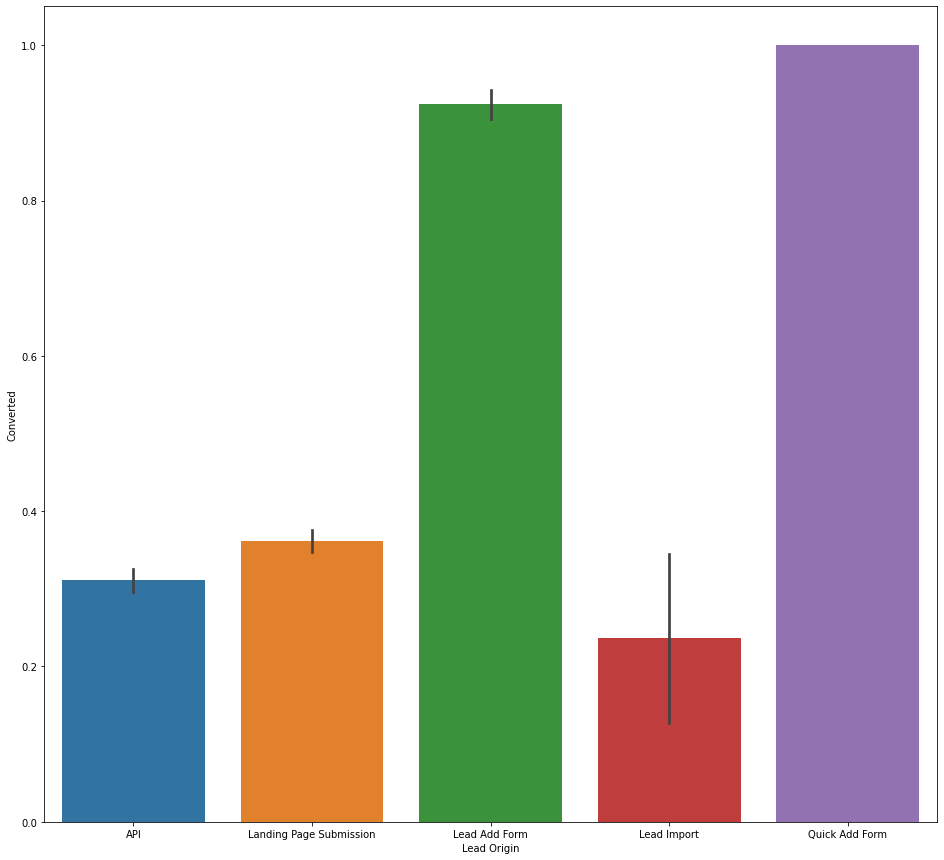

In [43]:
plt.figure(figsize=[16,15])
sns.barplot(lead_df["Lead Origin"],lead_df["Converted"],)
plt.show()

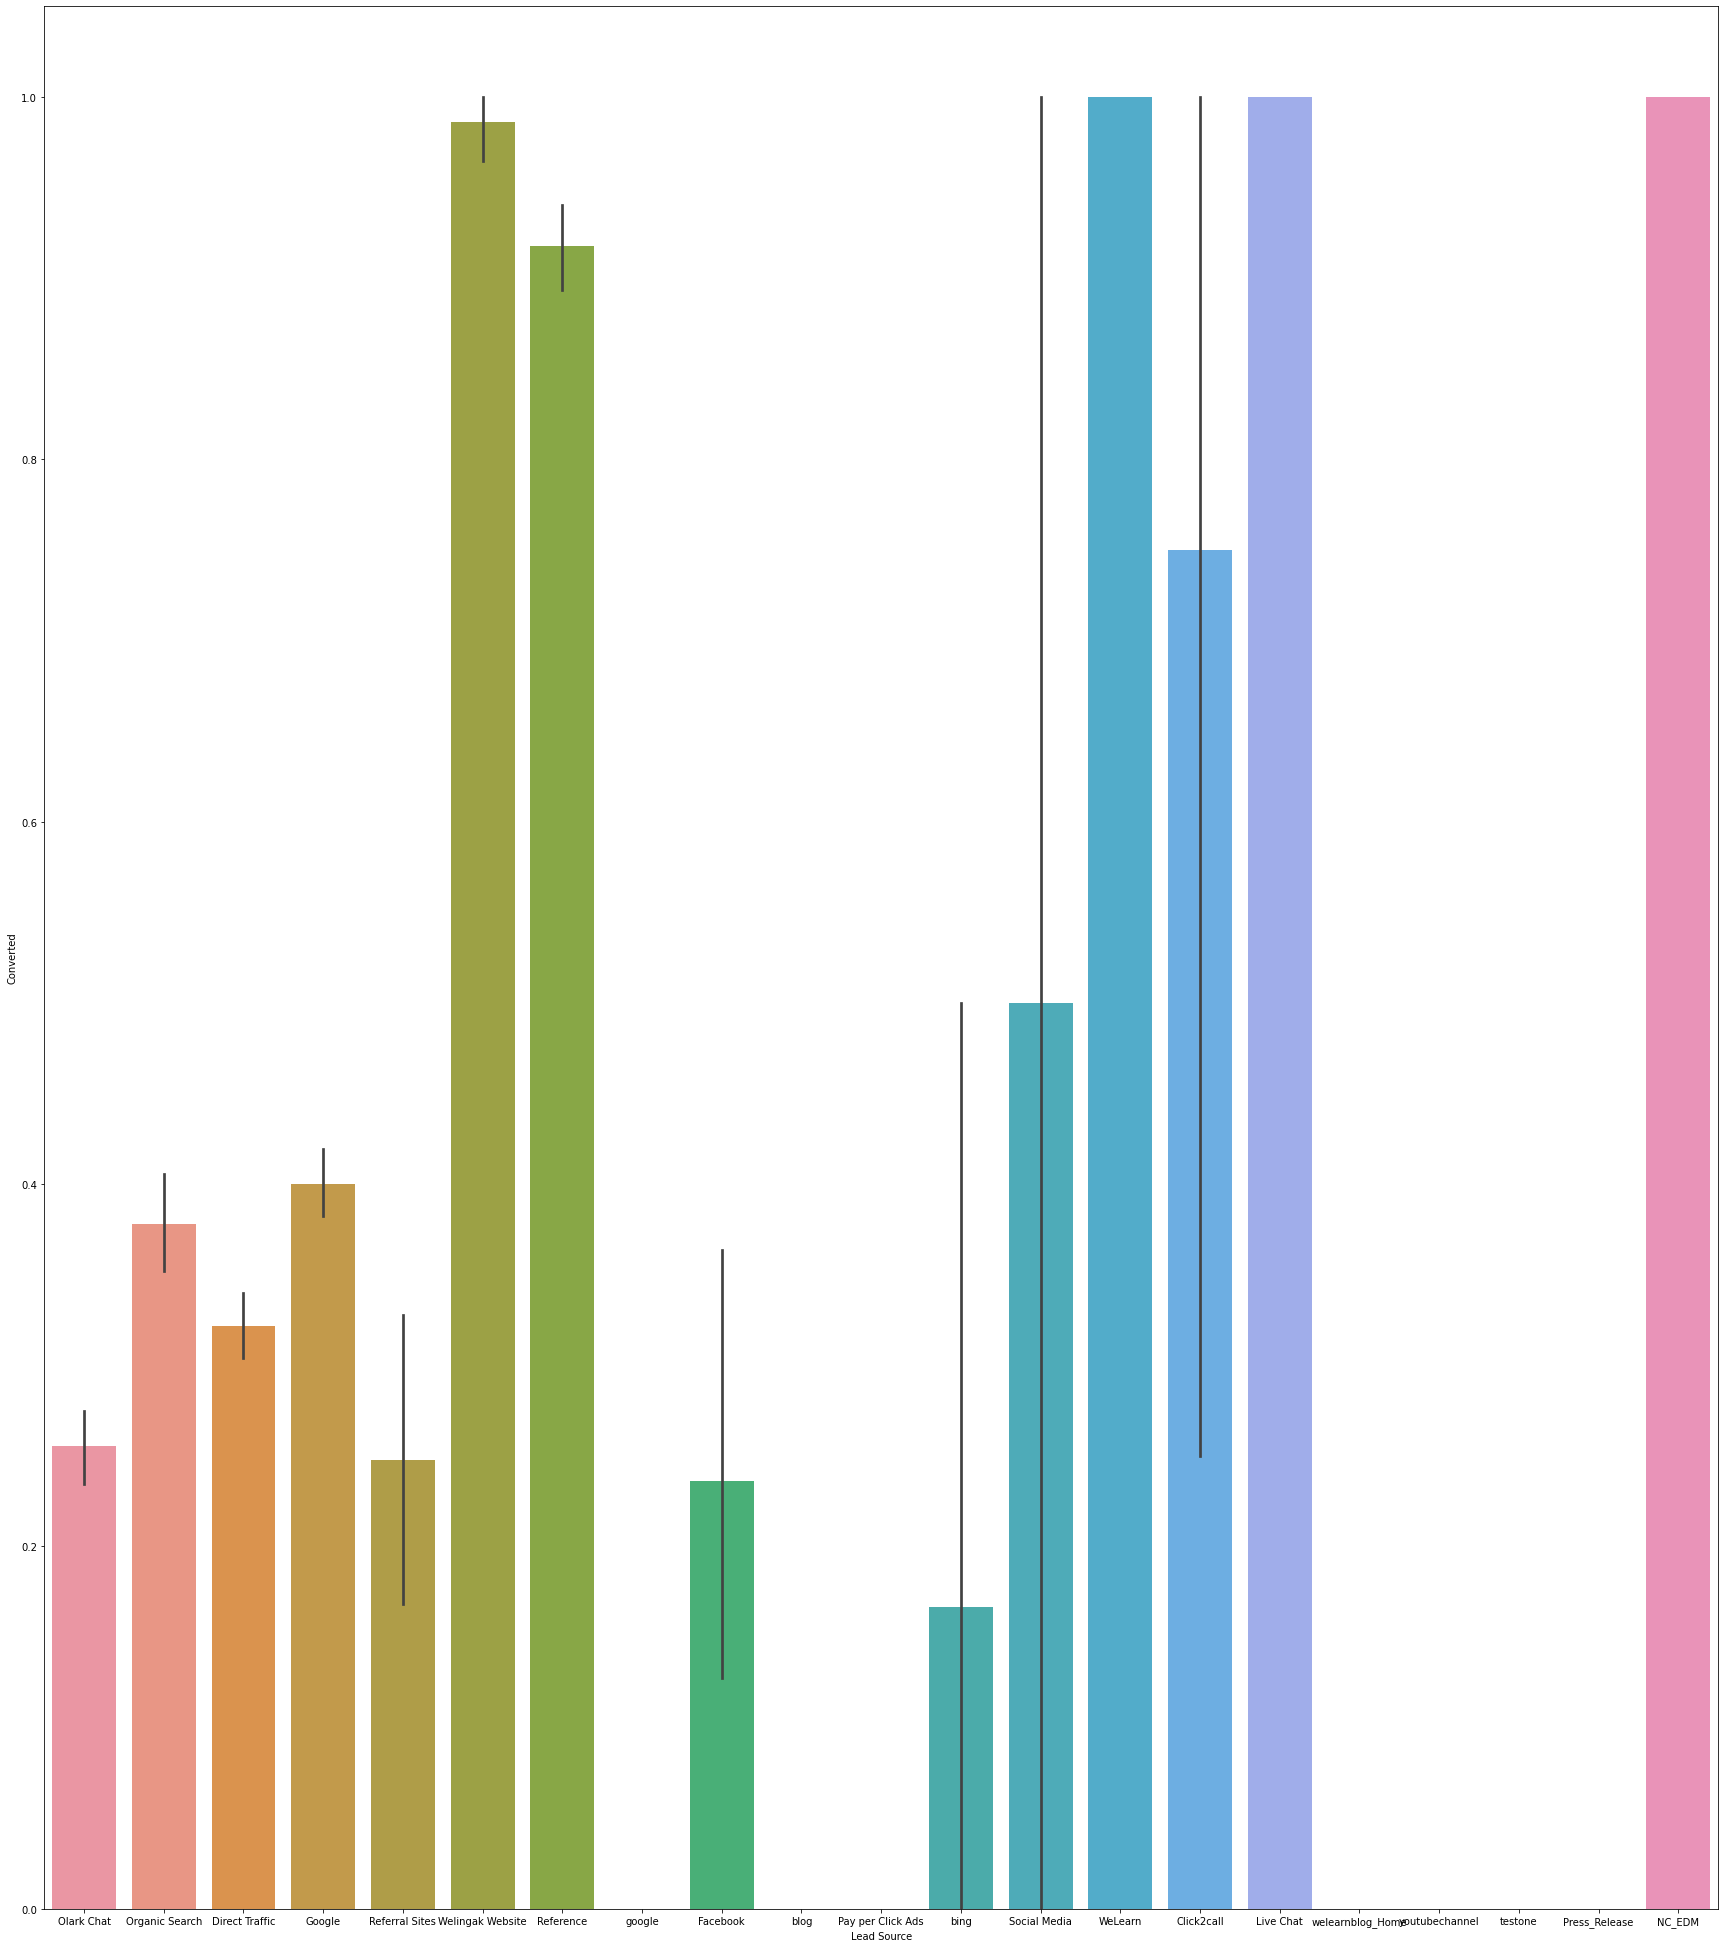

In [44]:
plt.figure(figsize=[30,35])
sns.barplot(lead_df["Lead Source"],lead_df["Converted"],)
plt.show()

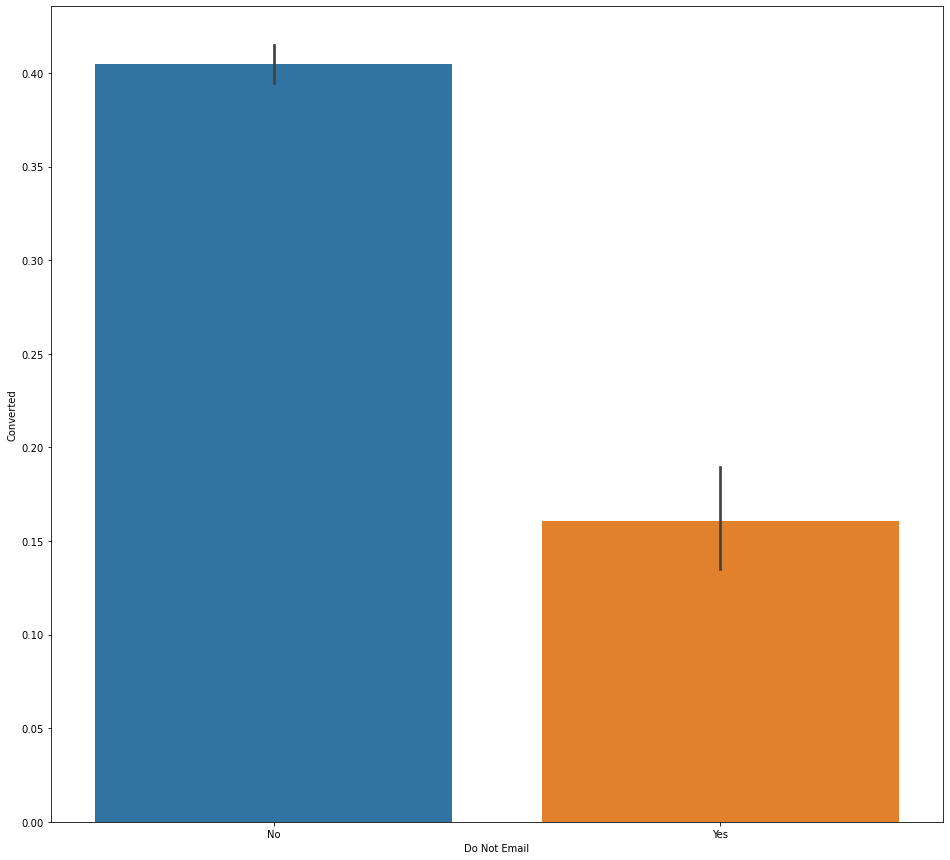

In [45]:
plt.figure(figsize=[16,15])
sns.barplot(lead_df["Do Not Email"],lead_df["Converted"],)
plt.show()

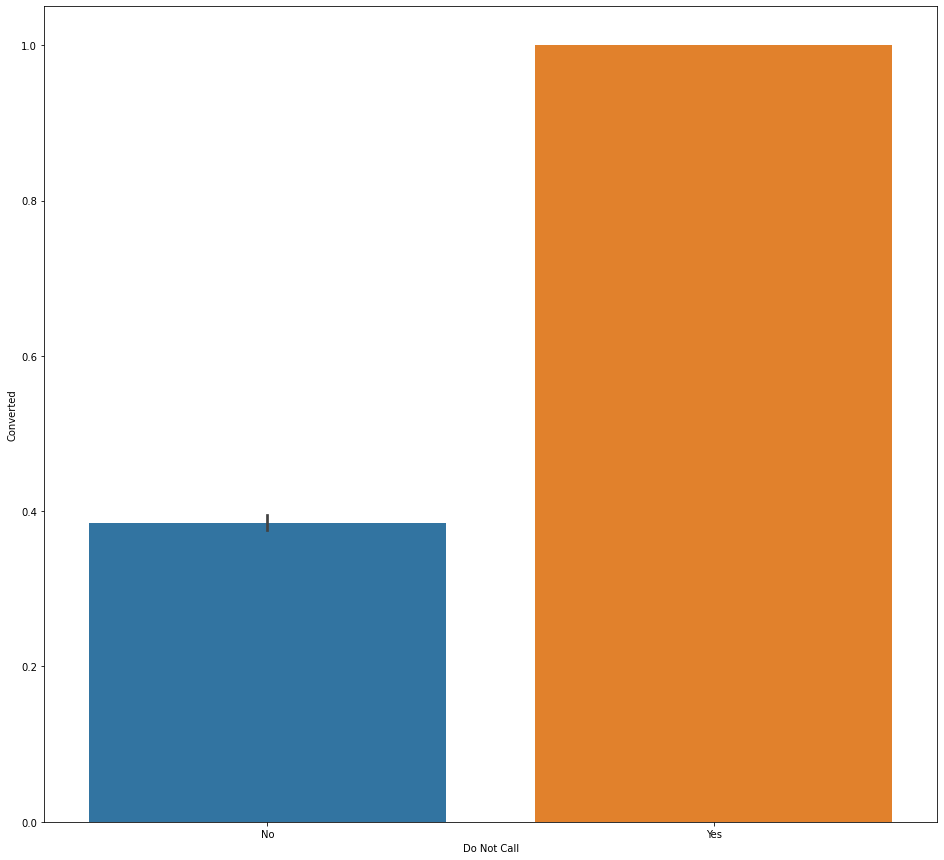

In [46]:
plt.figure(figsize=[16,15])
sns.barplot(lead_df["Do Not Call"],lead_df["Converted"],)
plt.show()

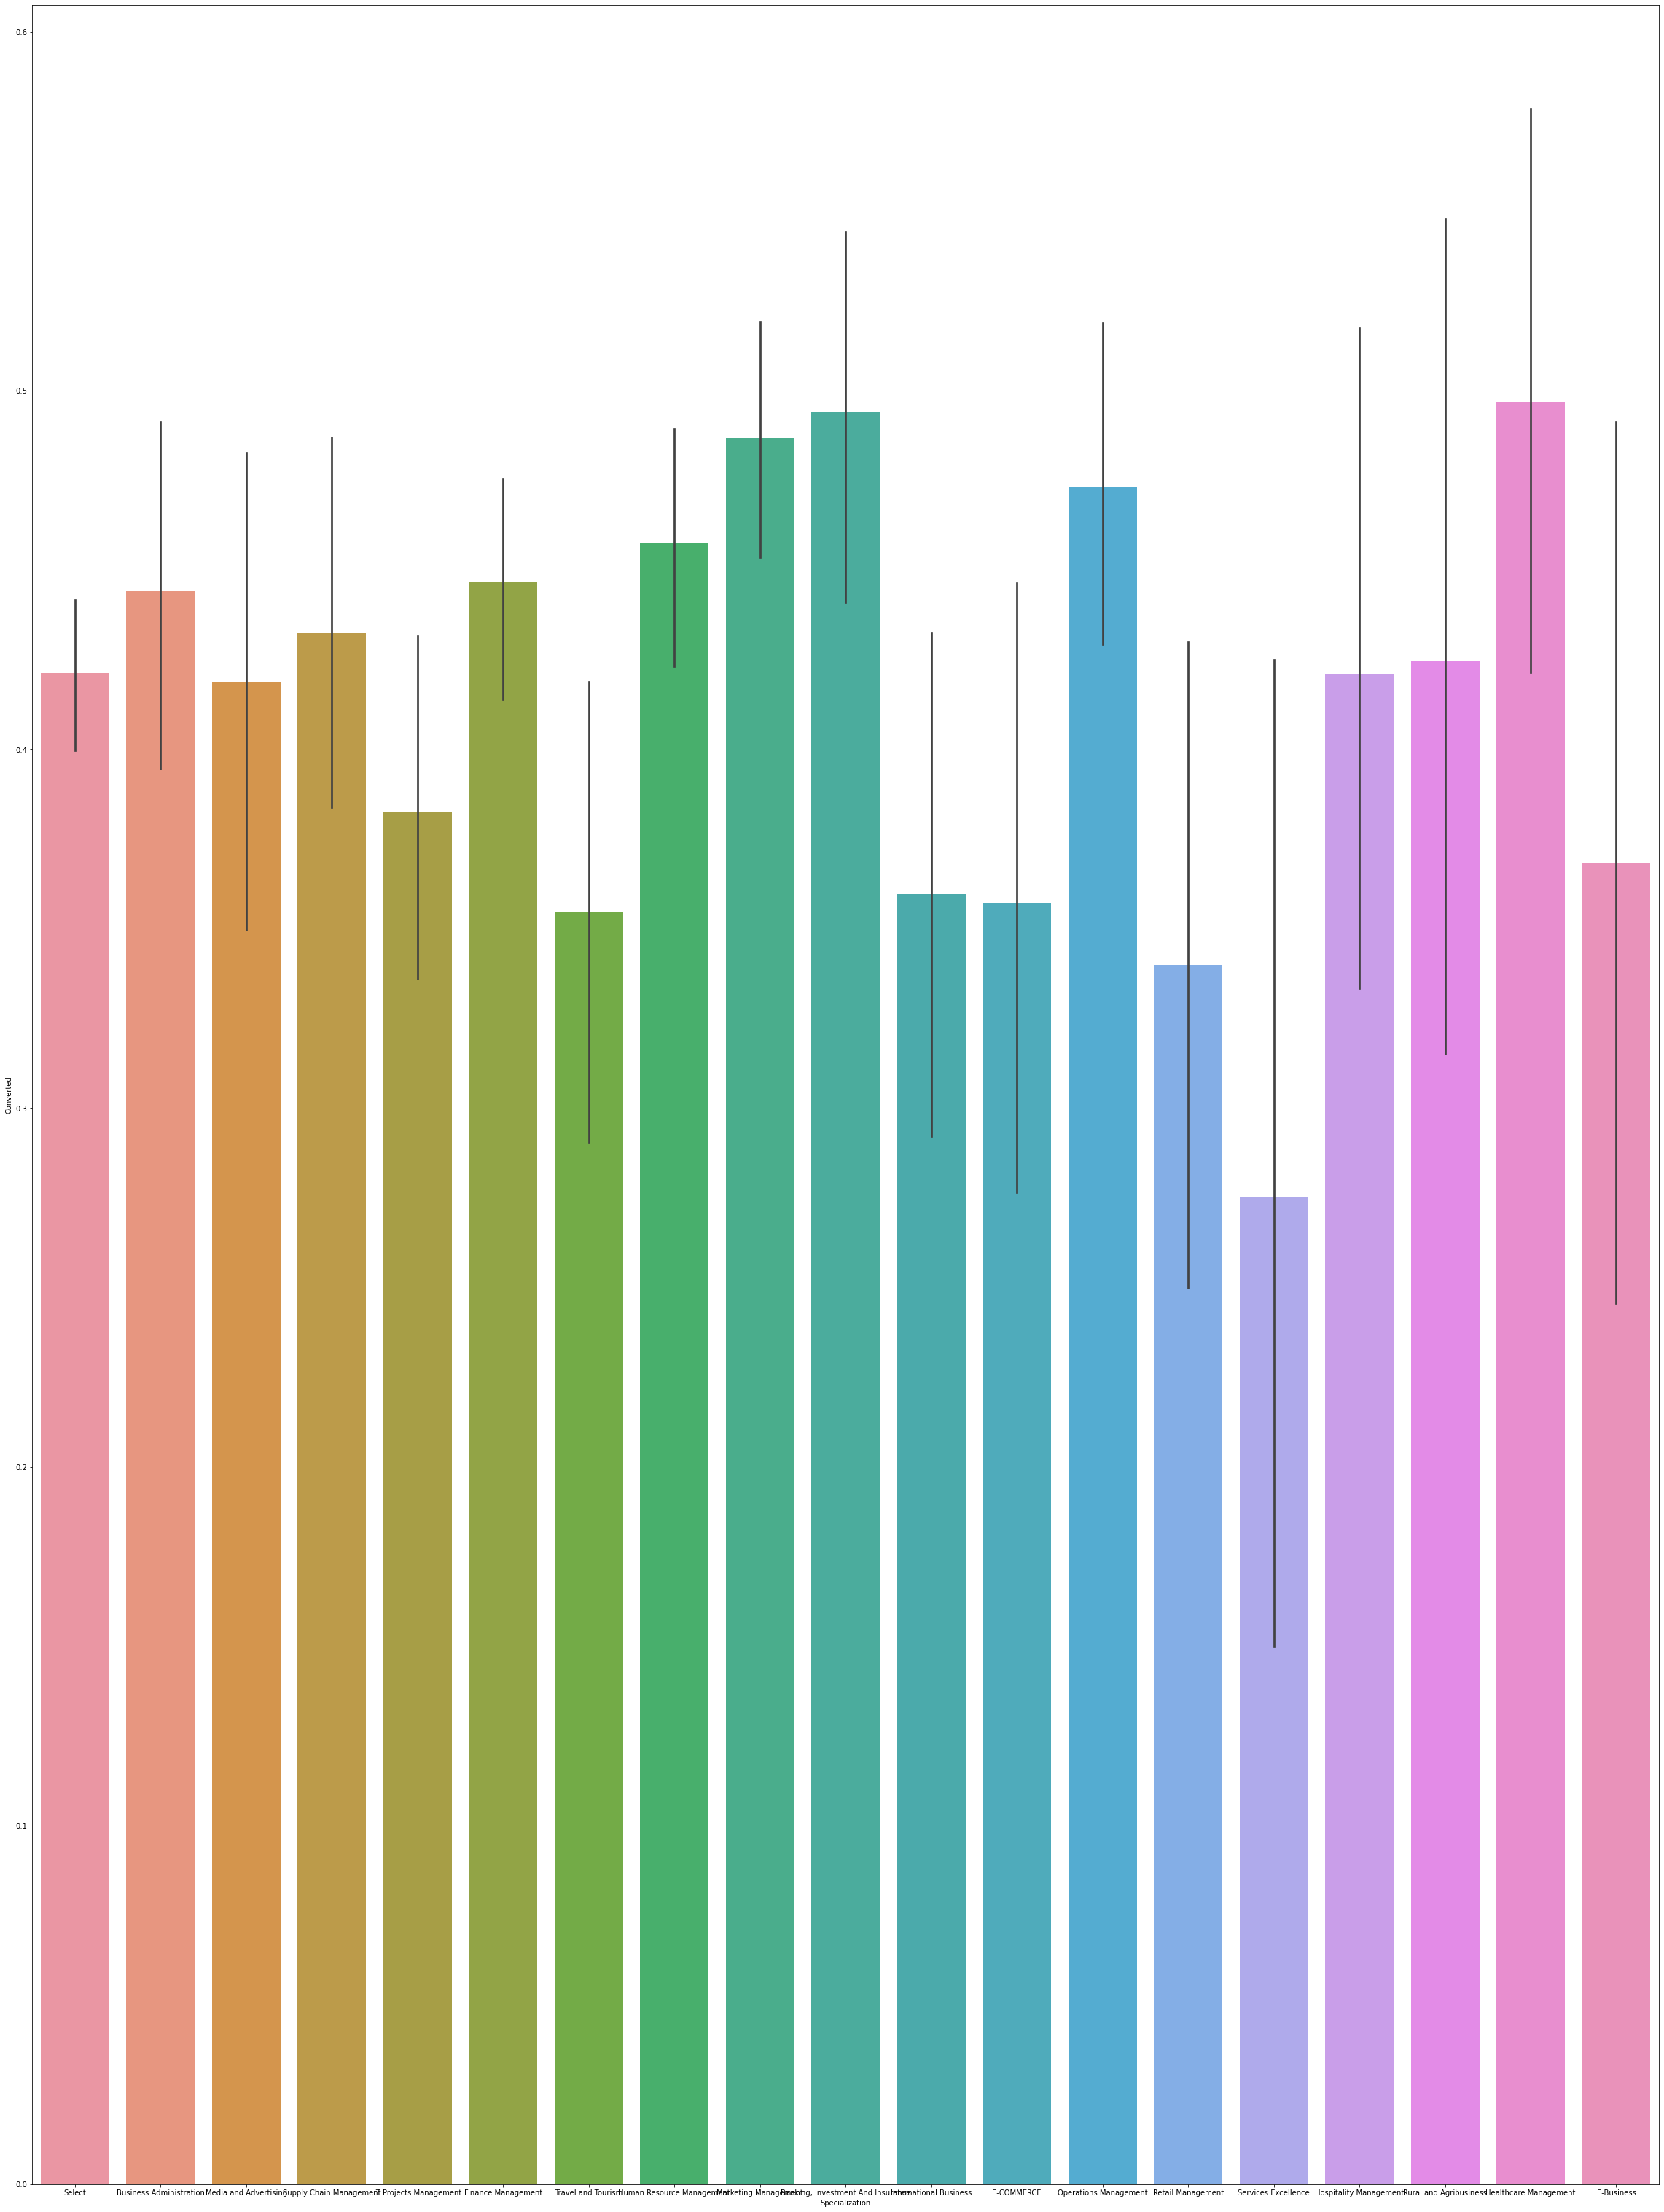

In [47]:
plt.figure(figsize=[40,55])
sns.barplot(lead_df["Specialization"],lead_df["Converted"],)
plt.show()

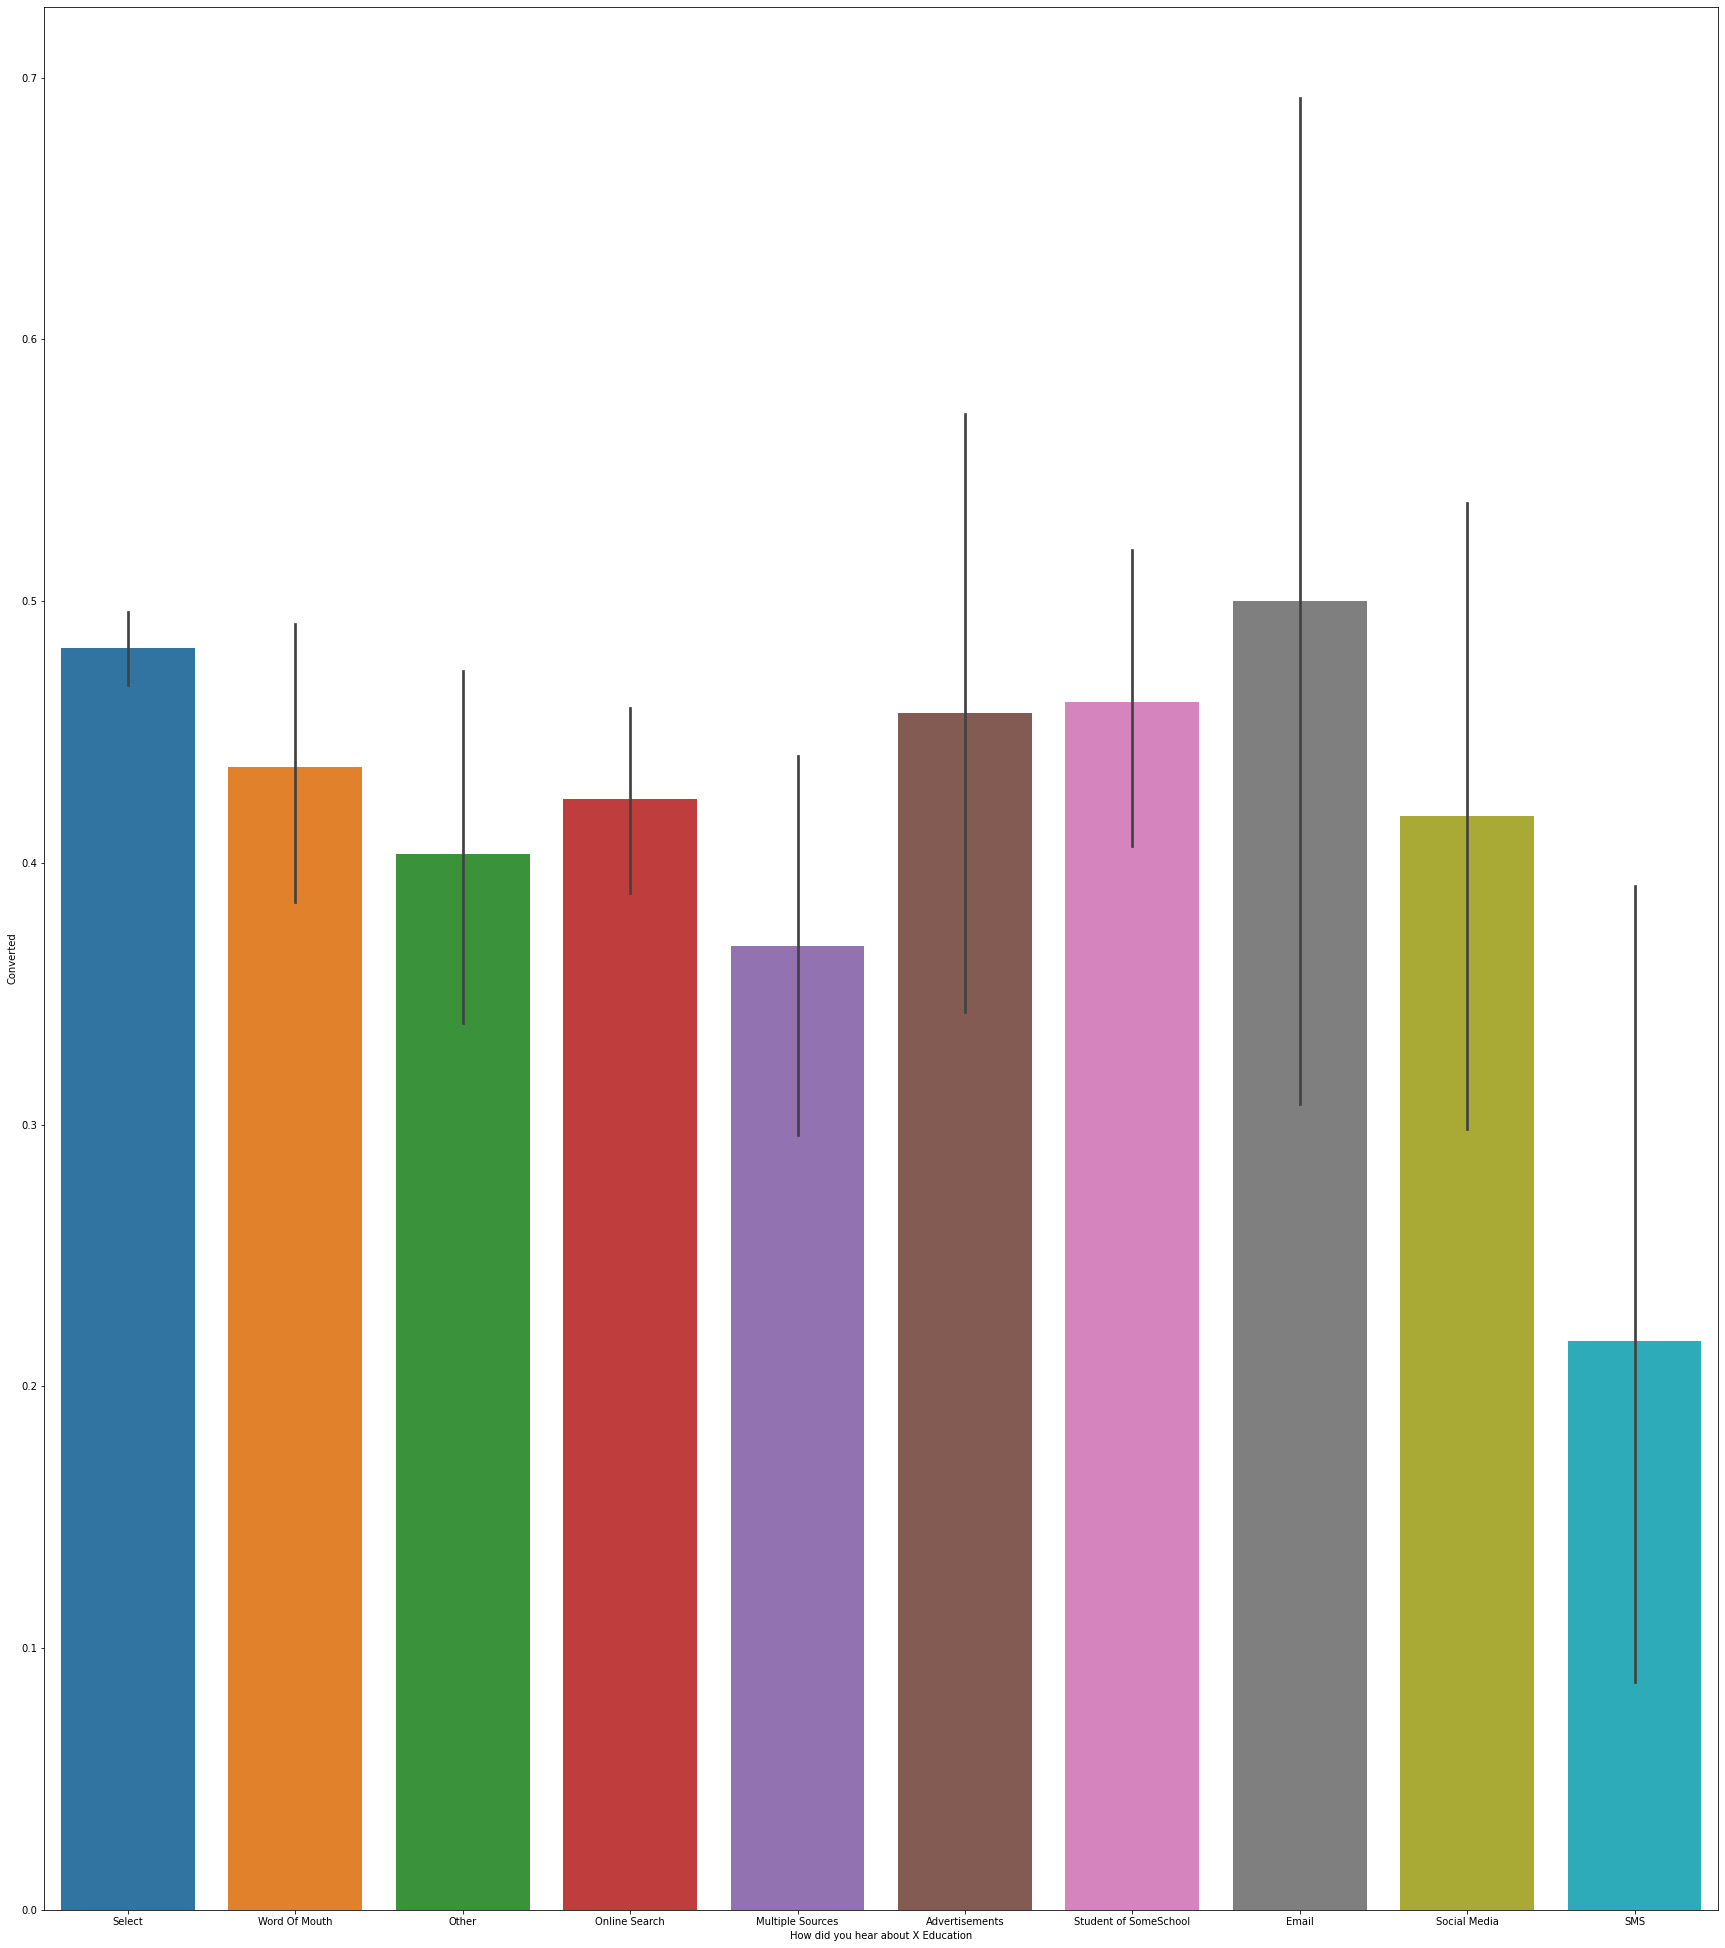

In [48]:
plt.figure(figsize=[30,35])
sns.barplot(lead_df["How did you hear about X Education"],lead_df["Converted"],)
plt.show()

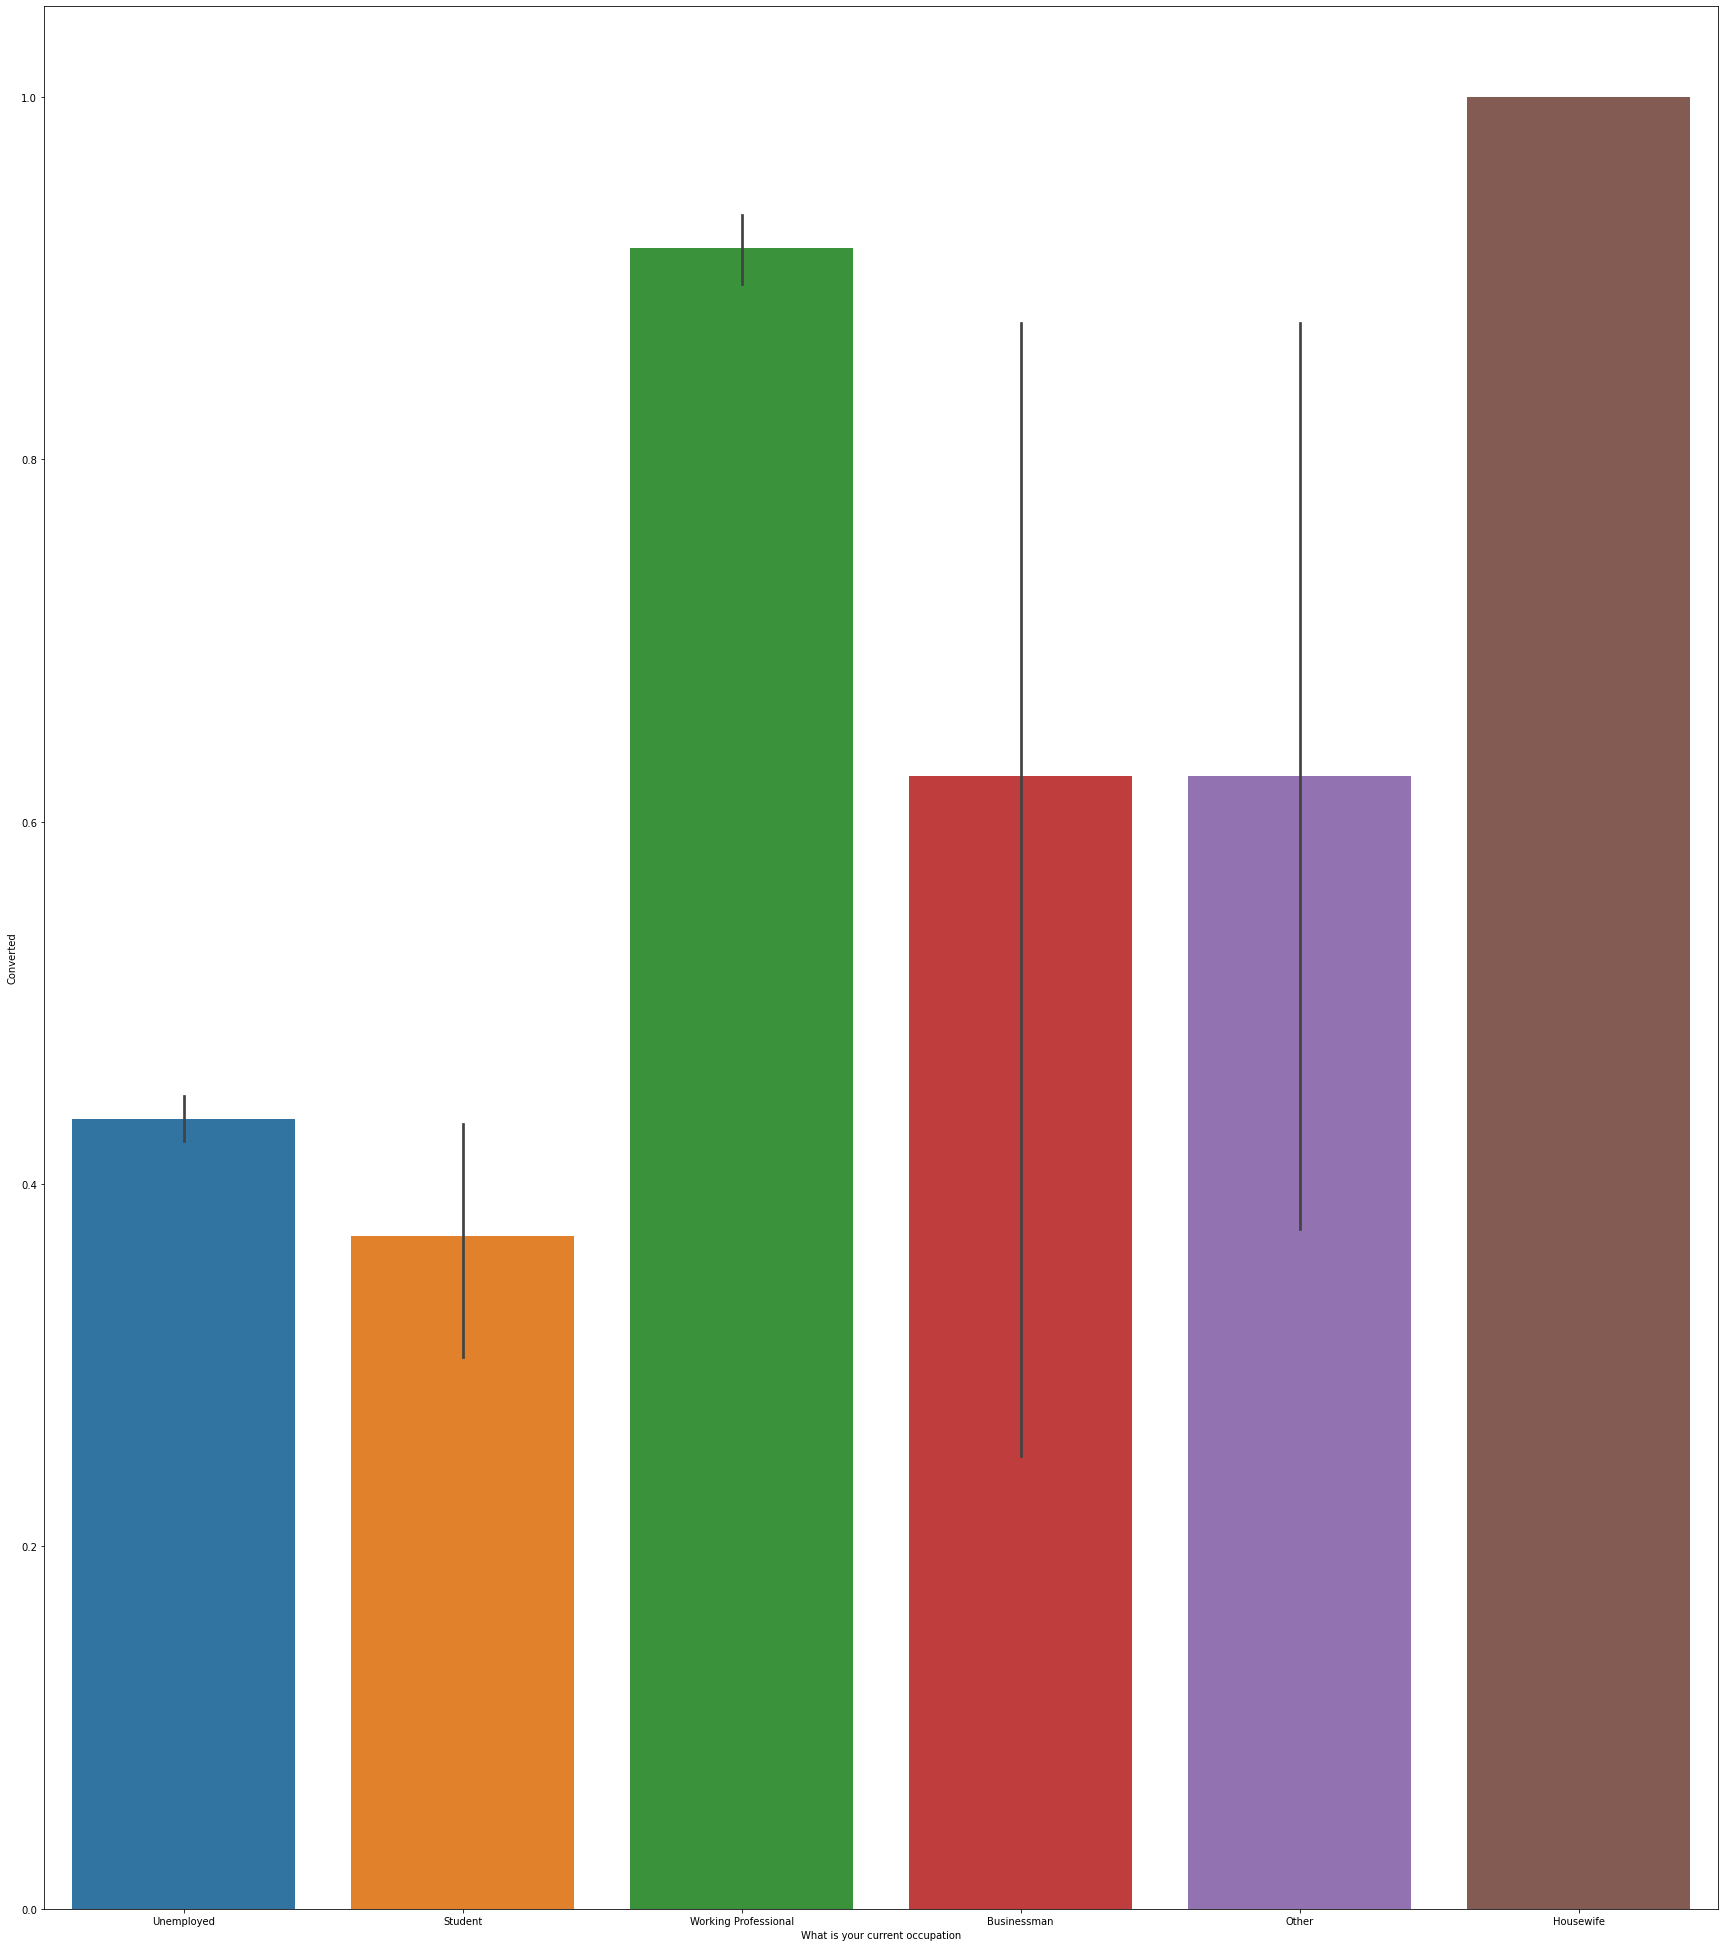

In [49]:
plt.figure(figsize=[30,35])
sns.barplot(lead_df["What is your current occupation"],lead_df["Converted"],)
plt.show()

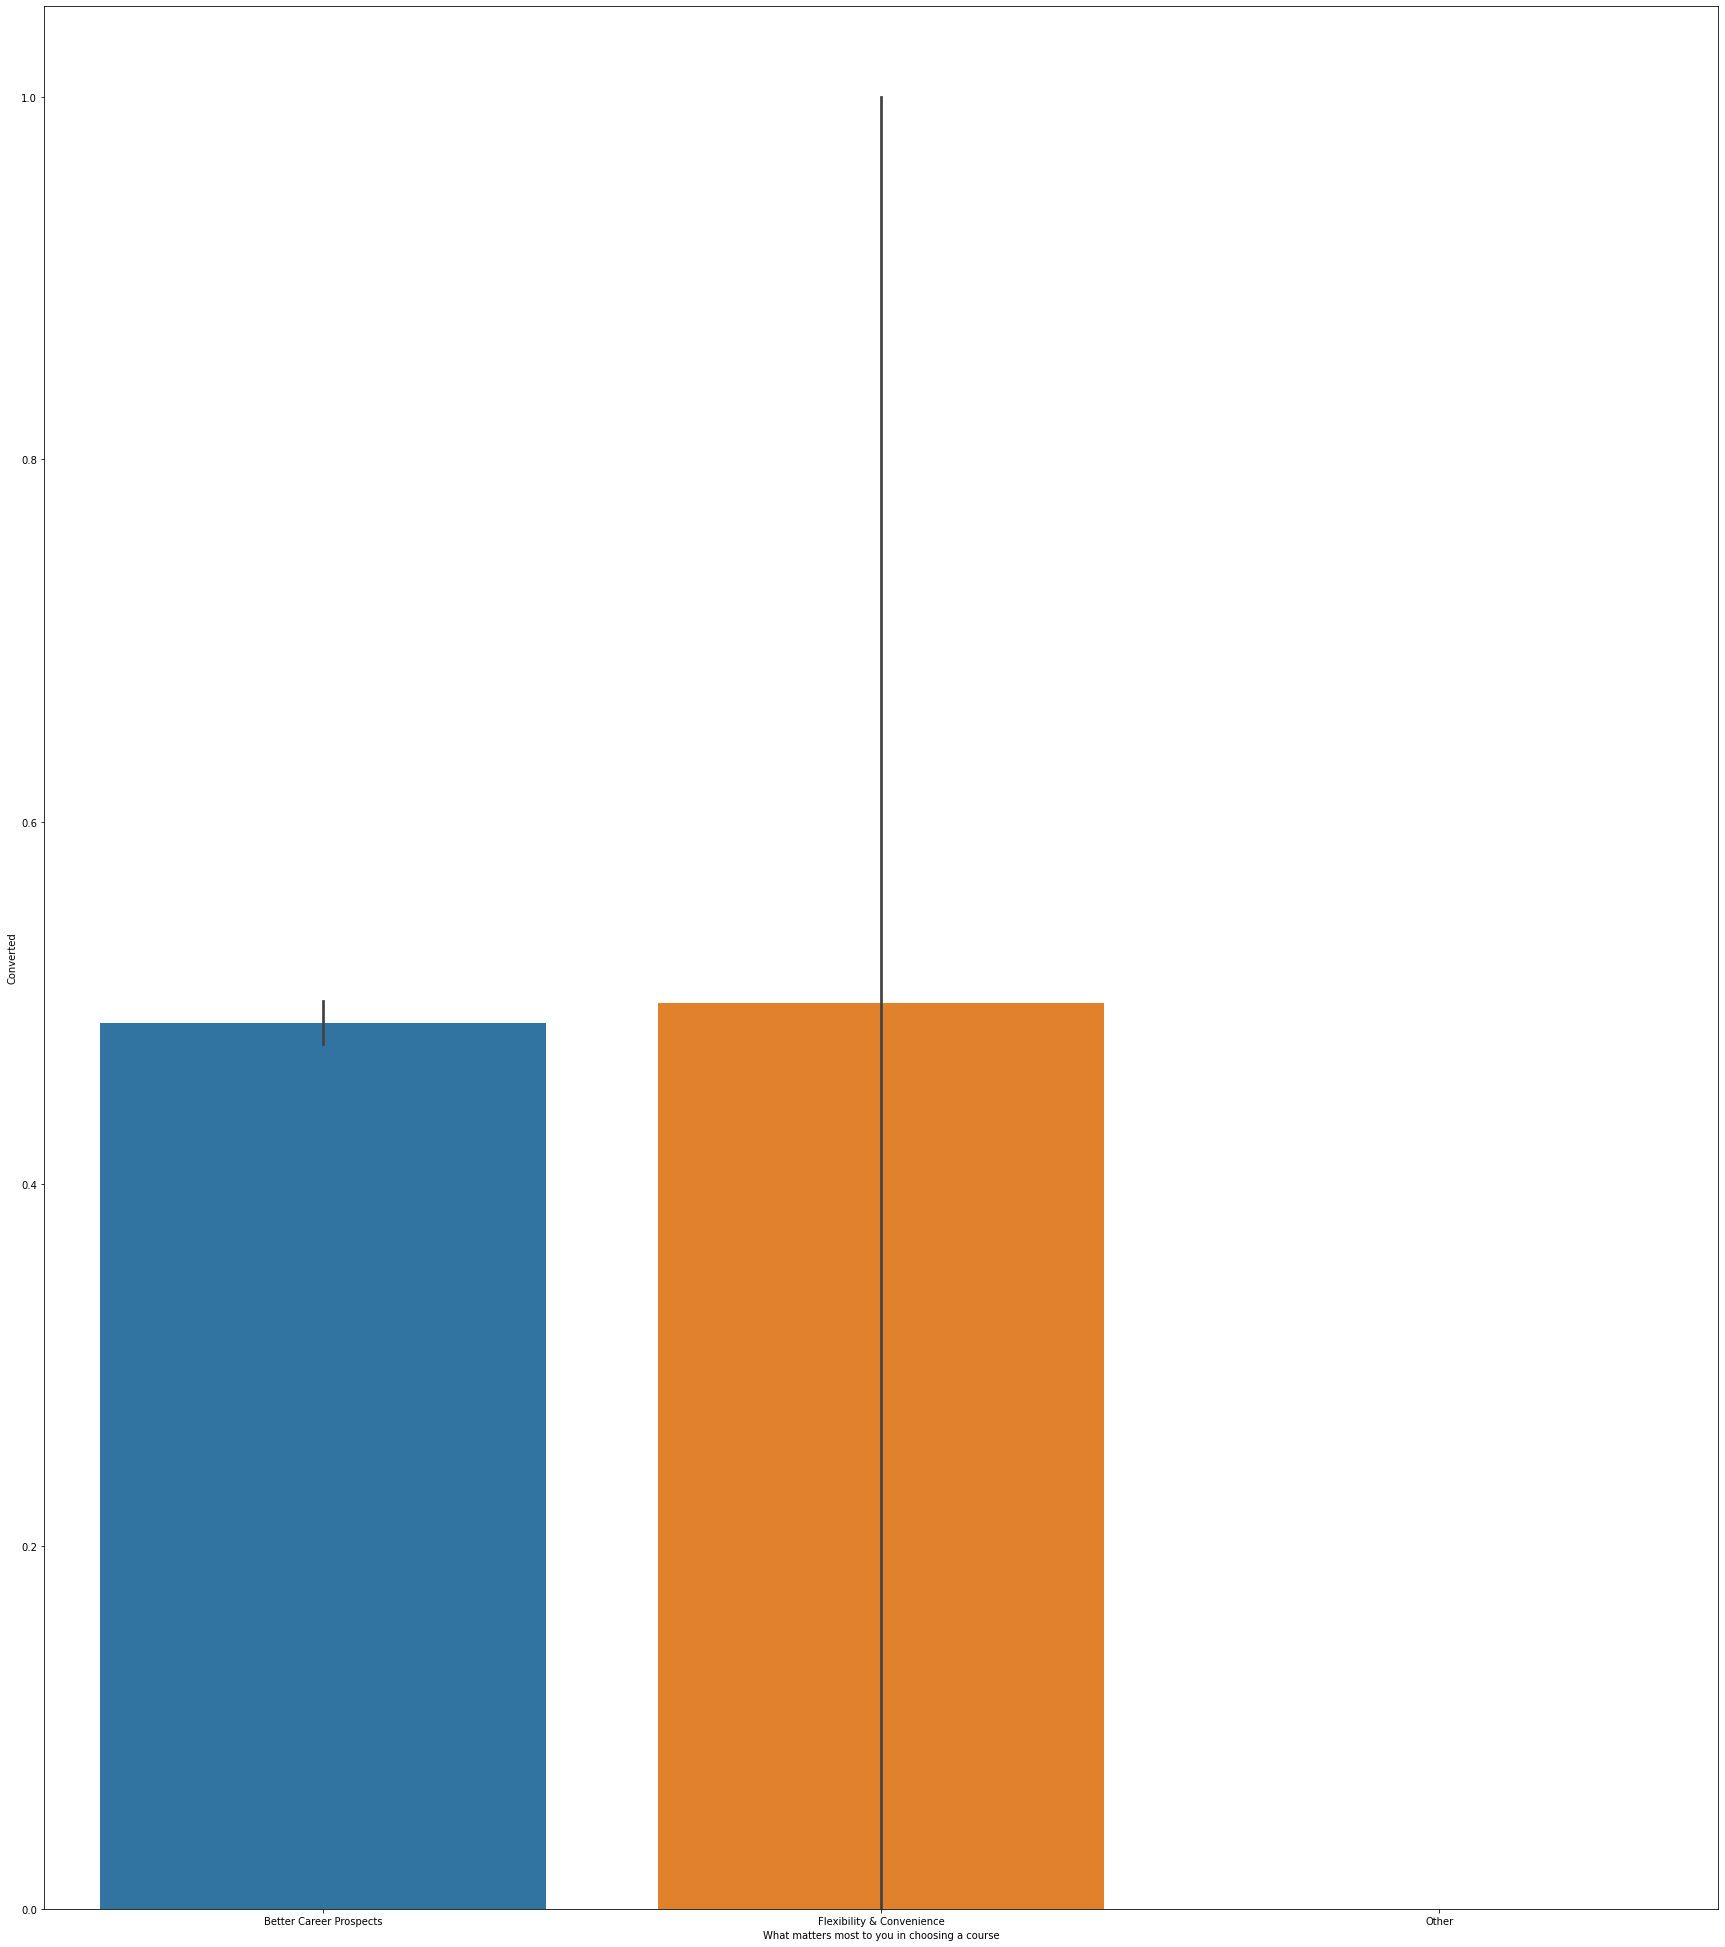

In [50]:
plt.figure(figsize=[30,35])
sns.barplot(lead_df["What matters most to you in choosing a course"],lead_df["Converted"],)
plt.show()

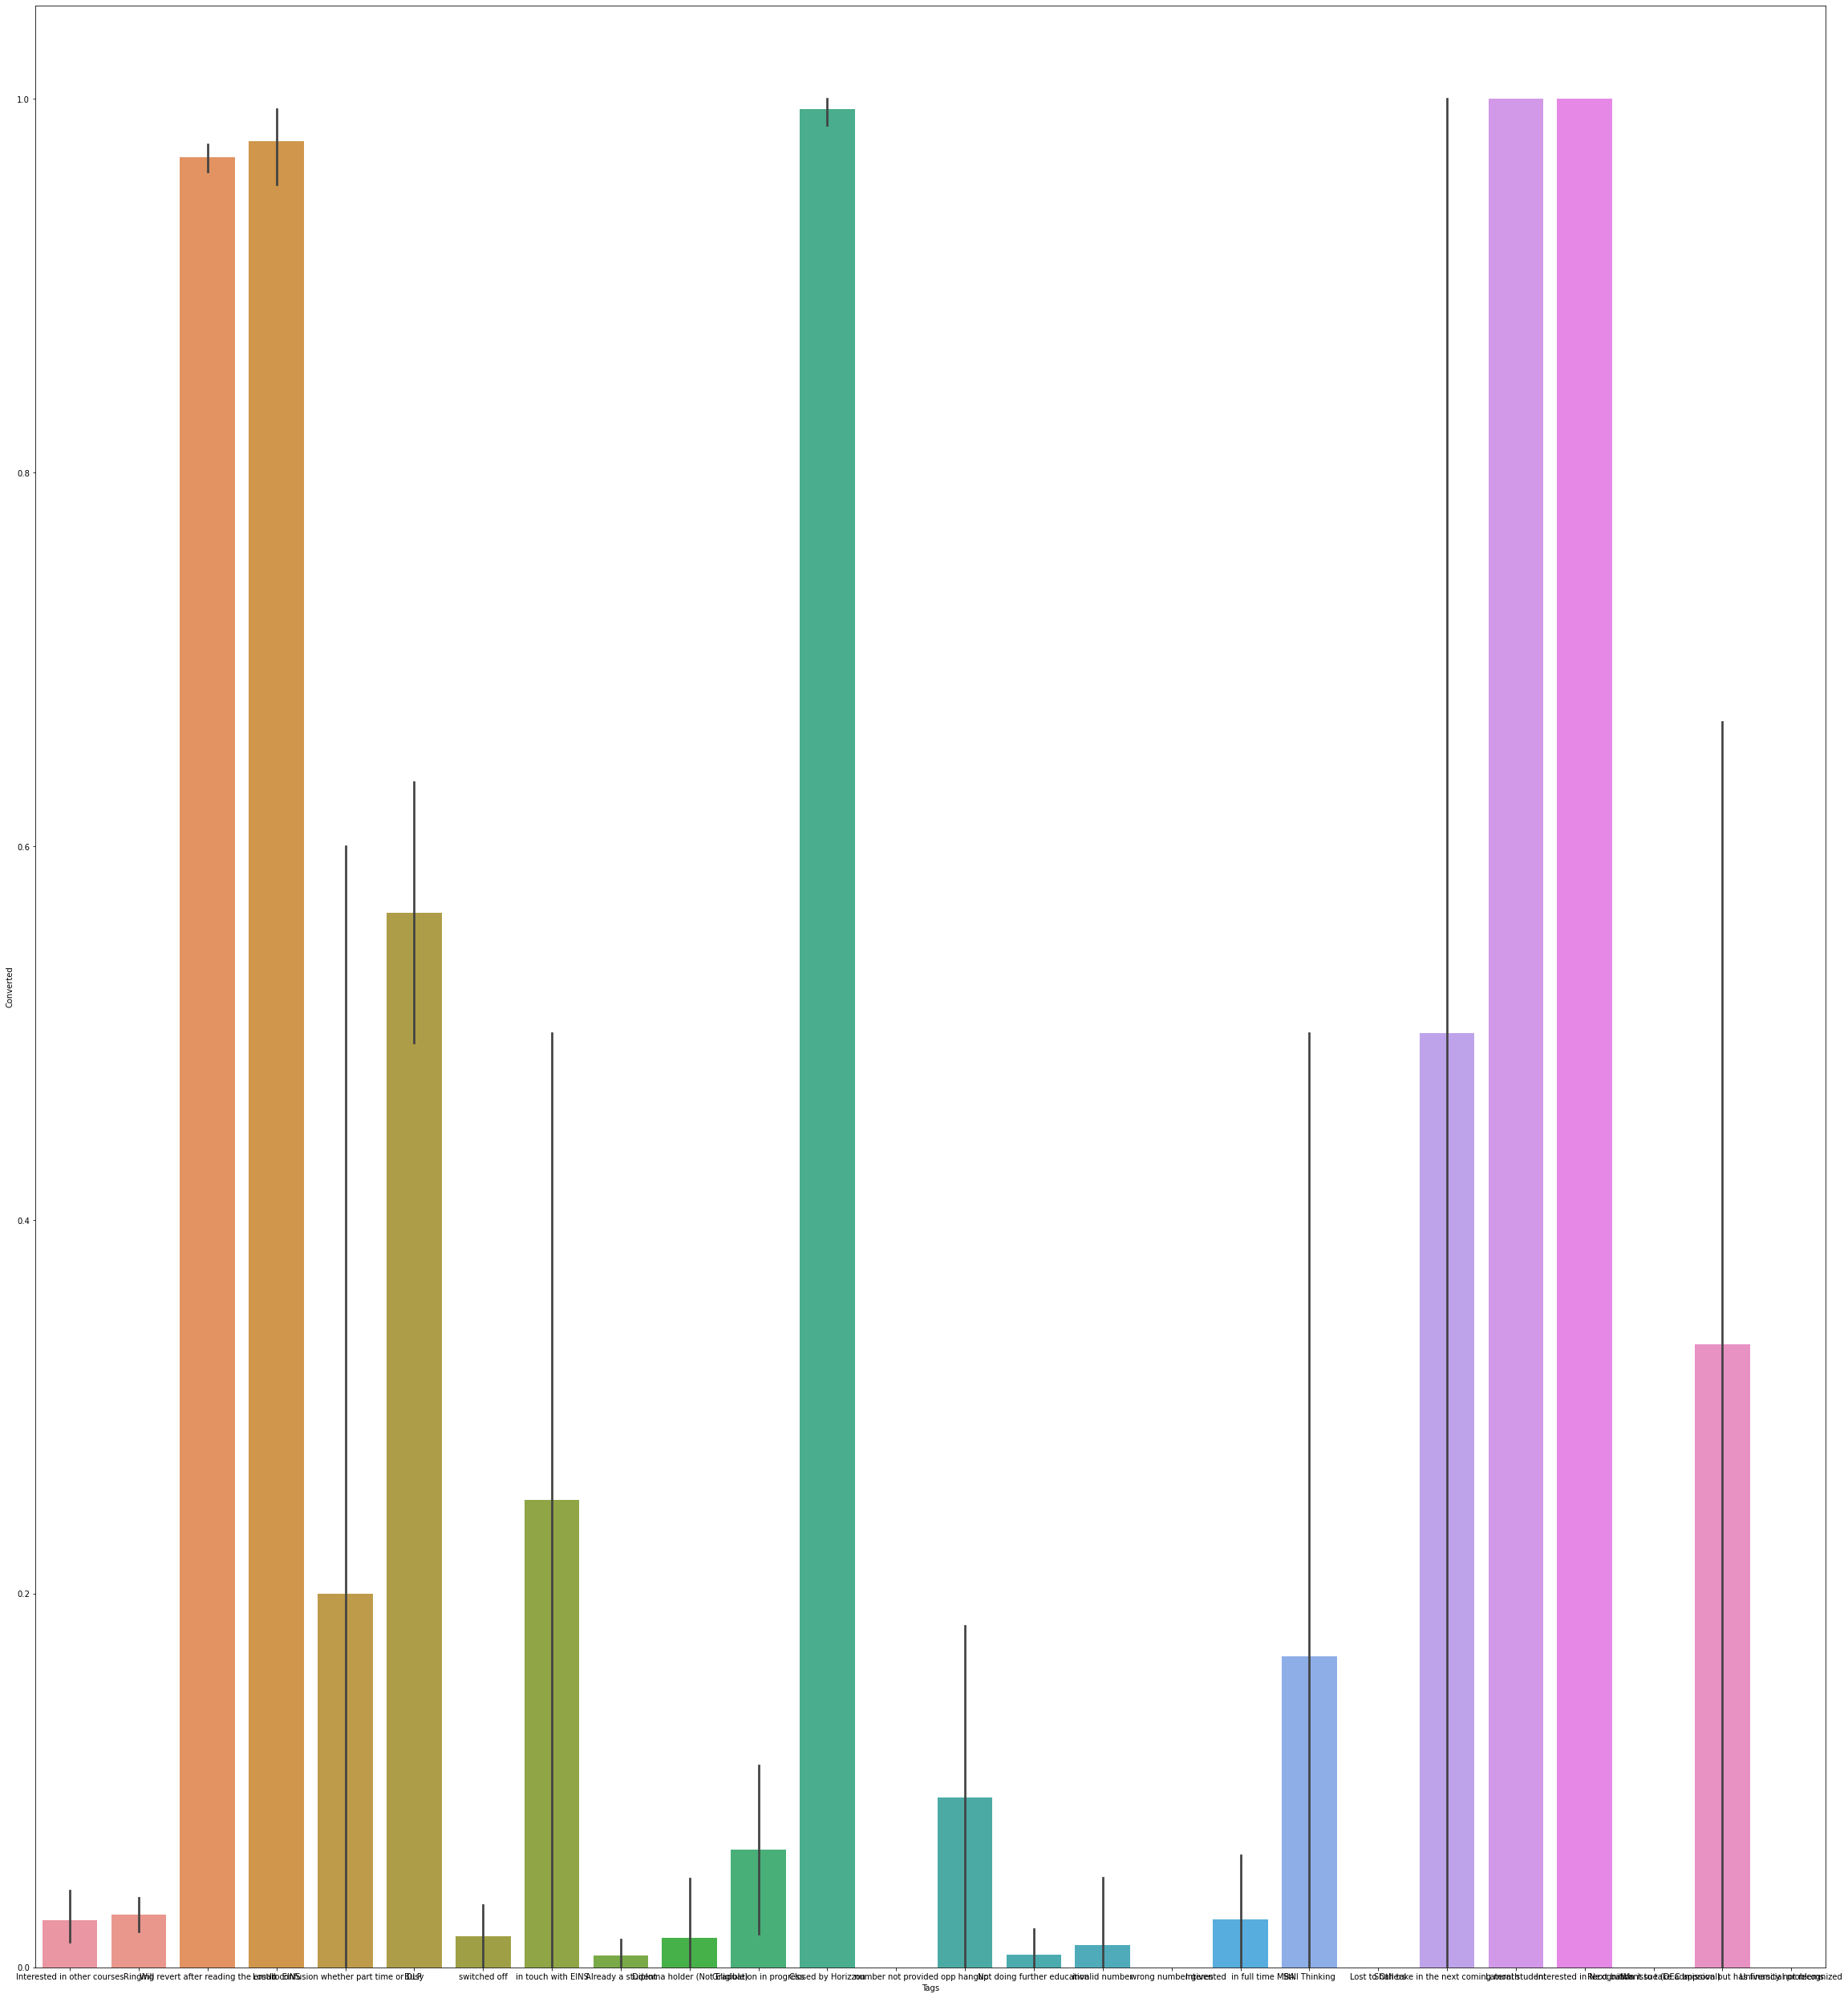

In [51]:
plt.figure(figsize=[40,45])
sns.barplot(lead_df["Tags"],lead_df["Converted"],)
plt.show()

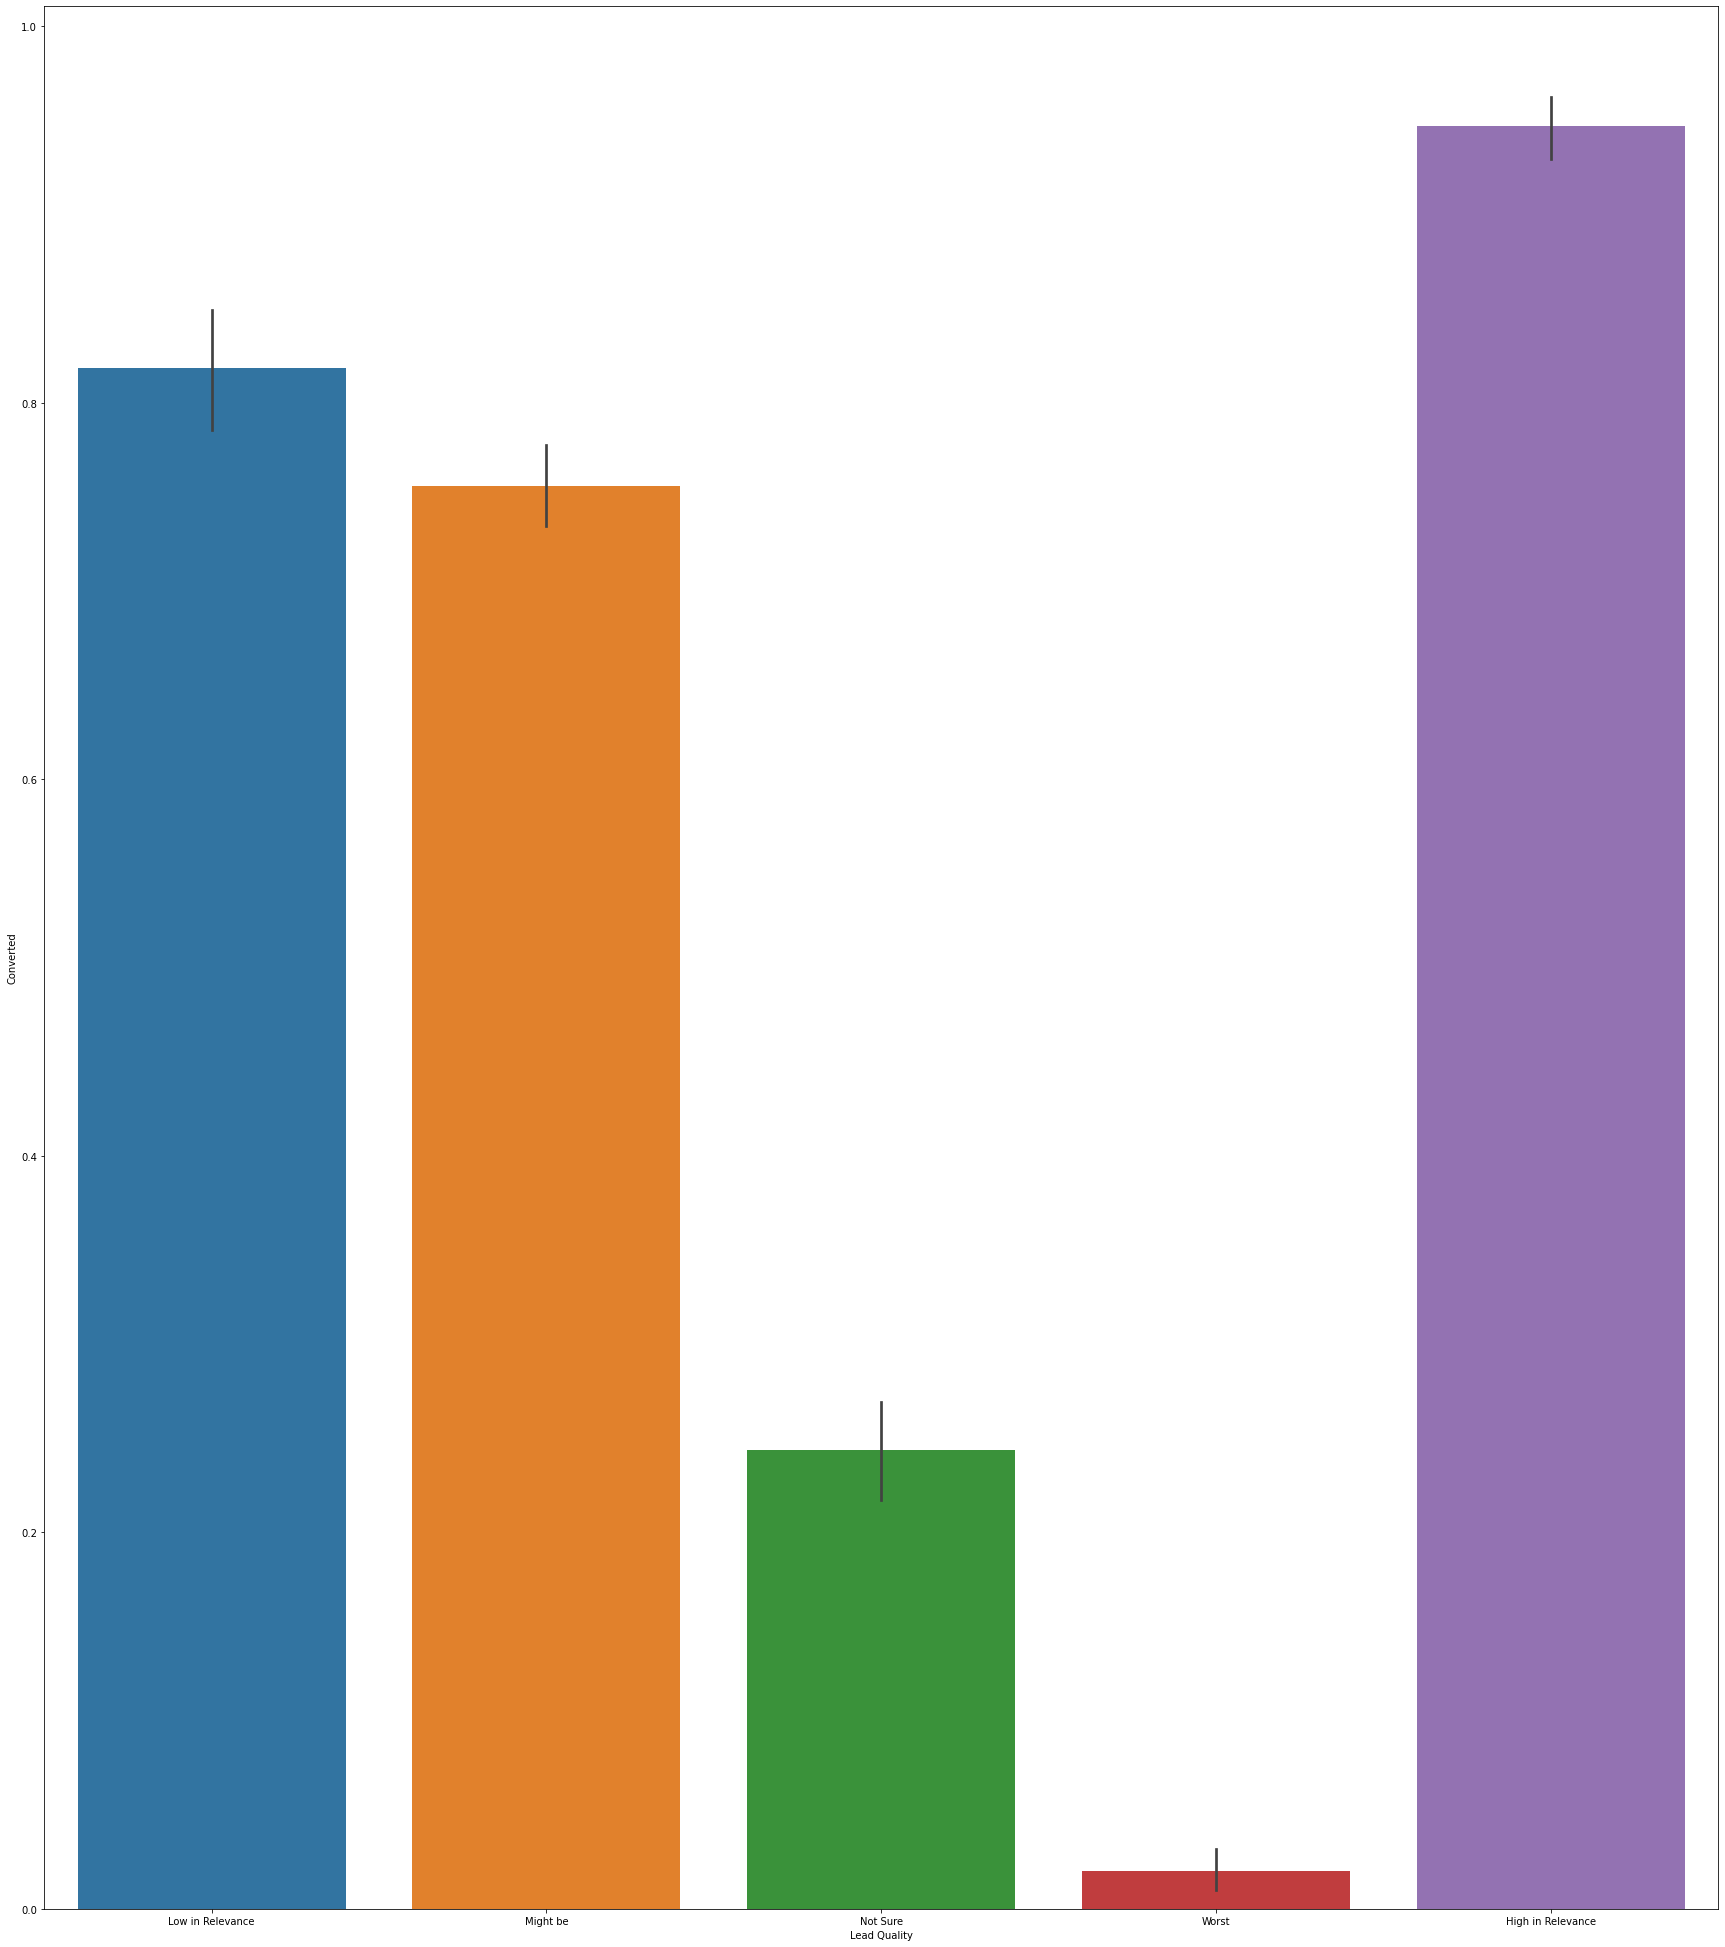

In [52]:
plt.figure(figsize=[30,35])
sns.barplot(lead_df["Lead Quality"],lead_df["Converted"],)
plt.show()

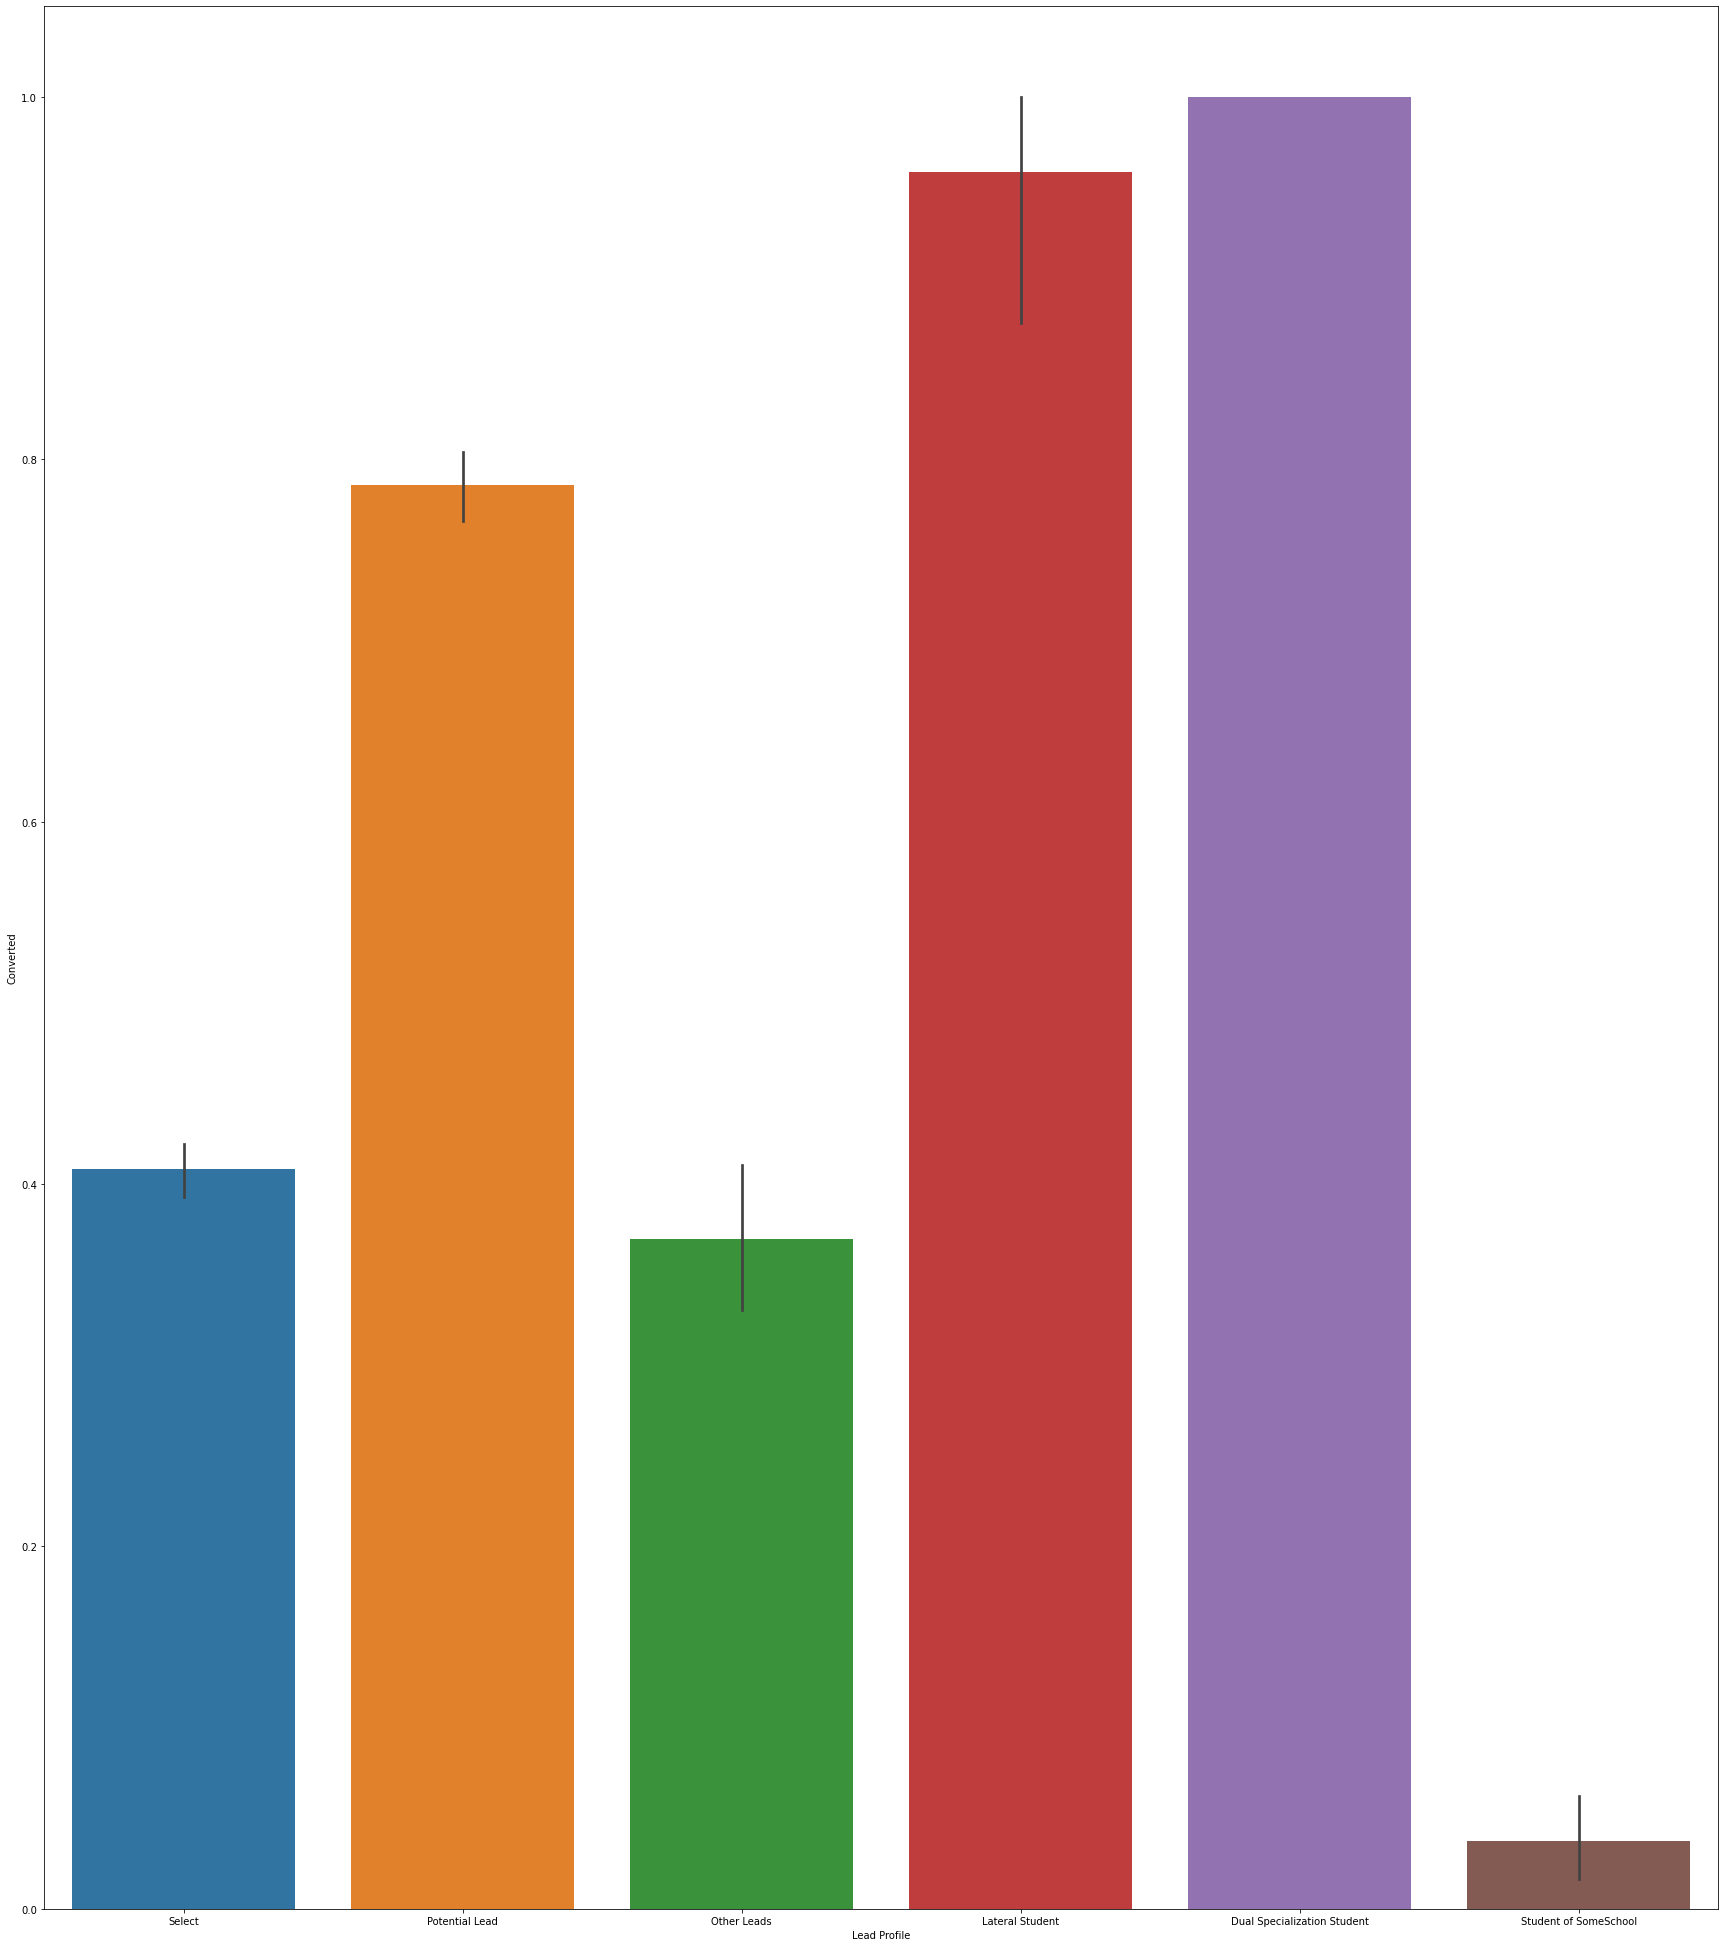

In [53]:
plt.figure(figsize=[30,35])
sns.barplot(lead_df["Lead Profile"],lead_df["Converted"],)
plt.show()

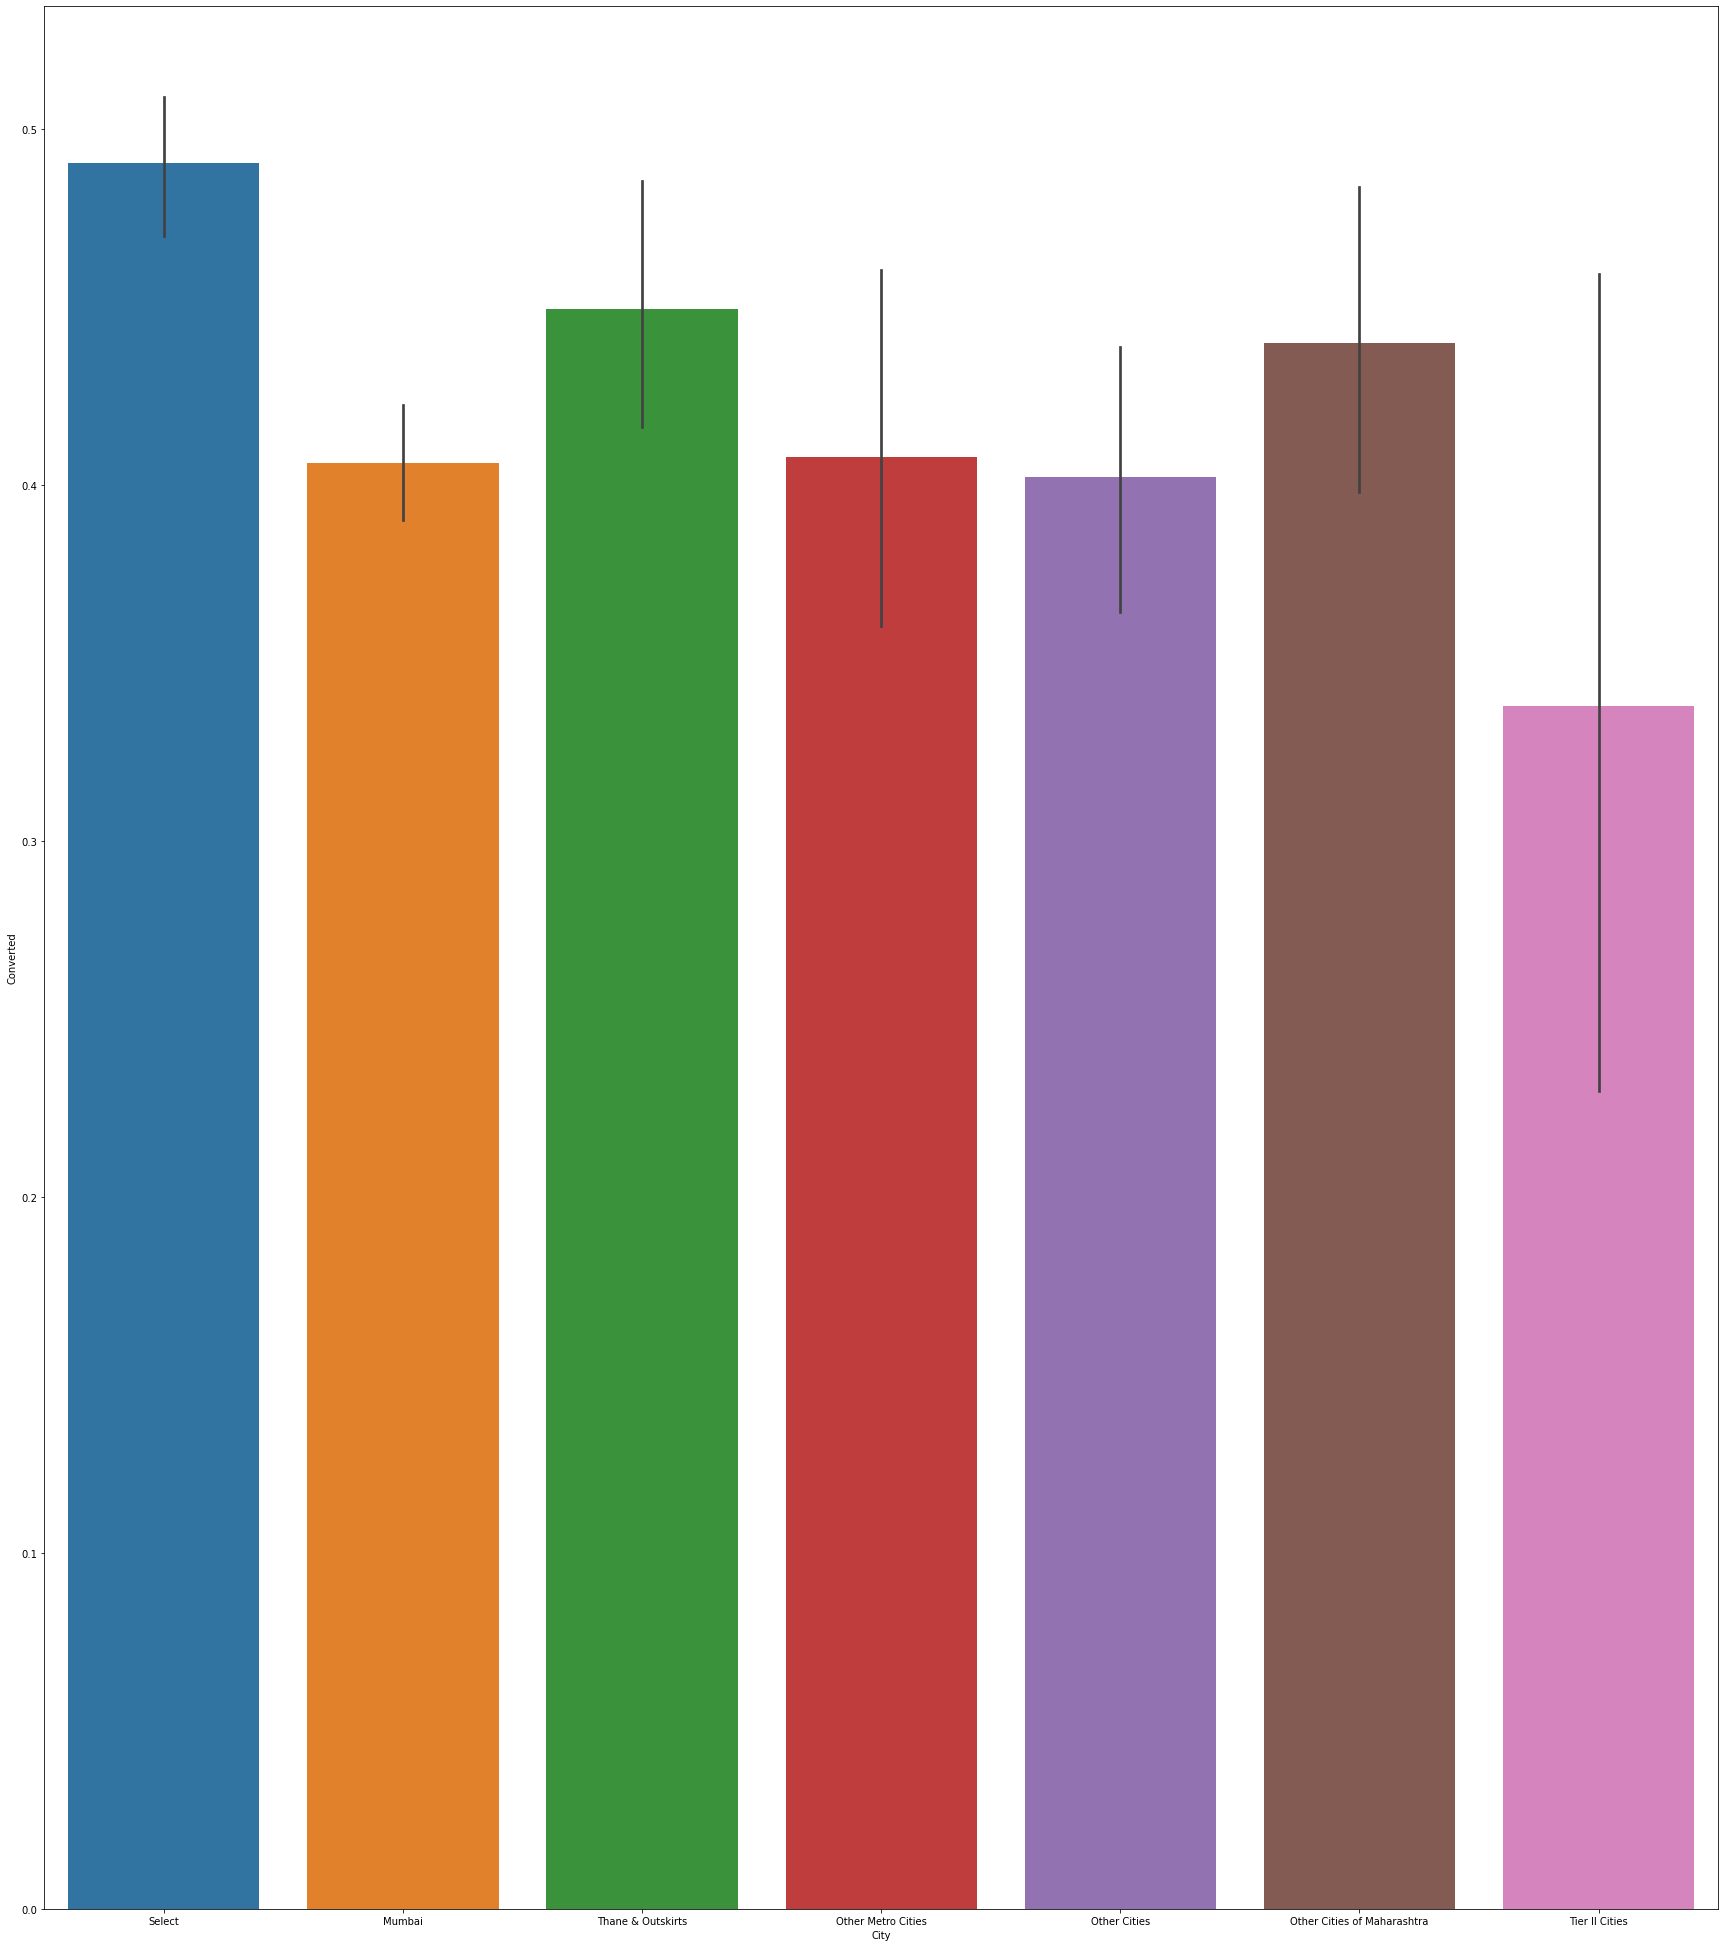

In [54]:
plt.figure(figsize=[30,35])
sns.barplot(lead_df["City"],lead_df["Converted"],)
plt.show()

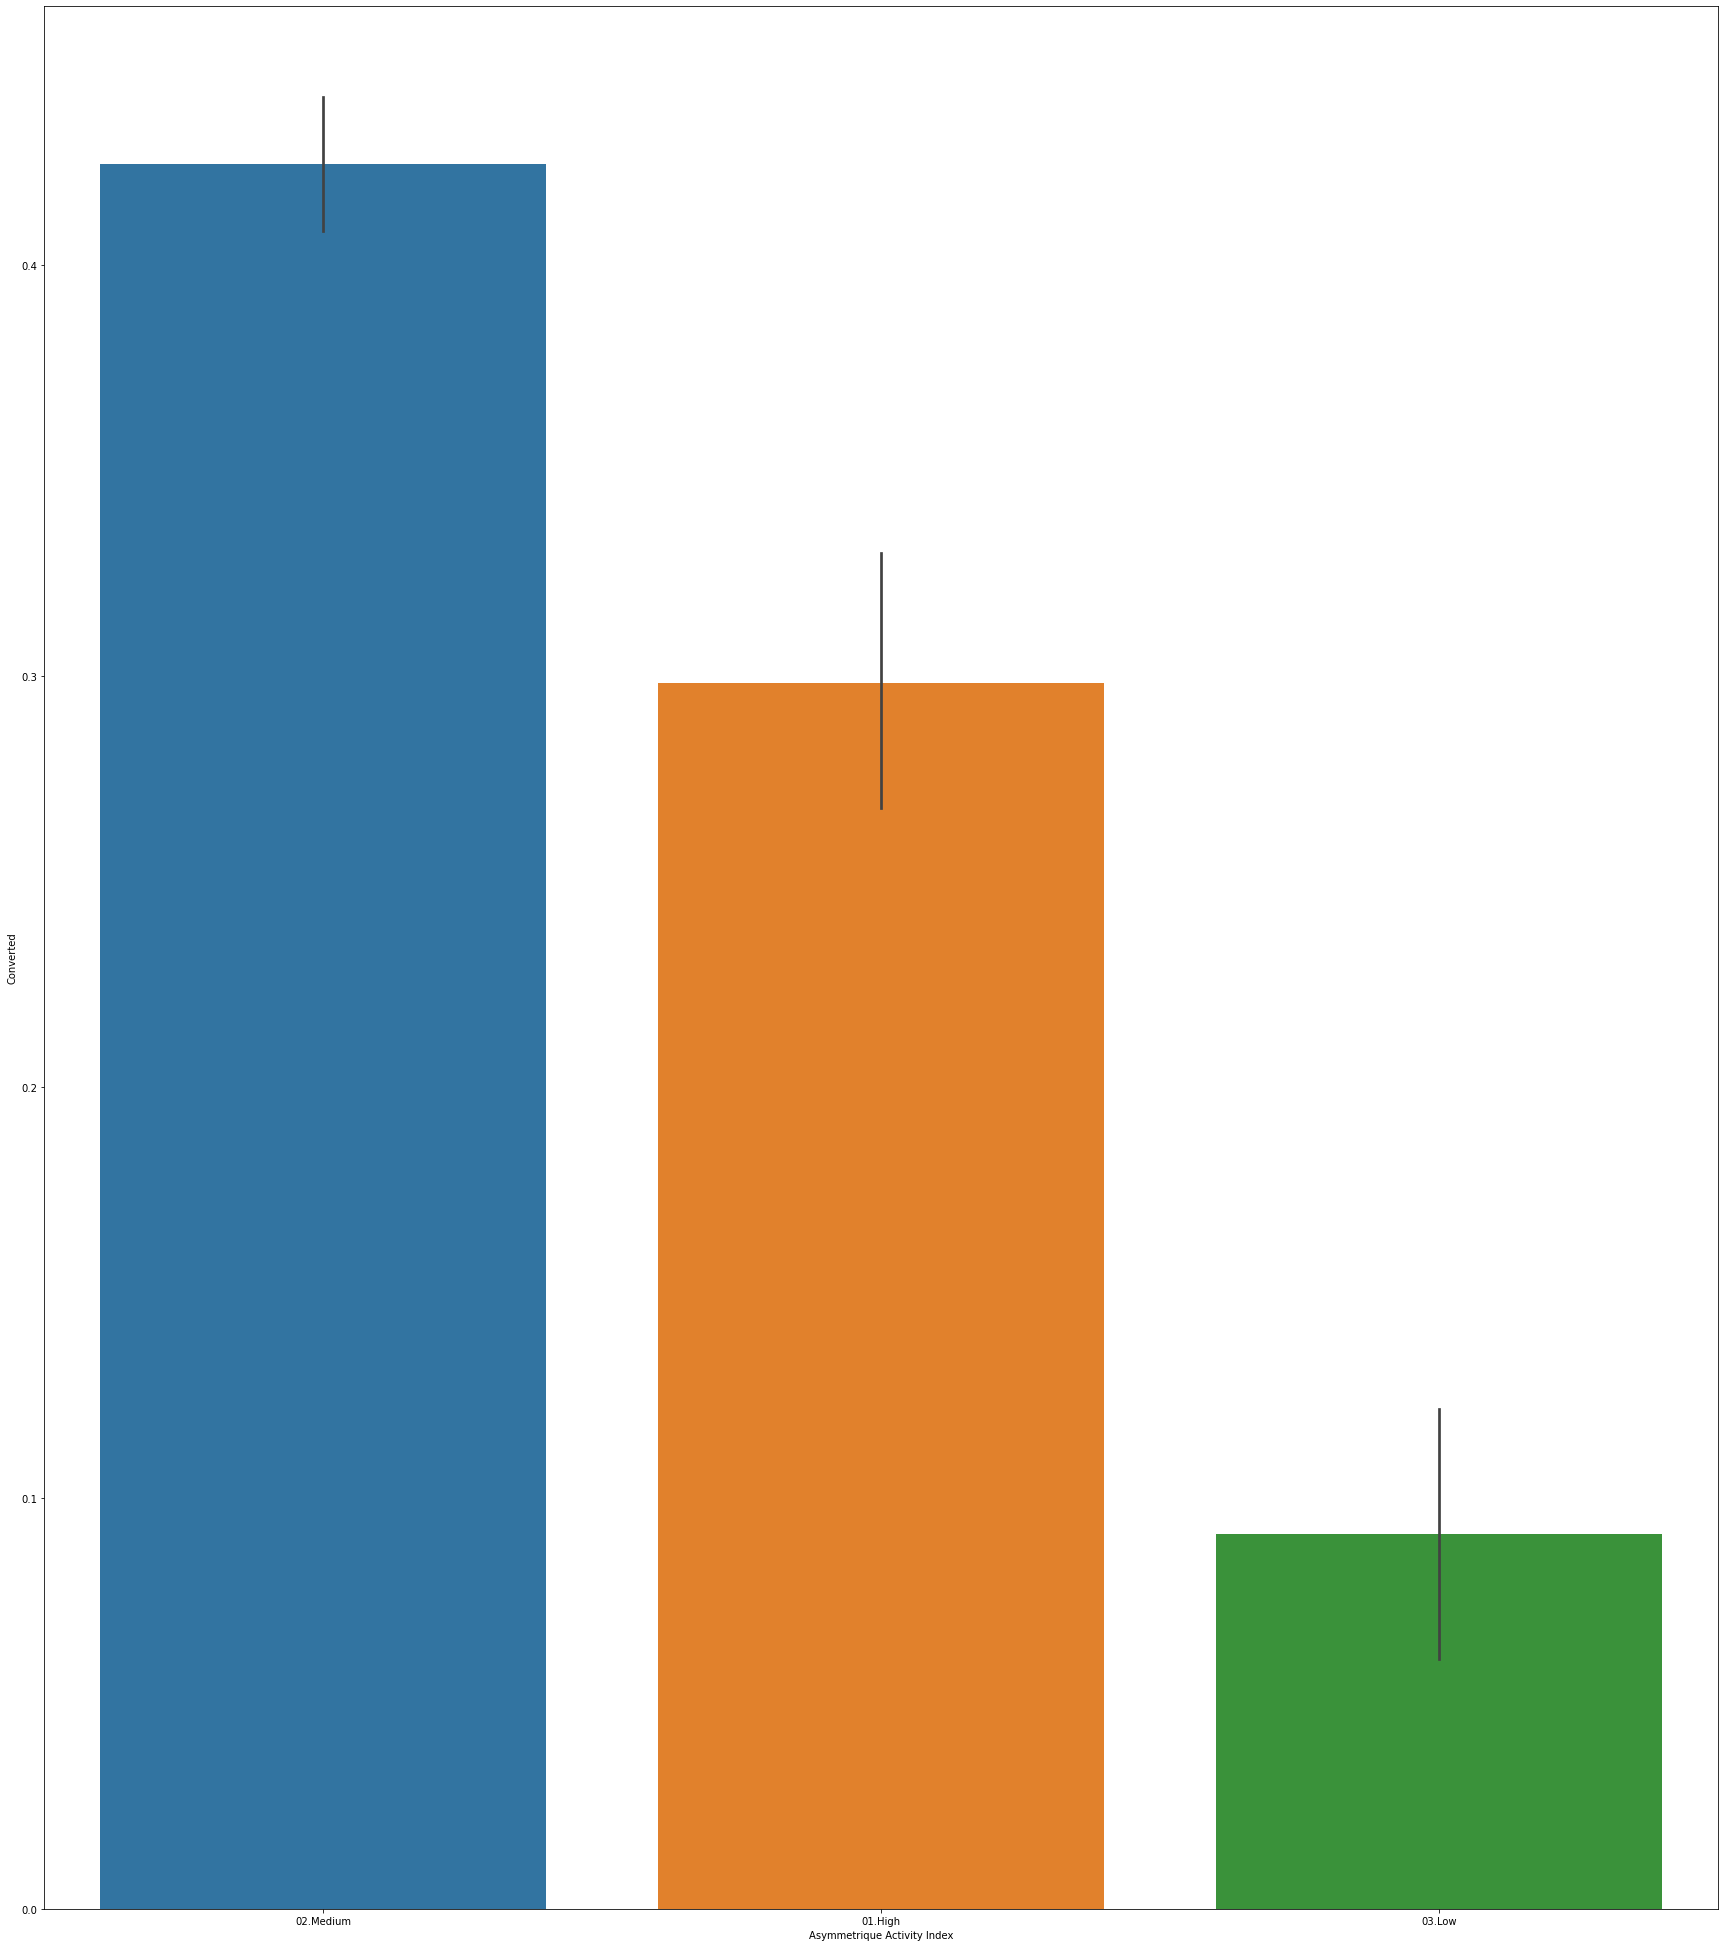

In [55]:
plt.figure(figsize=[30,35])
sns.barplot(lead_df["Asymmetrique Activity Index"],lead_df["Converted"],)
plt.show()

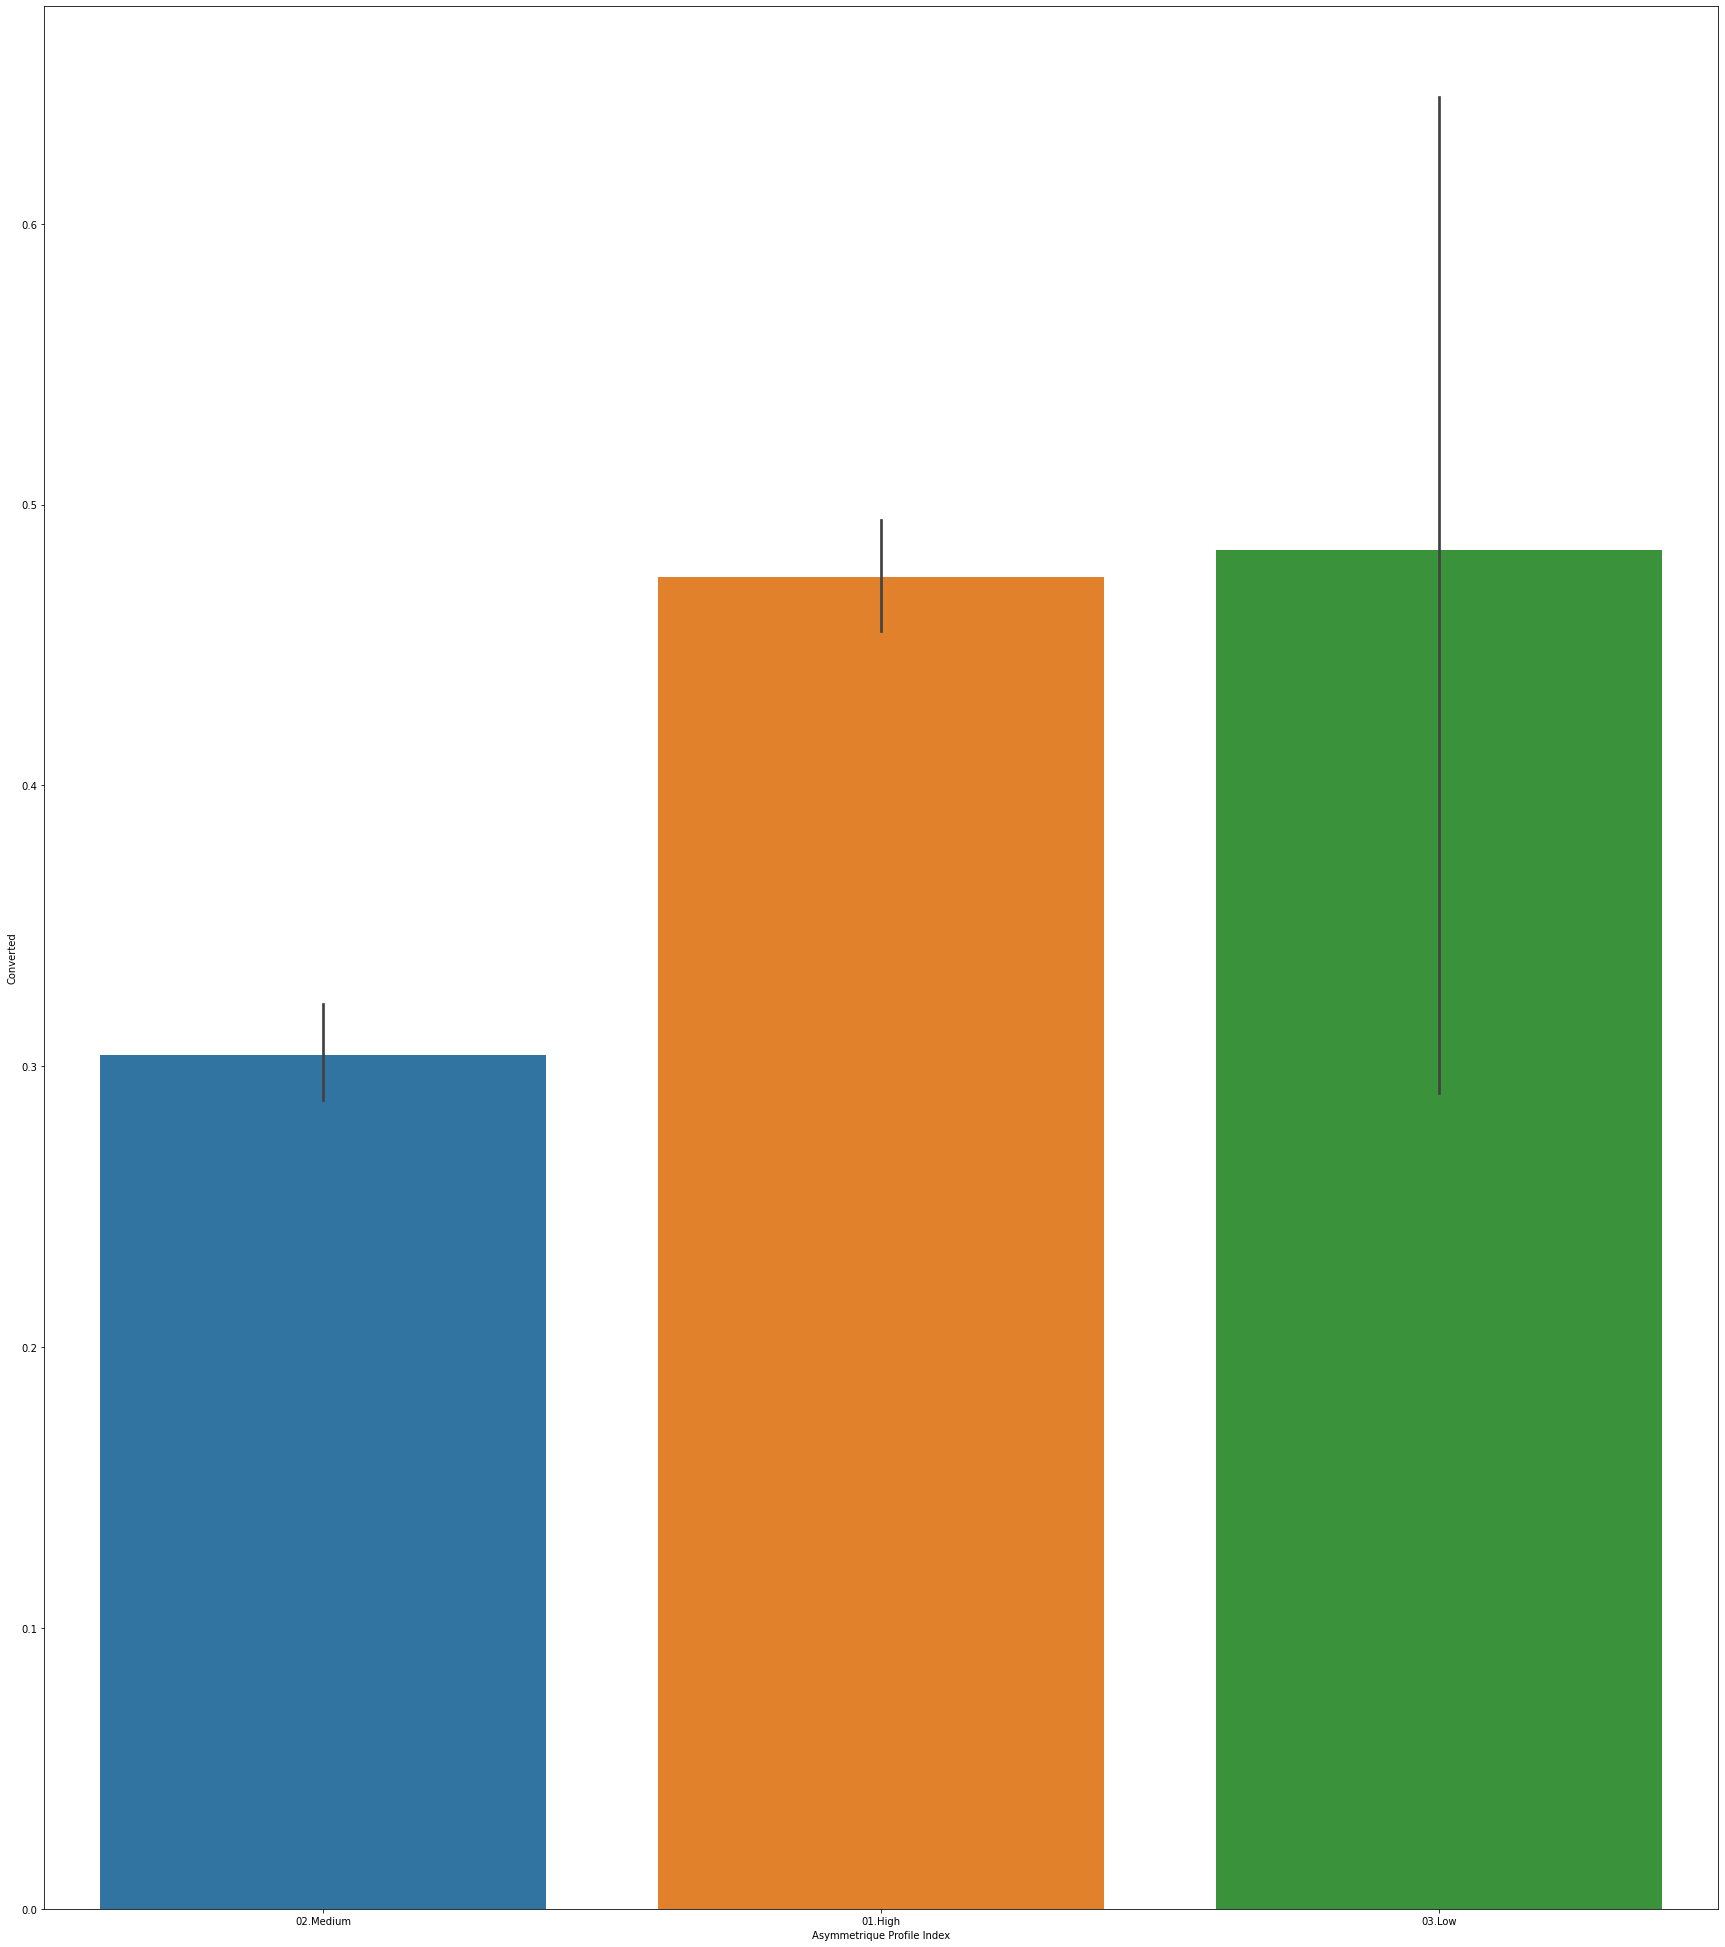

In [56]:
plt.figure(figsize=[30,35])
sns.barplot(lead_df["Asymmetrique Profile Index"],lead_df["Converted"],)
plt.show()

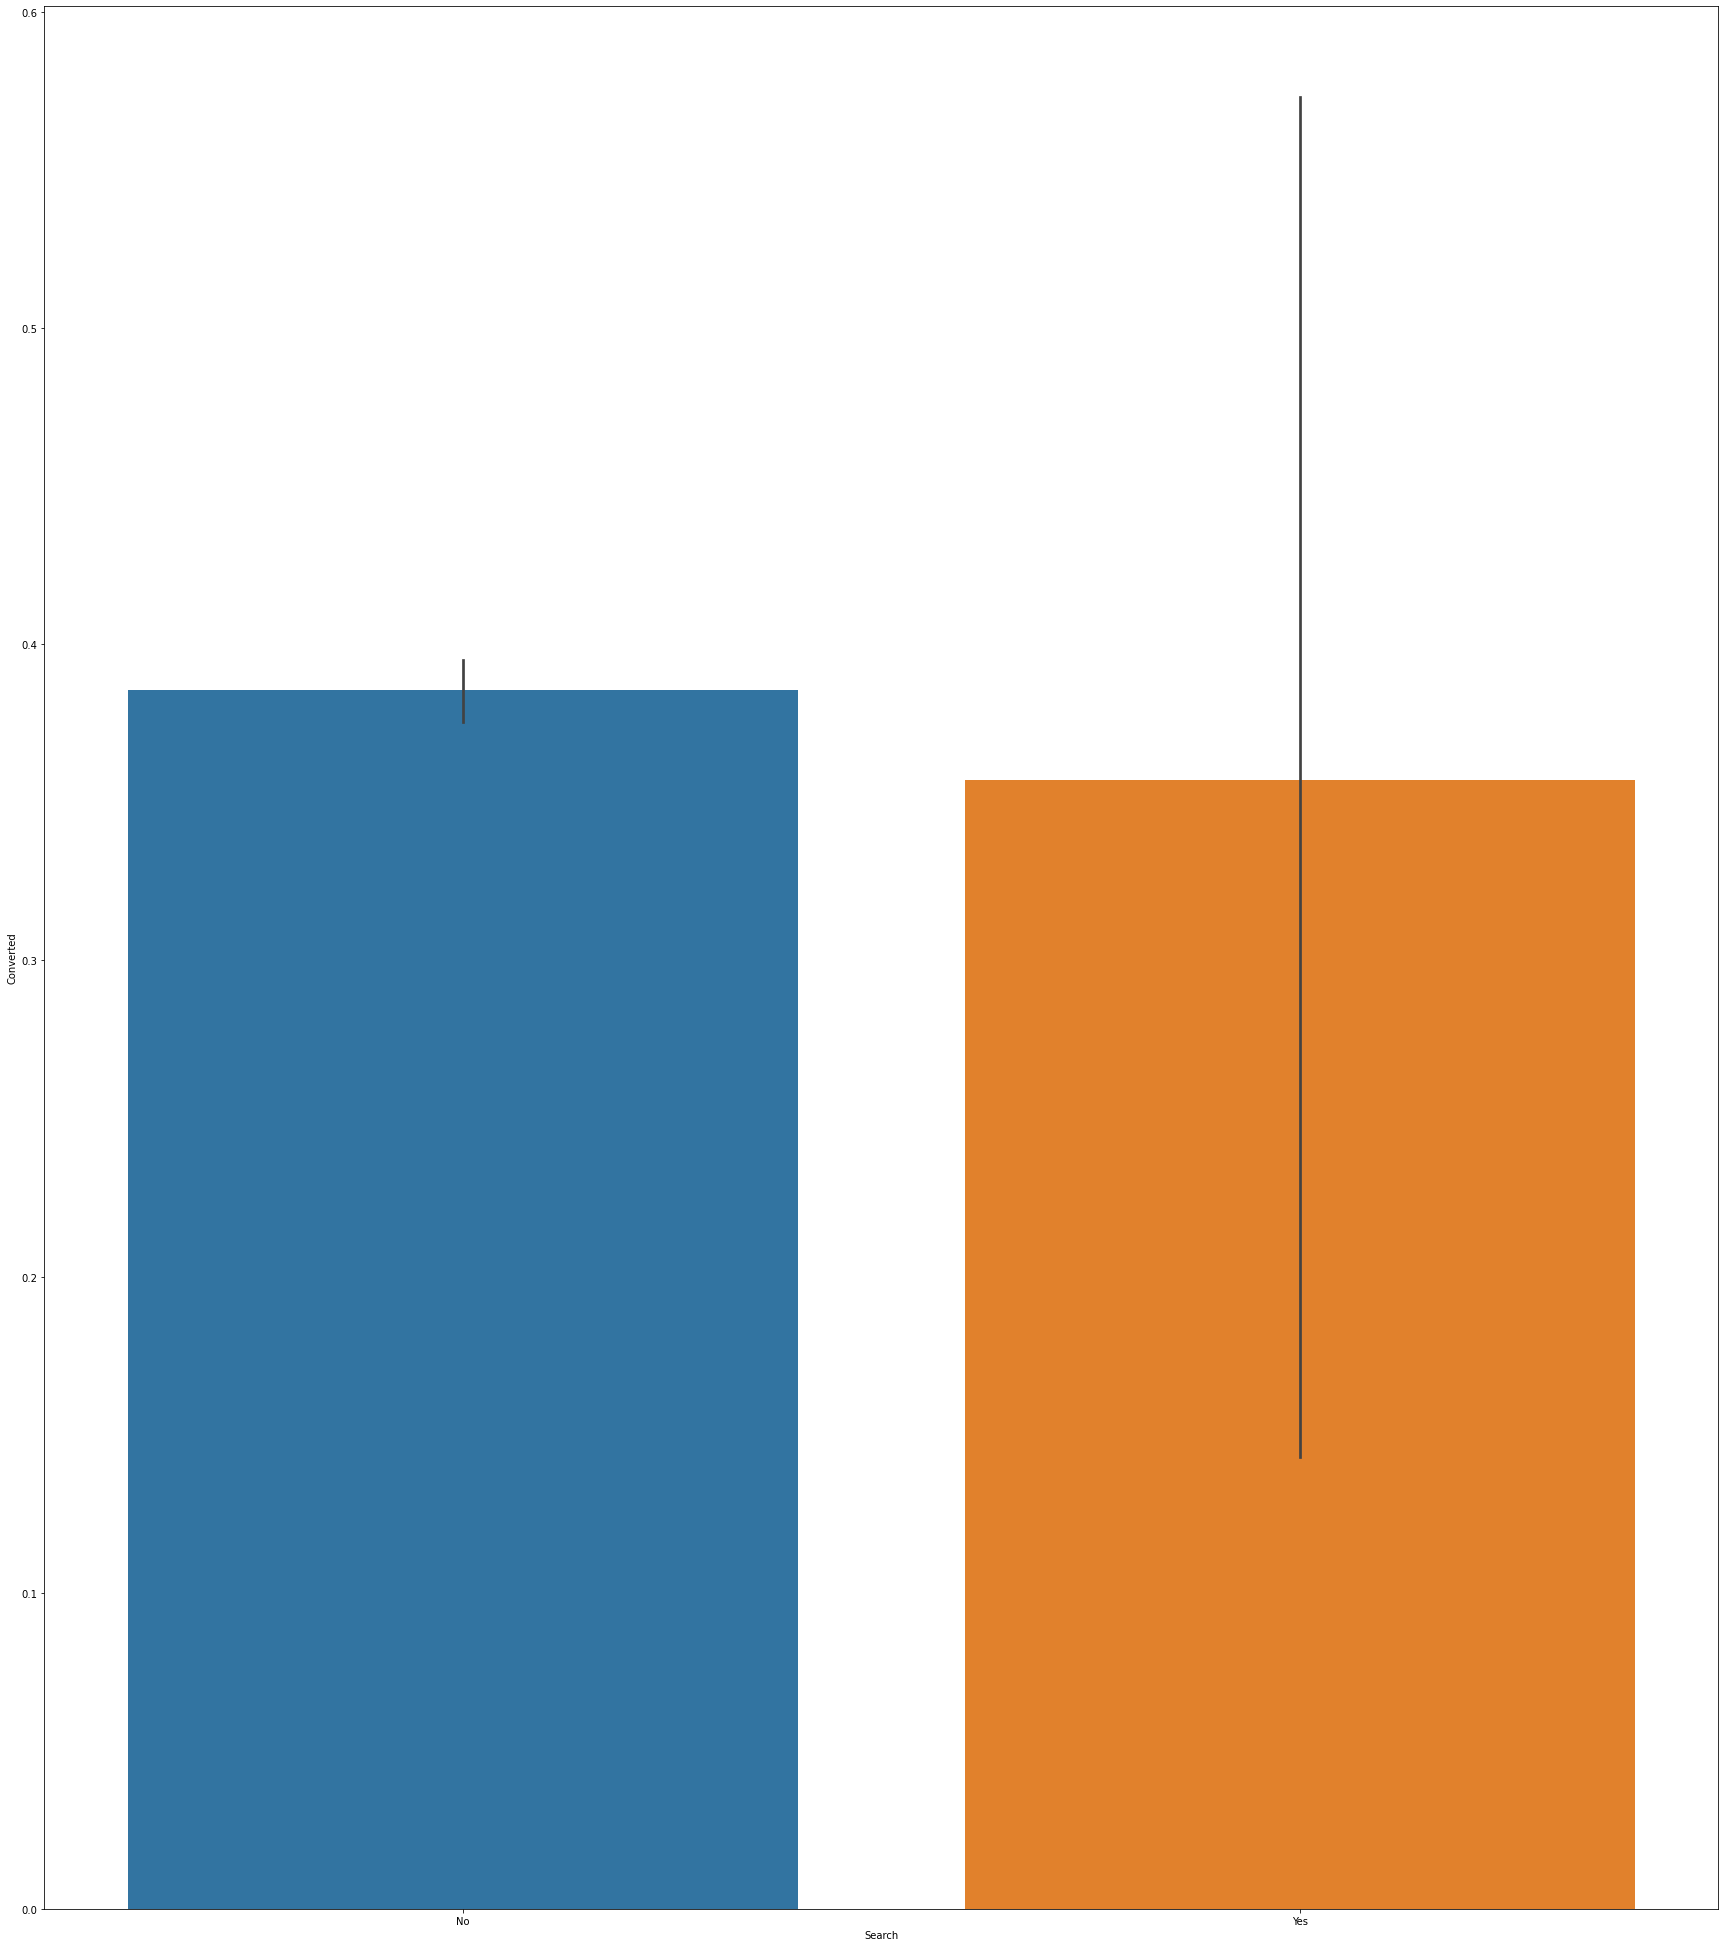

In [57]:
plt.figure(figsize=[30,35])
sns.barplot(lead_df["Search"],lead_df["Converted"],)
plt.show()

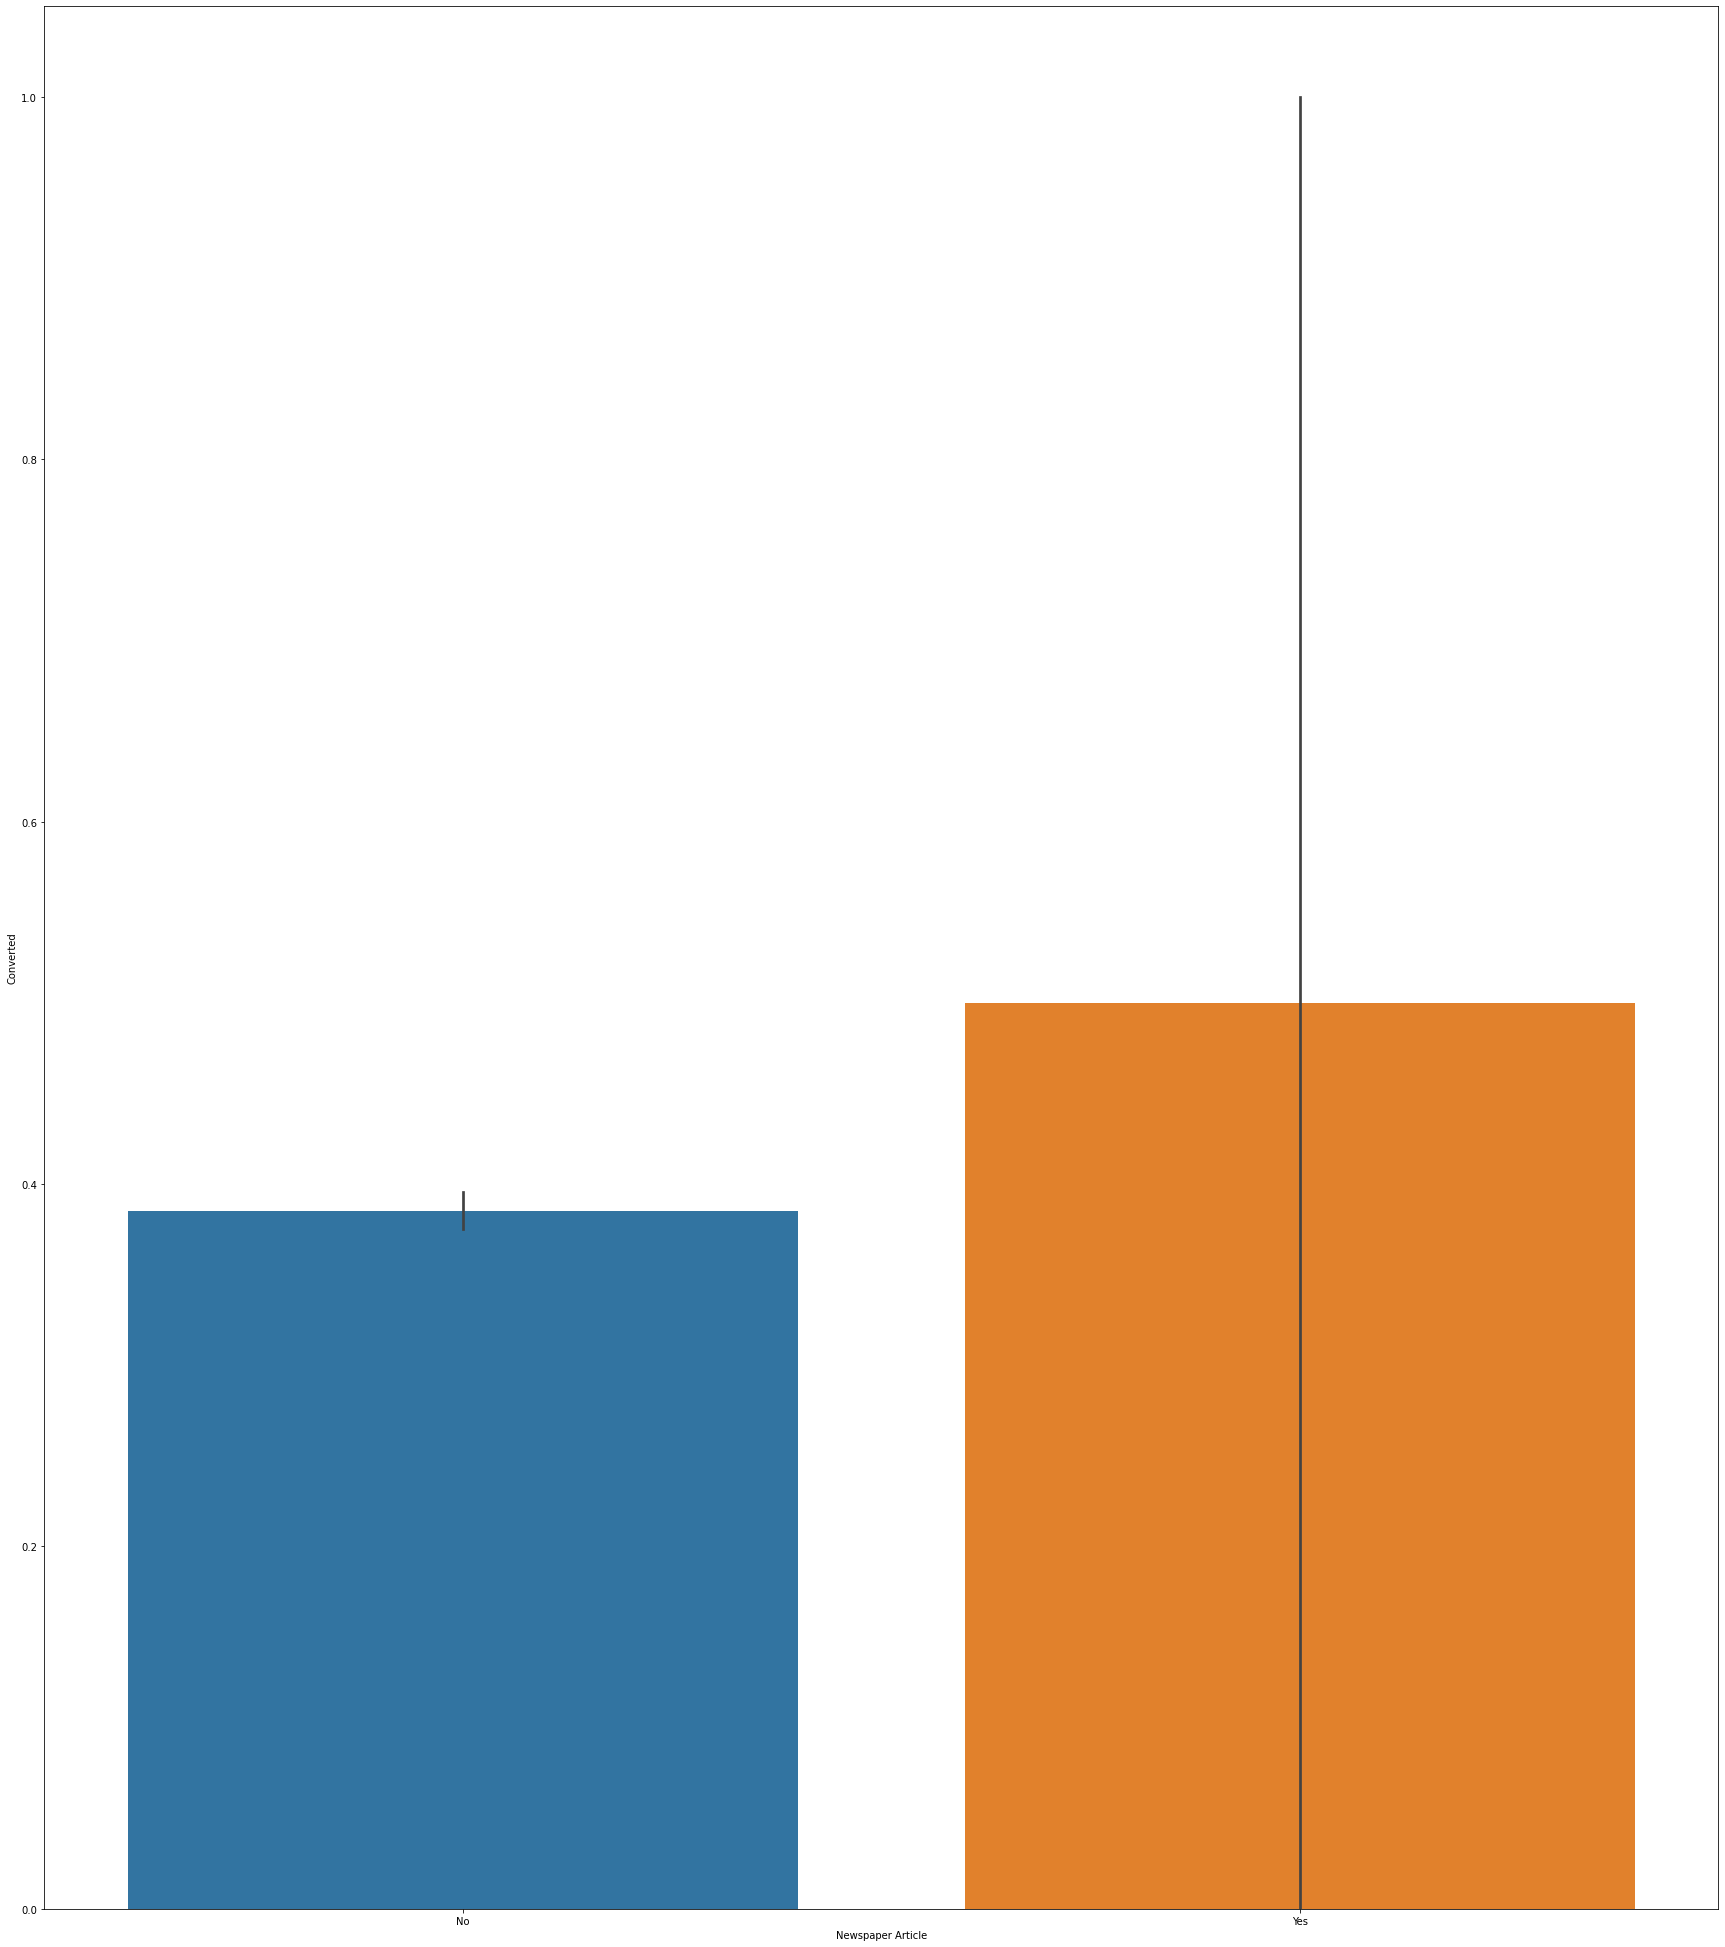

In [58]:
plt.figure(figsize=[30,35])
sns.barplot(lead_df["Newspaper Article"],lead_df["Converted"],)
plt.show()

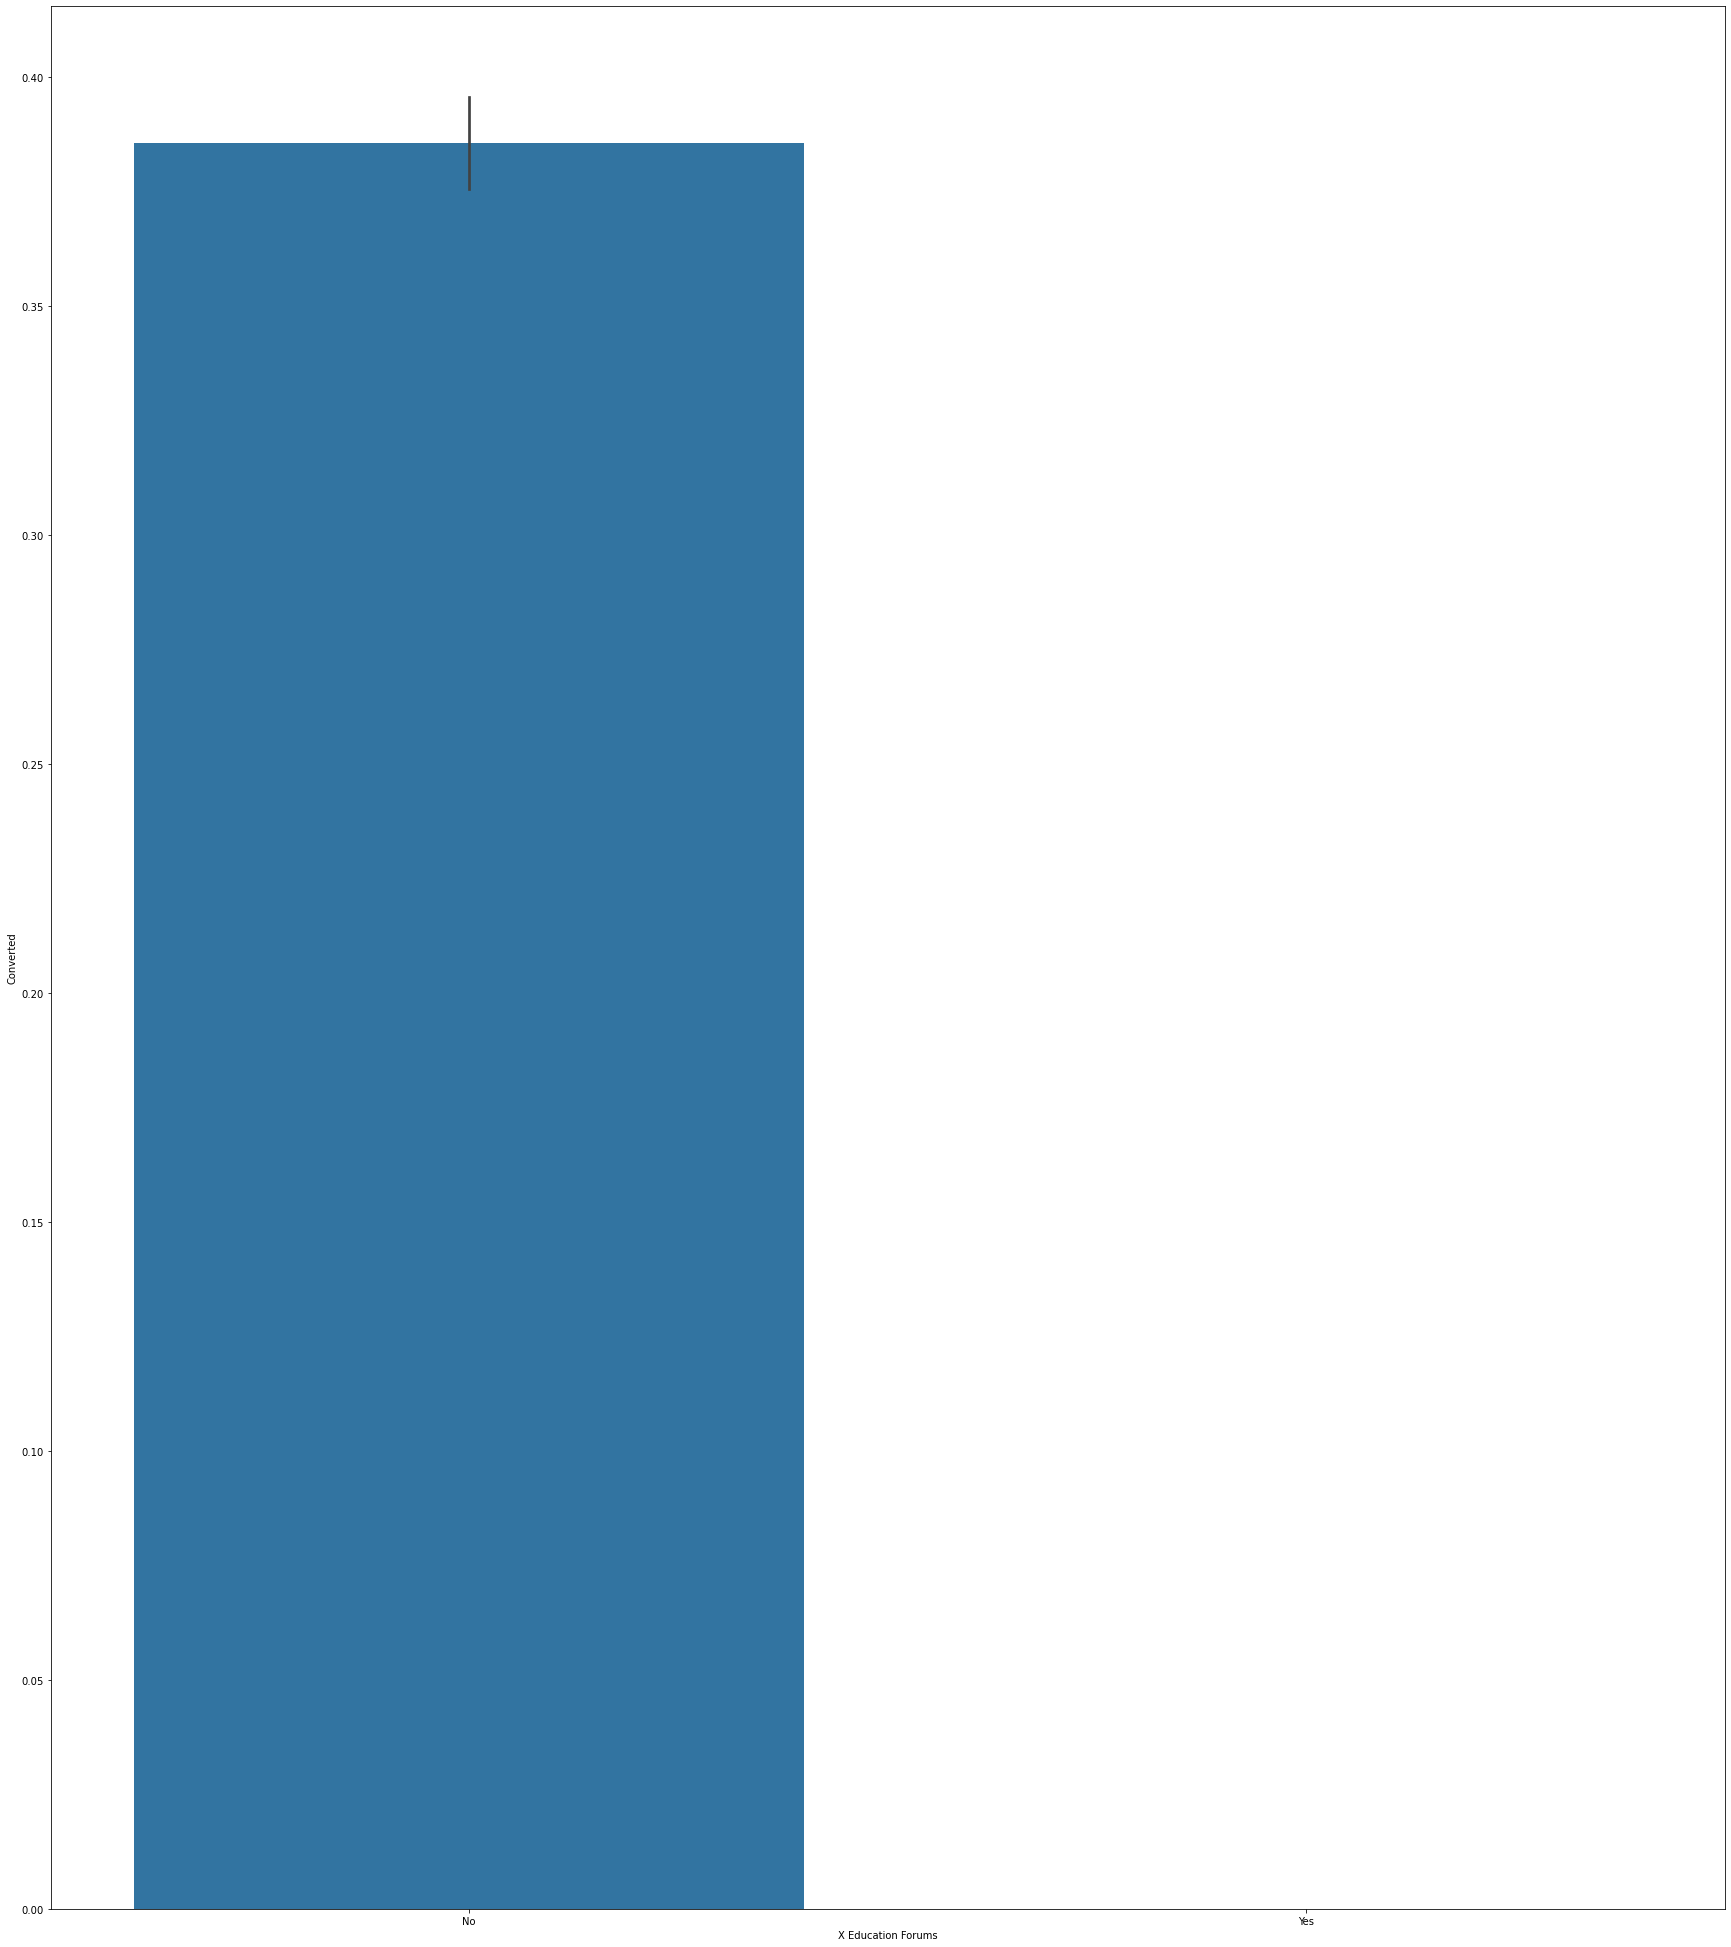

In [59]:
plt.figure(figsize=[30,35])
sns.barplot(lead_df["X Education Forums"],lead_df["Converted"],)
plt.show()

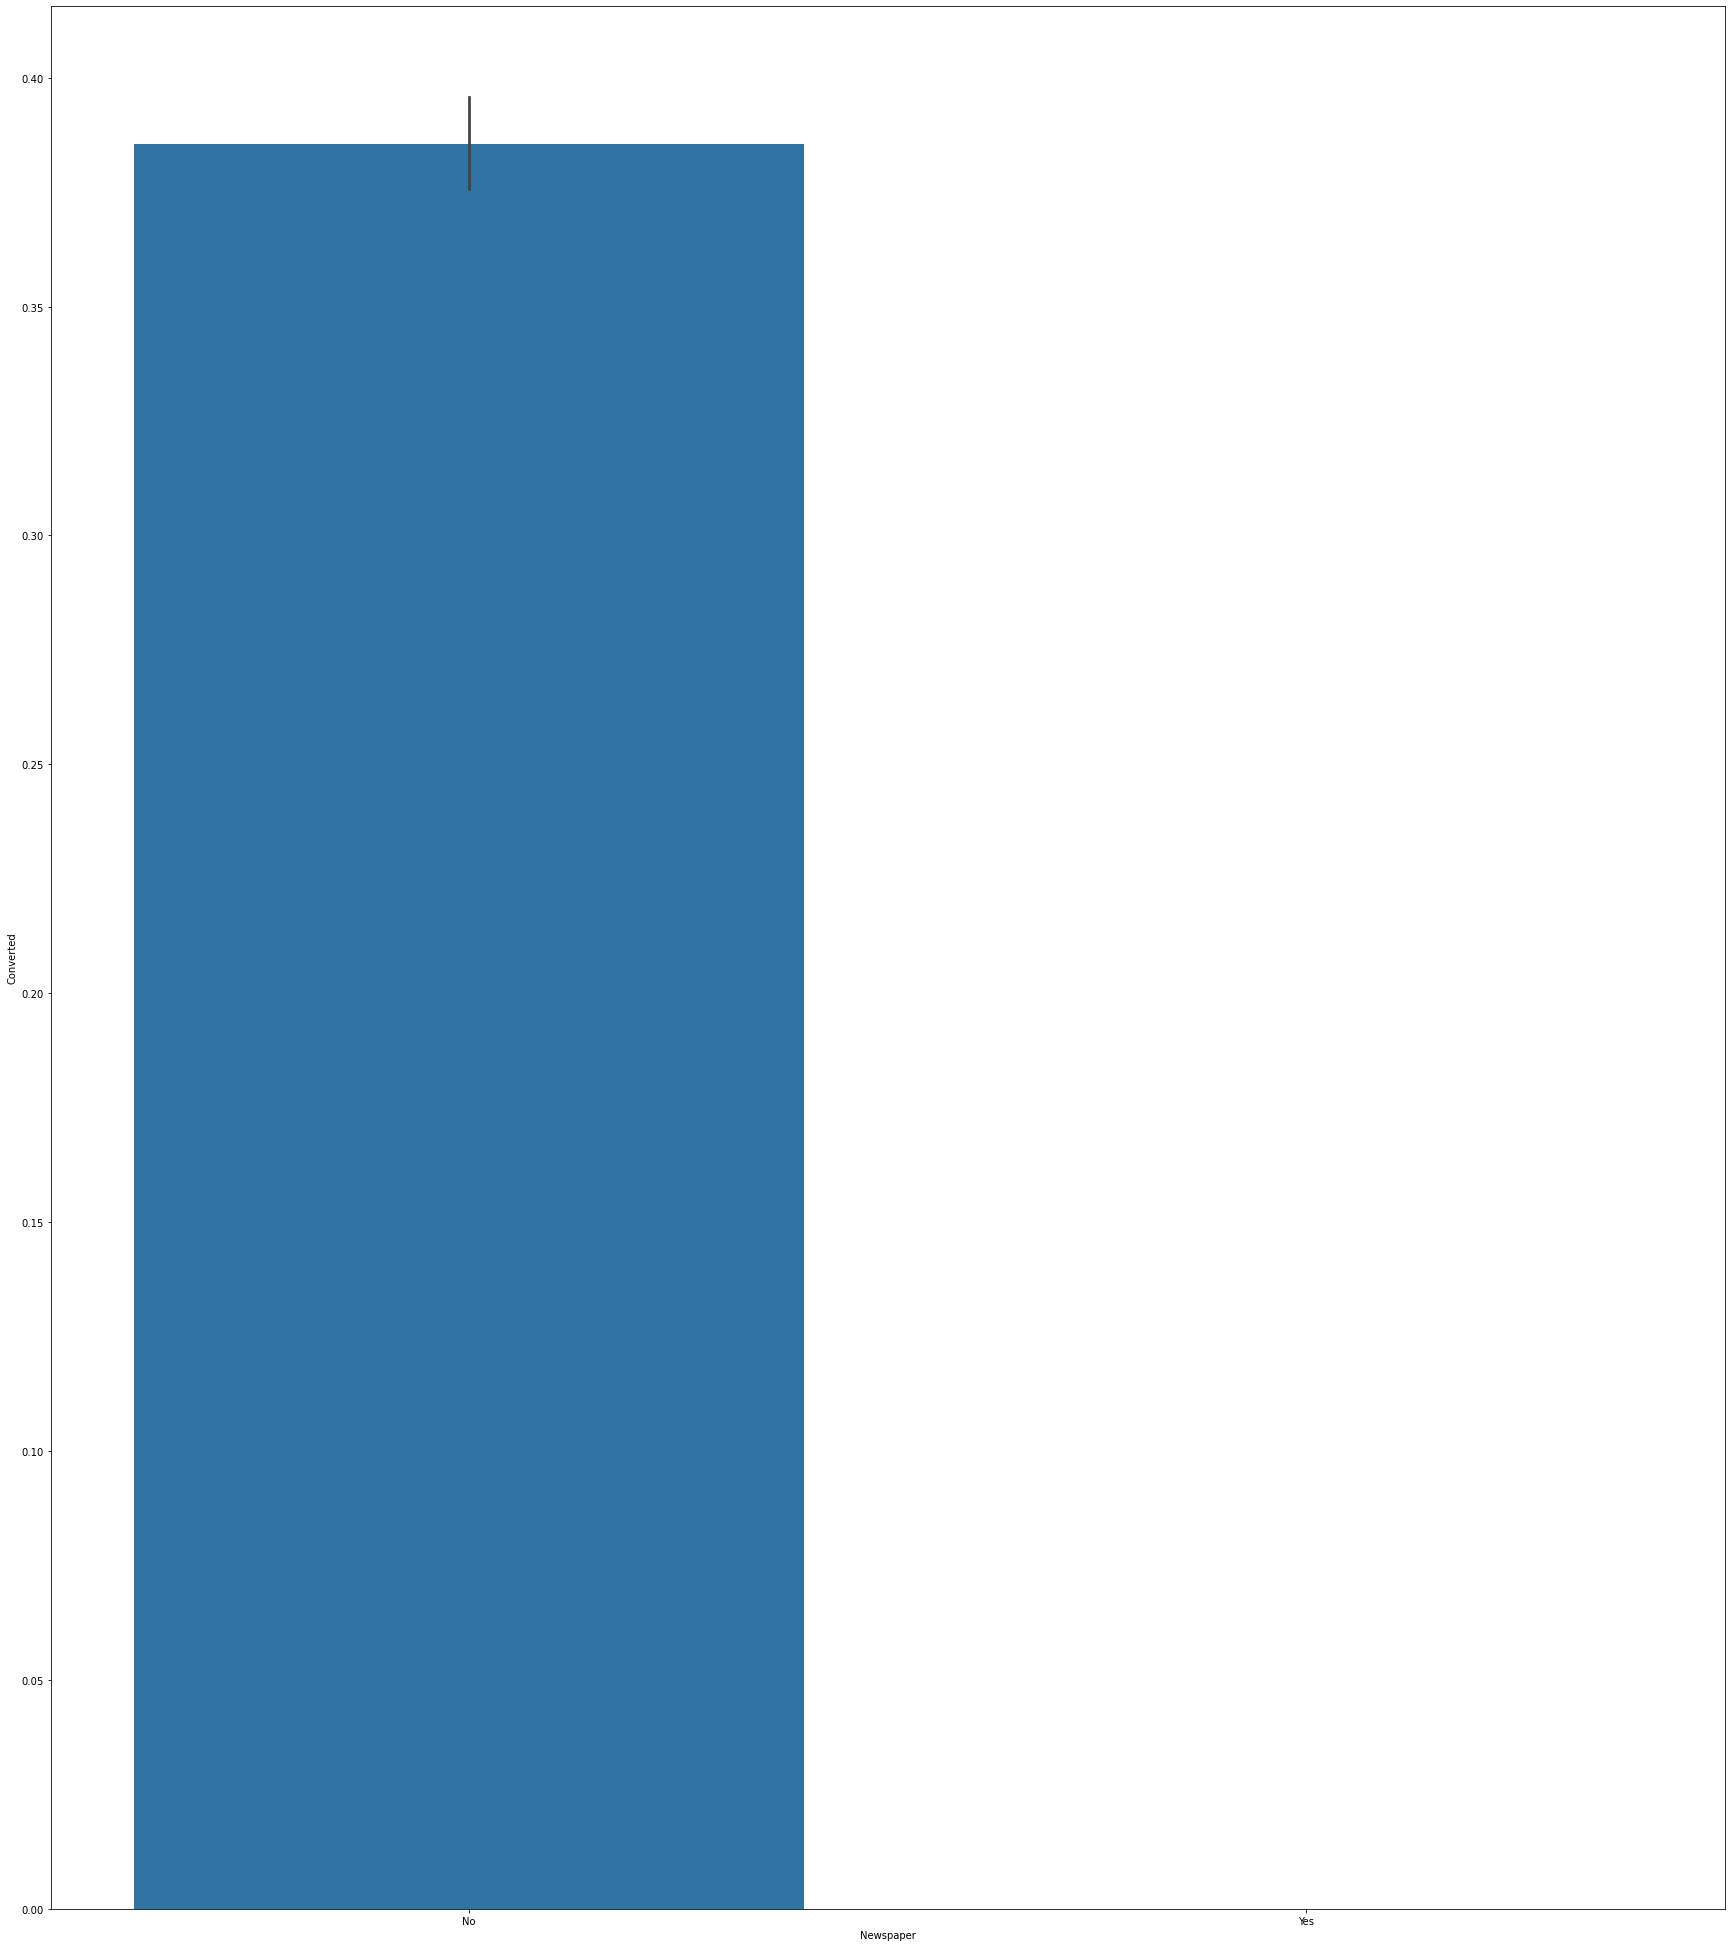

In [60]:
plt.figure(figsize=[30,35])
sns.barplot(lead_df["Newspaper"],lead_df["Converted"],)
plt.show()

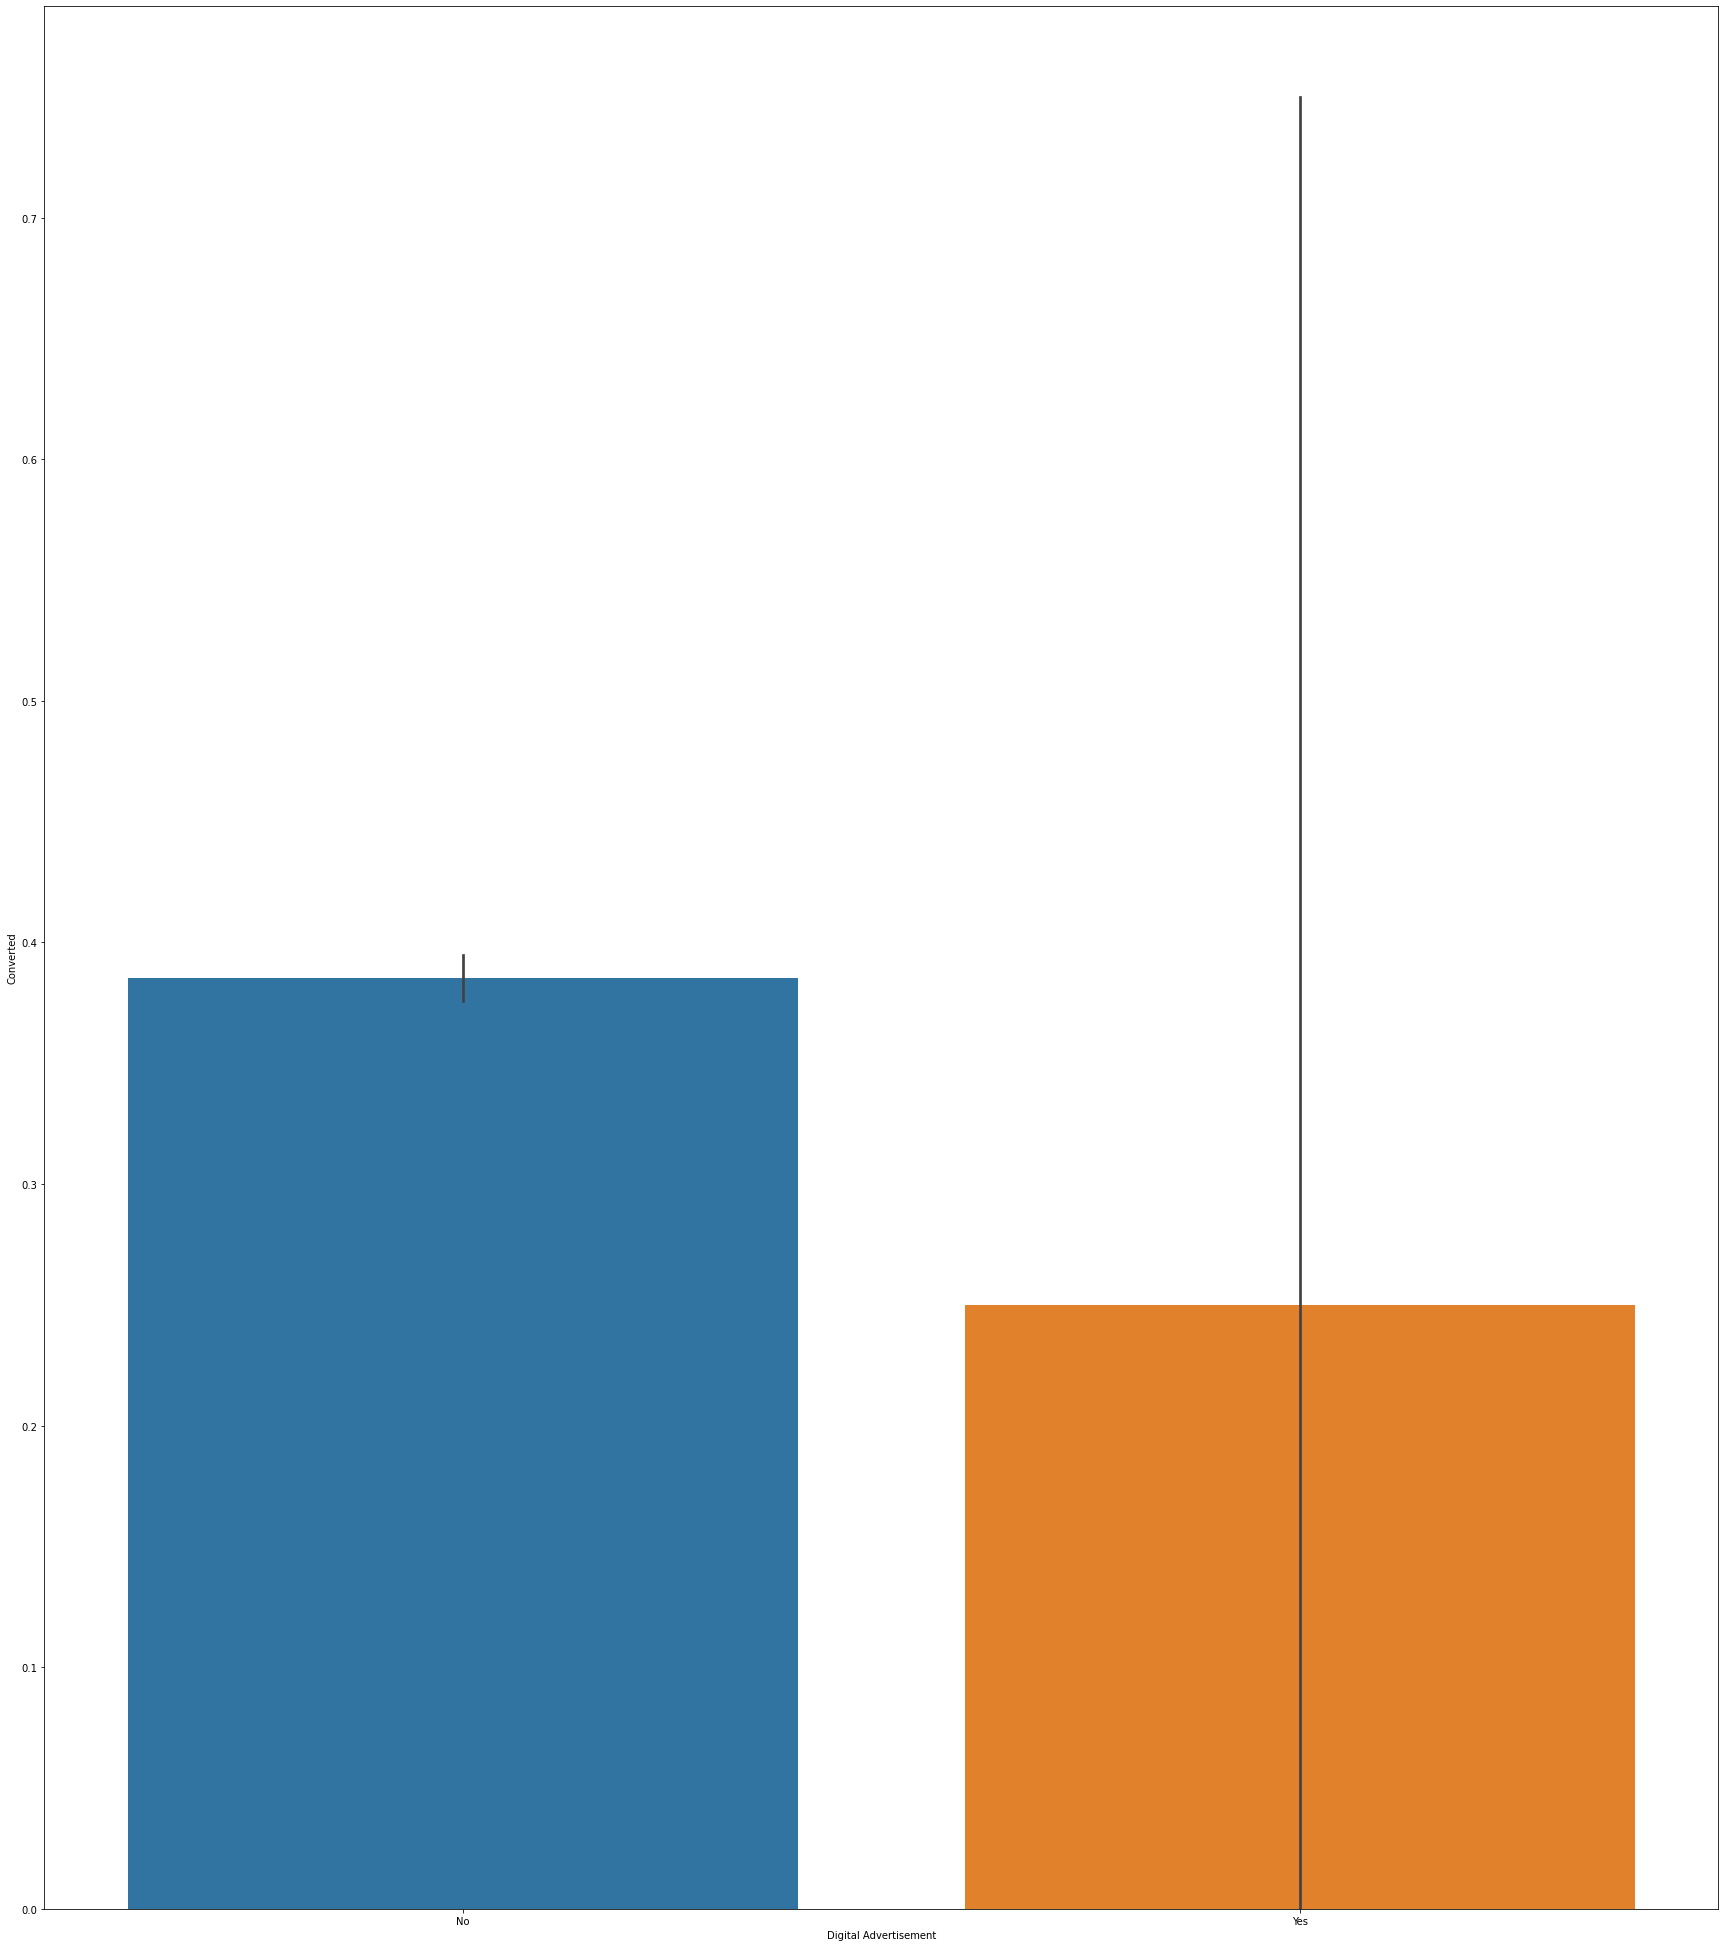

In [61]:
plt.figure(figsize=[30,35])
sns.barplot(lead_df["Digital Advertisement"],lead_df["Converted"],)
plt.show()

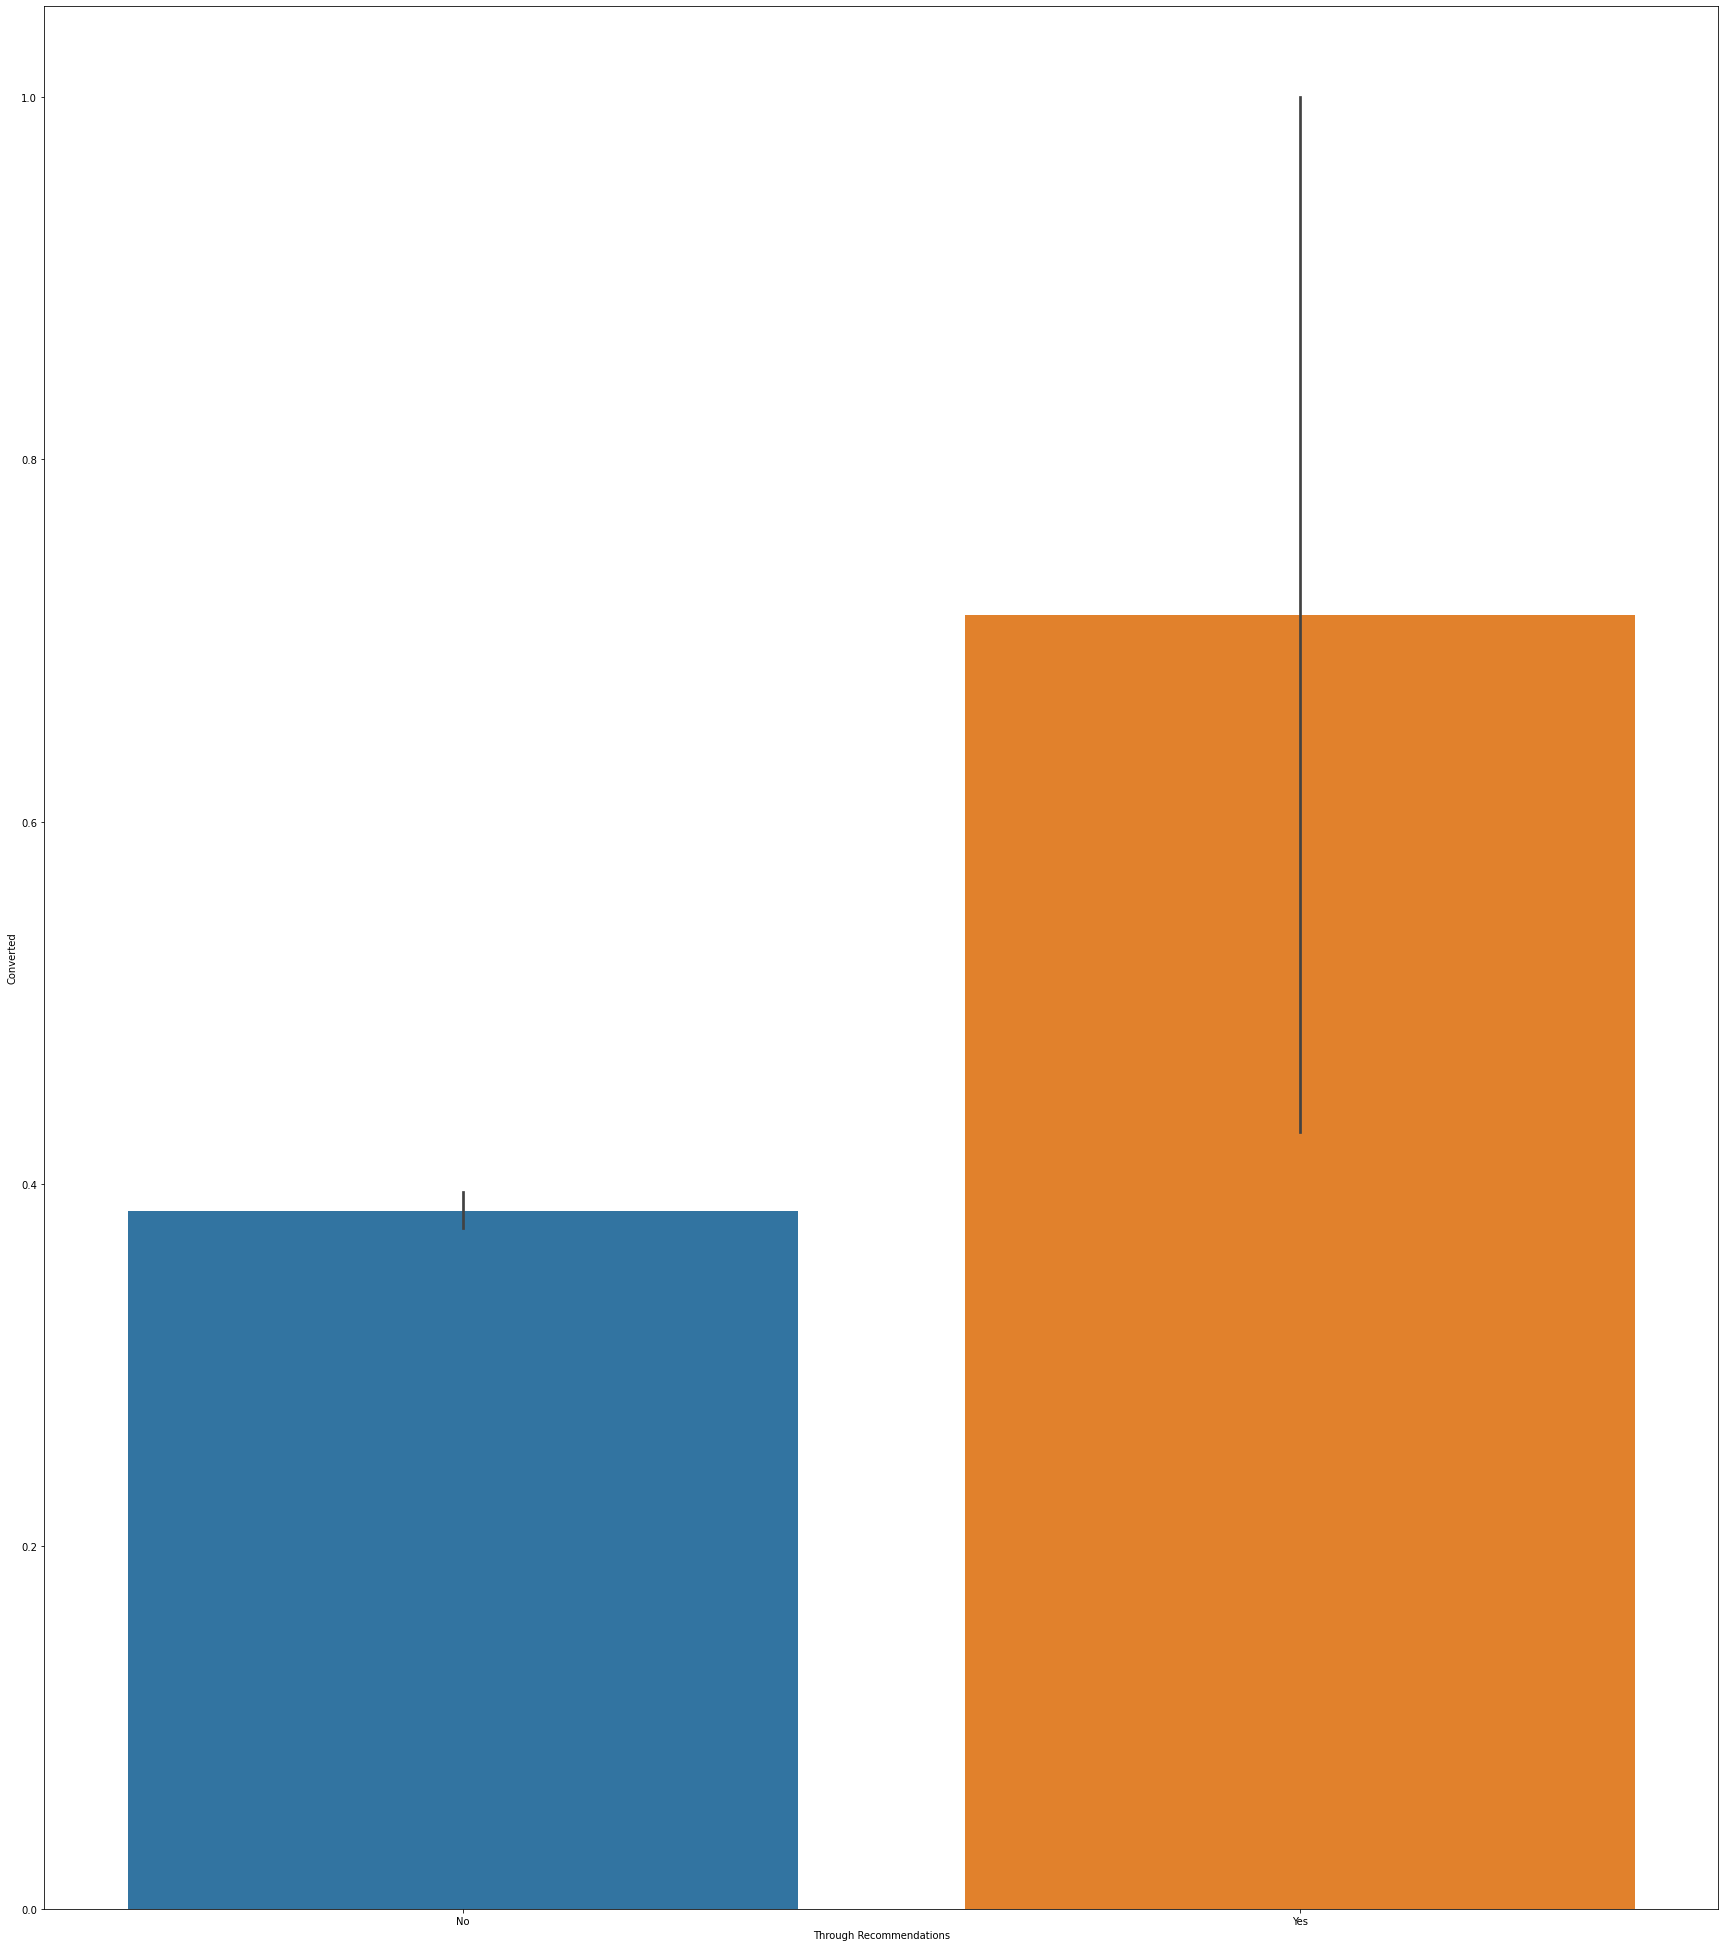

In [62]:
plt.figure(figsize=[30,35])
sns.barplot(lead_df["Through Recommendations"],lead_df["Converted"],)
plt.show()

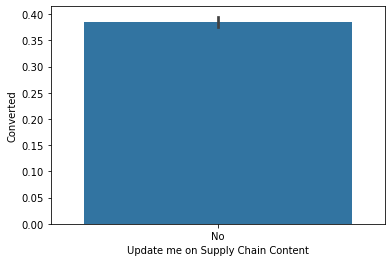

In [63]:

sns.barplot(lead_df["Update me on Supply Chain Content"],lead_df["Converted"],)
plt.show()

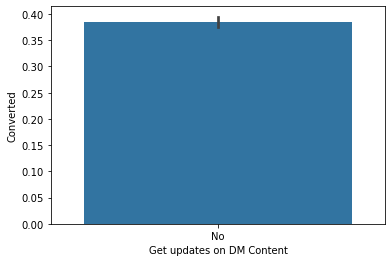

In [64]:

sns.barplot(lead_df["Get updates on DM Content"],lead_df["Converted"],)
plt.show()

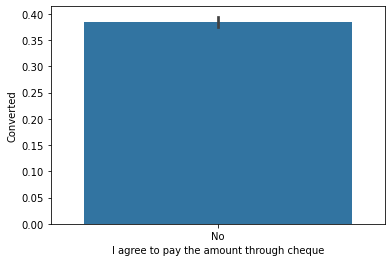

In [65]:
sns.barplot(lead_df["I agree to pay the amount through cheque"],lead_df["Converted"],)
plt.show()

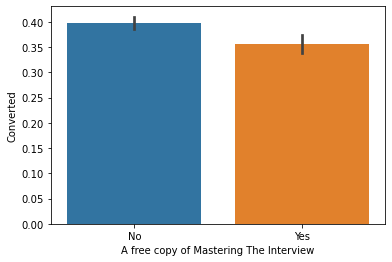

In [66]:
sns.barplot(lead_df["A free copy of Mastering The Interview"],lead_df["Converted"],)
plt.show()

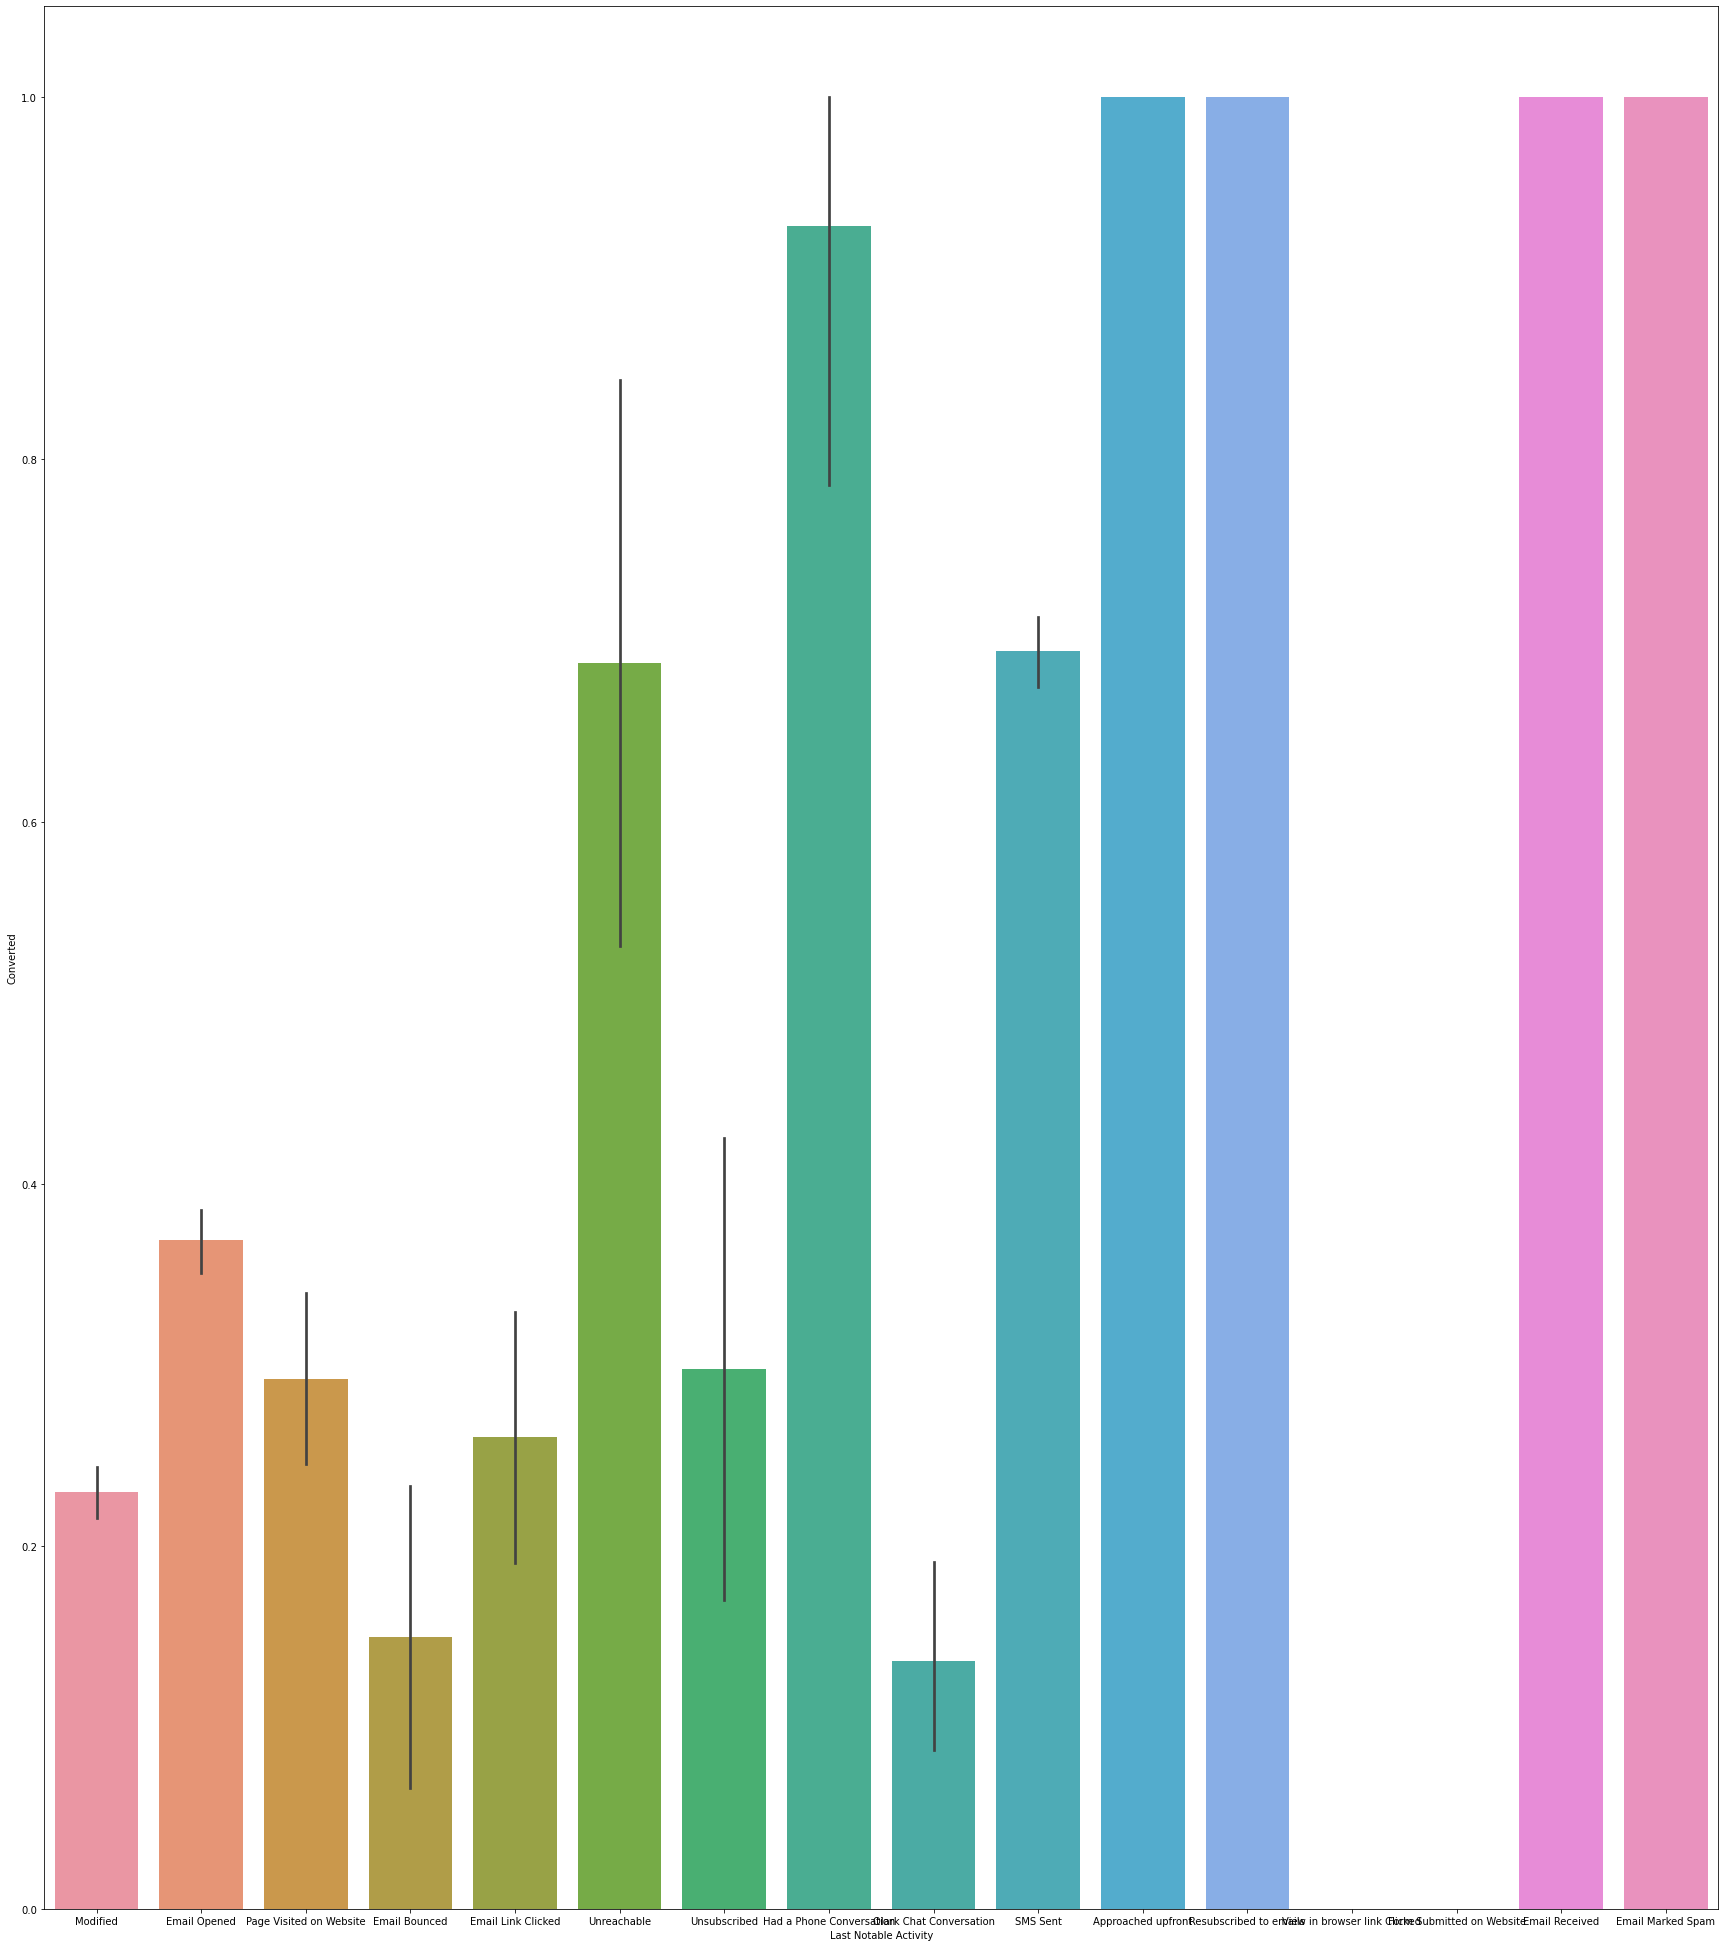

In [67]:
plt.figure(figsize=[30,35])
sns.barplot(lead_df["Last Notable Activity"],lead_df["Converted"],)
plt.show()

# Multivariate Analysis

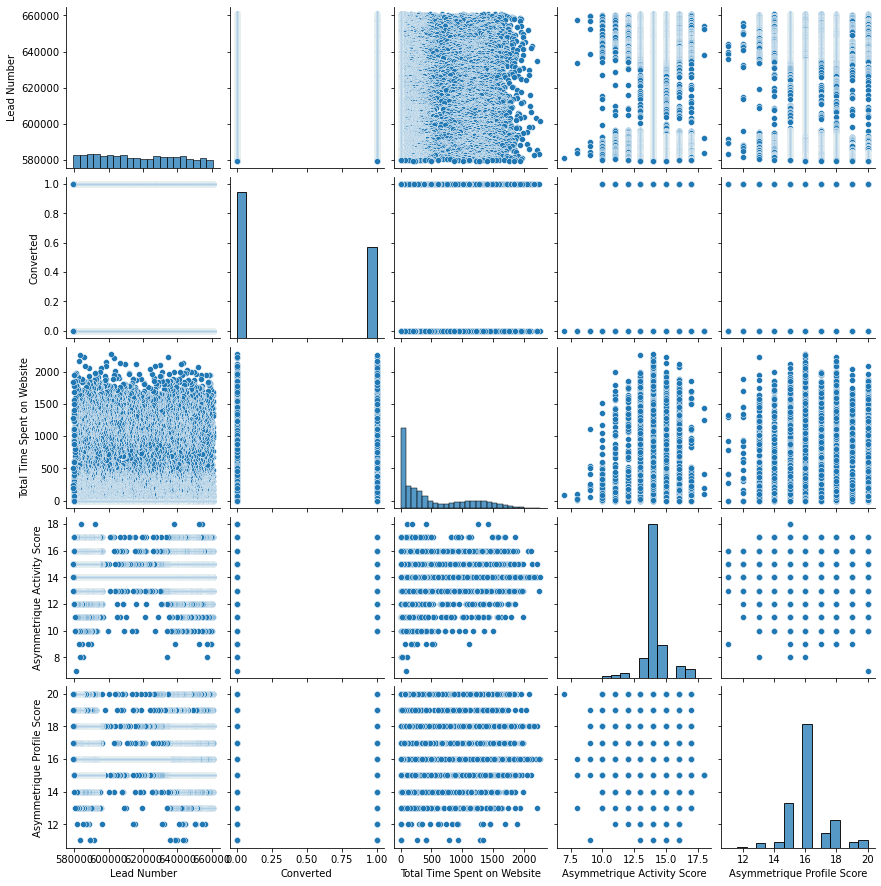

In [68]:
sns.pairplot(lead_df)

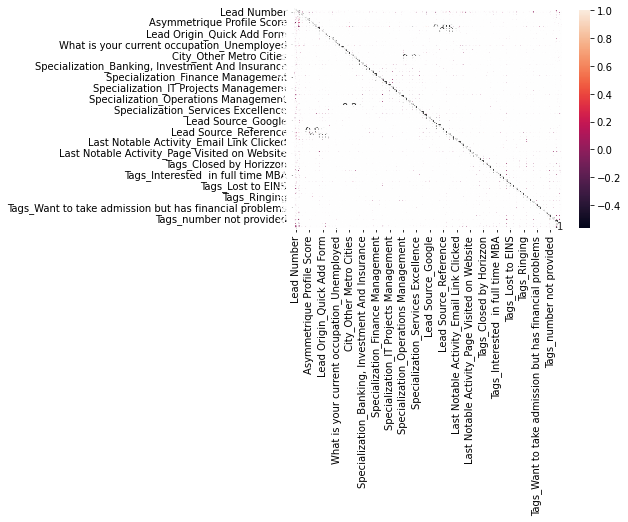

In [183]:

sns.heatmap(lead_df.corr(),annot = True)
plt.show()

# DUMMY VARIABLE CREATION

In [70]:
cat_cols= lead_df.select_dtypes(include=['object']).columns
cat_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [71]:
varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_df[varlist] = lead_df[varlist].apply(binary_map)

In [72]:
dummy = pd.get_dummies(lead_df[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

lead_df = pd.concat([lead_df,dummy],1)

In [73]:
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Not Specified')

In [74]:
dummy = pd.get_dummies(lead_df['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
lead_df = pd.concat([lead_df, dummy], axis = 1)

In [75]:
lead_df['Lead Source'] = lead_df['Lead Source'].replace(np.nan,'Others')
lead_df['Lead Source'] = lead_df['Lead Source'].replace('google','Google')
lead_df['Lead Source'] = lead_df['Lead Source'].replace('Facebook','Social Media')
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')    

In [76]:
dummy = pd.get_dummies(lead_df['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
lead_df = pd.concat([lead_df, dummy], axis = 1)

In [77]:
lead_df['Last Notable Activity'] = lead_df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

In [78]:
dummy = pd.get_dummies(lead_df['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
lead_df = pd.concat([lead_df, dummy], axis = 1)

In [79]:
lead_df['Tags'] = lead_df['Tags'].replace(np.nan,'Not Specified')

In [80]:
dummy = pd.get_dummies(lead_df['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
lead_df = pd.concat([lead_df, dummy], axis = 1)

In [81]:
lead_df.drop(cat_cols,1,inplace = True)

In [82]:
lead_df.head()

,Lead Number,Converted,Total Time Spent on Website,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,660737,0,0,15.0,15.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,660728,0,674,15.0,15.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,1,1532,14.0,20.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,660719,0,305,13.0,17.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,660681,1,1428,15.0,18.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# MODEL BUILDING

# SPLITTING DATA FOR TRAIN AND TEST

In [83]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = lead_df['Converted']

y.head()

X=lead_df.drop('Converted', axis=1)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [85]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 79 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Lead Number                                             6468 non-null   int64  
 1   Total Time Spent on Website                             6468 non-null   int64  
 2   Asymmetrique Activity Score                             6468 non-null   float64
 3   Asymmetrique Profile Score                              6468 non-null   float64
 4   Lead Origin_Landing Page Submission                     6468 non-null   uint8  
 5   Lead Origin_Lead Add Form                               6468 non-null   uint8  
 6   Lead Origin_Lead Import                                 6468 non-null   uint8  
 7   Lead Origin_Quick Add Form                              6468 non-null   uint8  
 8   What is your current occupation_Hou

# SCALING

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Lead Number,Total Time Spent on Website,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
1871,1.036534,-0.885371,0.803541,-0.887613,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,-0.834353,0.005716,-0.165382,-0.144912,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0.412448,-0.691418,-0.165382,-0.144912,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,-1.251936,1.365219,-0.165382,-0.887613,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3934,0.221650,-0.885371,-0.165382,-0.144912,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [96]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [102]:
list(zip(X_train.columns))

[('Lead Number',),
 ('Total Time Spent on Website',),
 ('Asymmetrique Activity Score',),
 ('Asymmetrique Profile Score',),
 ('Lead Origin_Landing Page Submission',),
 ('Lead Origin_Lead Add Form',),
 ('Lead Origin_Lead Import',),
 ('Lead Origin_Quick Add Form',),
 ('What is your current occupation_Housewife',),
 ('What is your current occupation_Other',),
 ('What is your current occupation_Student',),
 ('What is your current occupation_Unemployed',),
 ('What is your current occupation_Working Professional',),
 ('City_Other Cities',),
 ('City_Other Cities of Maharashtra',),
 ('City_Other Metro Cities',),
 ('City_Select',),
 ('City_Thane & Outskirts',),
 ('City_Tier II Cities',),
 ('Specialization_Banking, Investment And Insurance',),
 ('Specialization_Business Administration',),
 ('Specialization_E-Business',),
 ('Specialization_E-COMMERCE',),
 ('Specialization_Finance Management',),
 ('Specialization_Healthcare Management',),
 ('Specialization_Hospitality Management',),
 ('Specializati

In [104]:
col = X_train.columns
col

Index(['Lead Number', 'Total Time Spent on Website',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Select', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',


In [105]:
X_train.columns

Index(['Lead Number', 'Total Time Spent on Website',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Select', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',


In [106]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6388
Model Family:                Binomial   Df Model:                           79
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1070.2
Date:                Sat, 10 Jun 2023   Deviance:                       2140.4
Time:                        21:36:43   Pearson chi2:                 1.01e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6315
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -1.6771      0.997     -1.682      0.093      -3.631       0.277
Lead Number                                                0.0957      0.063      1.511      0.131      -0.028       0.220
Total Time Spent on Website                                1.0473      0.068     15.443      0.000       0.914       1.180
Asymmetrique Activity Score                                0.5565      0.067      8.325      0.000       0.425       0.687
Asymmetrique Profile Score                                 0.2038      0.091      2.234      0.025       0.025       0.383
Lead Origin_Landing Page Submission                       -0.7842      0.277     -2.828      0.005      -1.328      -0.241
Lead Origin_Lead Add Form                                 -0.3921      1.063     -0.369      0.712      -2.475       1.690
Lead Origin_Lead Import                                    1.1206      1.817      0.617      0.538      -2.441       4.683
Lead Origin_Quick Add Form                                21.9171   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
What is your current occupation_Housewife                 24.9998   6.45e+04      0.000      1.000   -1.26e+05    1.26e+05
What is your current occupation_Other                      1.5961      2.048      0.779      0.436      -2.418       5.610
What is your current occupation_Student                    1.7356      0.560      3.097      0.002       0.637       2.834
What is your current occupation_Unemployed                 2.1086      0.225      9.366      0.000       1.667       2.550
What is your current occupation_Working Professional       2.6317      0.426      6.183      0.000       1.797       3.466
City_Other Cities                                          0.2628      0.255      1.030      0.303      -0.237       0.763
City_Other Cities of Maharashtra                           0.2121      0.297      0.715      0.474      -0.369       0.793
City_Other Metro Cities                                    0.2204      0.327      0.674      0.500      -0.420       0.861
City_Select                                               -0.3477      0.346     -1.004      0.316      -1.027       0.331
City_Thane & Outskirts                                    -0.0224      0.258     -0.087      0.931      -0.528       0.483
City_Tier II Cities                                        0.4902      0.615      0.797      0.426      -0.716       1.696
Specialization_Banking, Investment And Insurance           0.8445      0.436      1.939      0.053      -0.009       1.698
Specialization_Business Administration                     0.5505      0.413      1.334      0.182      -0.258       1.359
Speciali

In [107]:
#dropping column with high p-value

col = col.drop('Lead Source_Referral Sites',1)

In [108]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6389
Model Family:                Binomial   Df Model:                           78
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1070.3
Date:                Sat, 10 Jun 2023   Deviance:                       2140.5
Time:                        21:39:09   Pearson chi2:                 1.01e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6315
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -1.9578      0.605     -3.237      0.001      -3.143      -0.772
Lead Number                                                0.0936      0.063      1.485      0.138      -0.030       0.217
Total Time Spent on Website                                1.0475      0.068     15.444      0.000       0.915       1.180
Asymmetrique Activity Score                                0.5581      0.067      8.367      0.000       0.427       0.689
Asymmetrique Profile Score                                 0.2061      0.091      2.265      0.024       0.028       0.384
Lead Origin_Landing Page Submission                       -0.7819      0.277     -2.820      0.005      -1.325      -0.238
Lead Origin_Lead Add Form                                 -0.1502      0.810     -0.185      0.853      -1.738       1.438
Lead Origin_Lead Import                                    1.1248      1.815      0.620      0.535      -2.432       4.682
Lead Origin_Quick Add Form                                22.2091   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
What is your current occupation_Housewife                 24.9981   6.45e+04      0.000      1.000   -1.26e+05    1.26e+05
What is your current occupation_Other                      1.5916      2.048      0.777      0.437      -2.422       5.606
What is your current occupation_Student                    1.7340      0.560      3.094      0.002       0.636       2.832
What is your current occupation_Unemployed                 2.1050      0.225      9.365      0.000       1.665       2.546
What is your current occupation_Working Professional       2.6304      0.426      6.179      0.000       1.796       3.465
City_Other Cities                                          0.2612      0.255      1.024      0.306      -0.239       0.761
City_Other Cities of Maharashtra                           0.2143      0.297      0.722      0.470      -0.367       0.796
City_Other Metro Cities                                    0.2170      0.327      0.664      0.506      -0.423       0.857
City_Select                                               -0.3505      0.346     -1.013      0.311      -1.029       0.328
City_Thane & Outskirts                                    -0.0247      0.258     -0.096      0.924      -0.530       0.480
City_Tier II Cities                                        0.4882      0.615      0.793      0.428      -0.718       1.694
Specialization_Banking, Investment And Insurance           0.8470      0.435      1.945      0.052      -0.007       1.701
Specialization_Business Administration                     0.5598      0.412      1.358      0.174      -0.248       1.367
Speciali

In [109]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [110]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Lead Add Form,19.46
43,Lead Source_Reference,14.14
11,What is your current occupation_Unemployed,13.78
48,Last Notable Activity_Modified,13.67
39,Lead Source_Google,12.09
...,...,...
59,Tags_Interested in Next batch,1.02
57,Tags_In confusion whether part time or DLP,1.02
61,Tags_Lateral student,1.01
67,Tags_Shall take in the next coming month,1.01


In [111]:
#dropping variable with high VIF

col = col.drop('Last Notable Activity_SMS Sent',1)


In [112]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6390
Model Family:                Binomial   Df Model:                           77
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1086.9
Date:                Sat, 10 Jun 2023   Deviance:                       2173.9
Time:                        21:40:53   Pearson chi2:                 9.56e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6296
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      0.0576      0.467      0.123      0.902      -0.857       0.972
Lead Number                                                0.0648      0.062      1.040      0.298      -0.057       0.187
Total Time Spent on Website                                1.0594      0.067     15.751      0.000       0.928       1.191
Asymmetrique Activity Score                                0.5493      0.066      8.275      0.000       0.419       0.679
Asymmetrique Profile Score                                 0.2012      0.091      2.218      0.027       0.023       0.379
Lead Origin_Landing Page Submission                       -0.8019      0.275     -2.914      0.004      -1.341      -0.263
Lead Origin_Lead Add Form                                  0.0189      0.820      0.023      0.982      -1.589       1.627
Lead Origin_Lead Import                                    1.0507      1.806      0.582      0.561      -2.490       4.591
Lead Origin_Quick Add Form                                22.3301   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
What is your current occupation_Housewife                 24.9033   6.45e+04      0.000      1.000   -1.26e+05    1.27e+05
What is your current occupation_Other                      1.6764      2.201      0.762      0.446      -2.638       5.991
What is your current occupation_Student                    1.7254      0.563      3.063      0.002       0.621       2.829
What is your current occupation_Unemployed                 2.0841      0.223      9.342      0.000       1.647       2.521
What is your current occupation_Working Professional       2.5850      0.423      6.118      0.000       1.757       3.413
City_Other Cities                                          0.2553      0.253      1.011      0.312      -0.240       0.750
City_Other Cities of Maharashtra                           0.1946      0.295      0.660      0.509      -0.383       0.773
City_Other Metro Cities                                    0.1891      0.321      0.589      0.556      -0.440       0.818
City_Select                                               -0.4453      0.342     -1.302      0.193      -1.116       0.225
City_Thane & Outskirts                                    -0.0648      0.253     -0.256      0.798      -0.560       0.430
City_Tier II Cities                                        0.5003      0.607      0.824      0.410      -0.689       1.690
Specialization_Banking, Investment And Insurance           0.8186      0.427      1.915      0.055      -0.019       1.656
Specialization_Business Administration                     0.5340      0.407      1.312      0.190      -0.264       1.332
Speciali

In [113]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Lead Add Form,17.92
43,Lead Source_Reference,14.09
11,What is your current occupation_Unemployed,13.77
4,Lead Origin_Landing Page Submission,10.53
6,Lead Origin_Lead Import,9.08
...,...,...
67,Tags_Still Thinking,1.02
58,Tags_Interested in Next batch,1.02
60,Tags_Lateral student,1.01
66,Tags_Shall take in the next coming month,1.01


In [114]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.007041
6795    0.564532
3516    0.008692
8105    0.243466
3934    0.243191
4844    0.998776
3297    0.002939
8071    0.997978
987     0.141597
7423    0.999330
dtype: float64

In [115]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00704075, 0.56453201, 0.00869247, 0.24346648, 0.2431908 ,
       0.99877638, 0.002939  , 0.99797785, 0.14159662, 0.99933003])

In [116]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.007041,1871
1,0,0.564532,6795
2,0,0.008692,3516
3,0,0.243466,8105
4,0,0.243191,3934


In [117]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.007041,1871,0
1,0,0.564532,6795,1
2,0,0.008692,3516,0
3,0,0.243466,8105,0
4,0,0.243191,3934,0


In [118]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3863  139]
 [ 238 2228]]


In [119]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.941713048855906


In [120]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [121]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9034874290348743

In [122]:
# Let us calculate specificity
TN / float(TN+FP)

0.9652673663168416

In [123]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.03473263368315842


In [124]:
# positive predictive value 
print (TP / float(TP+FP))

0.9412758766370933


In [125]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9419653742989514


# PLOTTING ROC CURVE


In [126]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [127]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

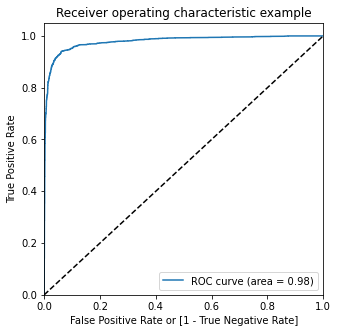

In [128]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# The ROC Curve should be a value close to 1. We are getting a good value of 0.98 indicating a good predictive model.



# Finding Optimal Cutoff Point¶


Above we had chosen an arbitrary cut-off value of 0.5. 
We need to determine the best cut-off value and the below section deals with that:



In [130]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.007041,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.564532,6795,1,1,1,1,1,1,1,0,0,0,0
2,0,0.008692,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.243466,8105,0,1,1,1,0,0,0,0,0,0,0
4,0,0.243191,3934,0,1,1,1,0,0,0,0,0,0,0


In [131]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.888992  0.968370  0.840080
0.2   0.2  0.919913  0.952960  0.899550
0.3   0.3  0.936766  0.941606  0.933783
0.4   0.4  0.940631  0.920519  0.953023
0.5   0.5  0.941713  0.903487  0.965267
0.6   0.6  0.938466  0.881995  0.973263
0.7   0.7  0.932282  0.858881  0.977511
0.8   0.8  0.924242  0.827656  0.983758
0.9   0.9  0.903834  0.763585  0.990255


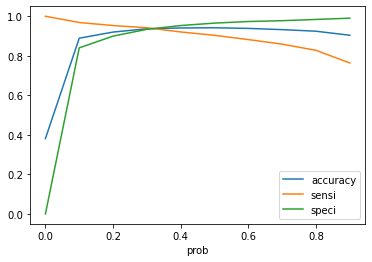

In [132]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [133]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.007041,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.564532,6795,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.008692,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.243466,8105,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.243191,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [134]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.007041,1871,0,1
1,0,0.564532,6795,1,56
2,0,0.008692,3516,0,1
3,0,0.243466,8105,0,24
4,0,0.243191,3934,0,24


In [135]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9367656153370439

In [136]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3737,  265],
       [ 144, 2322]], dtype=int64)

In [137]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [138]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9416058394160584

In [139]:
# Let us calculate specificity
TN / float(TN+FP)

0.9337831084457772

Accuracy 93.67%
Sensitivity 94.16%
Specificity 93.37%

In [140]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.06621689155422289


In [141]:
# Positive predictive value 
print (TP / float(TP+FP))

0.897564746810978


In [142]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9628961607833033


In [143]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3737,  265],
       [ 144, 2322]], dtype=int64)

In [144]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.897564746810978

In [145]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9416058394160584

In [146]:
from sklearn.metrics import precision_score, recall_score

In [147]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.897564746810978

In [148]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9416058394160584

In [149]:
from sklearn.metrics import precision_recall_curve

In [150]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

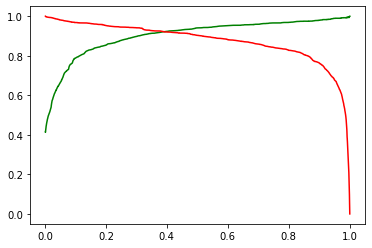

In [151]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [152]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Lead Number,Total Time Spent on Website,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
4269,0.077023,0.933036,-0.151002,-0.125990,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2376,0.838399,-0.900812,0.813460,0.617083,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7766,-1.145965,-0.793792,1.777921,-0.869063,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9199,-1.588331,-0.900812,2.742382,-0.125990,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4359,0.031292,-0.900812,-0.151002,-0.125990,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [153]:
X_test = X_test[col]
X_test.head()

,Lead Number,Total Time Spent on Website,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
4269,0.077023,0.933036,-0.151002,-0.125990,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2376,0.838399,-0.900812,0.813460,0.617083,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7766,-1.145965,-0.793792,1.777921,-0.869063,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9199,-1.588331,-0.900812,2.742382,-0.125990,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4359,0.031292,-0.900812,-0.151002,-0.125990,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [154]:
X_test_sm = sm.add_constant(X_test)

In [155]:
y_test_pred = res.predict(X_test_sm)

In [156]:
y_test_pred[:10]

4269    0.674850
2376    0.995496
7766    0.994344
9199    0.005899
4359    0.932427
9186    0.994637
1631    0.991364
8963    0.940795
8007    0.030894
5324    0.976059
dtype: float64

In [160]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
4269,0.674850
2376,0.995496
7766,0.994344
9199,0.005899
4359,0.932427


In [161]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [162]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [163]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [165]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.674850
1,1,2376,0.995496
2,1,7766,0.994344
3,0,9199,0.005899
4,1,4359,0.932427


In [166]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,4269,0.674850
1,1,2376,0.995496
2,1,7766,0.994344
3,0,9199,0.005899
4,1,4359,0.932427


In [167]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [168]:
y_pred_final.head()


,Prospect ID,Converted,Converted_prob,Lead_Score
0,4269,1,0.674850,67
1,2376,1,0.995496,100
2,7766,1,0.994344,99
3,9199,0,0.005899,1
4,4359,1,0.932427,93


In [169]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [170]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4269,1,0.674850,67,1
1,2376,1,0.995496,100,1
2,7766,1,0.994344,99,1
3,9199,0,0.005899,1,0
4,4359,1,0.932427,93,1


In [171]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9347041847041847

In [172]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1553,  124],
       [  57, 1038]], dtype=int64)

In [173]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [174]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.947945205479452

In [175]:
# Let us calculate specificity
TN / float(TN+FP)

0.9260584376863447

In [176]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8932874354561101

In [177]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.947945205479452

Accuracy 93.47%
Sensitivity 94.79%
Specificity 92.60%

# Final Observation


Let us compare the values obtained for Train & Test:

Train Data: 
Accuracy : 93.67%
Sensitivity : 94.16%
Specificity : 93.37%
Test Data: 
Accuracy : 93.47%
Sensitivity : 94.79%
Specificity : 92.60%
